<a href="https://colab.research.google.com/github/JulTob/Optimization/blob/main/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPTIMIZACIÓN CONTINUA

# 0. Libraries and Preparations

Esto se puede ignorar. Son los instaladores de las librerias para Colab.

> `Run All` as many times as needed to fix an error in downloading libraries. It will eventually work, but the download process is heavy.

In [52]:
# (1) Paquetes del sistema para Cairo/Pango + toolchain
!sudo apt-get update -y
!sudo apt-get install -y \
  build-essential pkg-config ninja-build \
  libcairo2-dev libpango1.0-dev libglib2.0-dev libharfbuzz-dev \
  ffmpeg

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cli.github.com/packages stable InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [53]:
%pip install -U pip wheel
%pip install -U manim manimpango pycairo
%load_ext manim

The manim module is not an IPython extension.


### Manim
> Runer doesn't have to be next to the compiler.

In [55]:
from manim import *
class Hello(Scene):
    def construct(self):
        self.play(Write(Text("Manim")))
        self.wait(5.5)

In [56]:
%%manim -v WARNING -qm --renderer=cairo Hello

Manim Community v0.19.0

In [54]:
!sudo apt-get install -y texlive-latex-extra texlive-fonts-extra texlive-pictures texlive-science texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-extra is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-latex-recommended is already the newest version (2021.20220204-1).
texlive-pictures is already the newest version (2021.20220204-1).
texlive-science is already the newest version (2021.20220204-1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


## Pulp

In [57]:
!pip install pulp

In [58]:
import pulp

# Define model
model = pulp.LpProblem("Simple_LP", pulp.LpMaximize)

# Variables
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)

# Objective: Maximize 3x1 + 2x2
model += 3*x1 + 2*x2

# Constraints
model += x1 + 2*x2 <= 6
model += 2*x1 + x2 <= 8
model += -x1 + x2 <= 1
model += x2 <= 2

# Solve
model.solve()

print(f"x1 = {x1.value():.2f}, x2 = {x2.value():.2f}")
print(f"Optimal value (Z) = {pulp.value(model.objective):.2f}")


x1 = 3.33, x2 = 1.33
Optimal value (Z) = 12.67


## Mermaid

In [59]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(
    Image(
      url="https://mermaid.ink/img/"
      + base64_string
    )
  )

In [60]:
from IPython.display import HTML, display
import uuid

def show_mermaid(code: str, theme="default"):
    # Create a unique div id for each diagram
    div_id = "mermaid_" + str(uuid.uuid4()).replace("-", "")
    html = f"""
    <div id="{div_id}" class="mermaid" style="text-align:center;">
    {code}
    </div>
    <script type="module">
      import mermaid from 'https://cdn.jsdelivr.net/npm/mermaid@11/dist/mermaid.esm.min.mjs';
      mermaid.initialize({{ startOnLoad: false, theme: '{theme}' }});
      mermaid.run({{ nodes: [document.getElementById('{div_id}')] }});
    </script>
    """
    display(HTML(html))


## cvxpy

In [61]:
!pip install cvxpy


In [62]:
import cvxpy as cp

x1 = cp.Variable(nonneg=True)
x2 = cp.Variable(nonneg=True)

constraints = [
    x1 + 2*x2 <= 6,
    2*x1 + x2 <= 8,
    -x1 + x2 <= 1,
    x2 <= 2
]

objective = cp.Maximize(3*x1 + 2*x2)
problem = cp.Problem(objective, constraints)
problem.solve()

print(f"x1 = {x1.value:.2f}, x2 = {x2.value:.2f}")
print(f"Optimal value (Z) = {problem.value:.2f}")


x1 = 3.33, x2 = 1.33
Optimal value (Z) = 12.67


In [63]:
import cvxpy as cp

# Variables
x = cp.Variable()
y = cp.Variable()

# Objective
objective = cp.Minimize((x - 2)**2 + (y - 1)**2)

# Solve
problem = cp.Problem(objective)
problem.solve()

print("Optimum:", x.value, y.value)


Optimum: 2.0 1.0


## Others

In [64]:
!pip install sympy cvxpy pyomo numpy scipy manim

# 1. Optimización

La ***Optimización*** se entiende como el [*Tekne*](https://es.wikipedia.org/wiki/Tekn%C3%A9) de resolver un problema de la forma más eficiente posible: seleccionar la mejor alternativa dentro de un conjunto de opciones utilizando la menor cantidad de recursos ✨

Esta disciplina es ubicua en la ciencia de datos 📊 y la inteligencia artificial 🤖. Se encuentra en algoritmos de regresión, máquinas de vectores de soporte (SVM) y redes neuronales; también se aplica al diseño de sistemas inteligentes de apoyo a la decisión en logística 🚚, planificación de la producción 🏭 y cadenas de suministro 🔗

# 2. Modelización matemática de un problema de optimización 📝

 Consiste en ***Traducir*** un sistema concreto a un modelo abstracto de naturaleza matemática 🧠.

### 2.1 Etapas del proceso de modelización:
- definición del problema ❓,
- construcción del modelo 🏗️,
- solución ✅,
- validación 👍
- y aplicación de los resultados 🚀

### 2.2 Definición del problema:

- Describir la meta y el objetivo del estudio 🎯.
- Identificar las alternativas de decisión 🤔.
- Reconocer limitaciones, restricciones y requisitos 🚧

### 2.3 Construcción del modelo
Consiste en traducir la situación real a variables, funciones objetivo y restricciones.

Esto requiere elegir variables representativas 🔑, formalizar la función que se quiere optimizar 📈 y establecer el conjunto de restricciones 🔒.

In [118]:
show_mermaid("""
graph TD
    A[Definición del problema] --> B(Construcción del modelo);
    B1 --> C{Solución};
    C --> D(Validación);
    C --> E[Aplicación de resultados];

    subgraph Construcción del modelo
        B
        B1[Variables de decisión]
        B2[Función objetivo]
        B3[Restricciones]
    end

    B --> B1
    B --> B2
    B --> B3

    B1 --> C{Solución};
    B2 --> C{Solución};
    B3 --> C{Solución};

    D --> B

    linkStyle default stroke:red, stroke-width:4px;

    style A fill:#f9f,stroke:#333,stroke-width:2px
    style B fill:#ccf,stroke:#333,stroke-width:2px
    style C fill:#cfc,stroke:#333,stroke-width:2px
    style D fill:#ffc,stroke:#333,stroke-width:2px
    style E fill:#9ff,stroke:#333,stroke-width:2px

    classDef etapa fill:#f9f,stroke:#333,stroke-width:2px;
    class A,B,C,D,E etapa;
""")

### Implantación y validación:
Una vez obtenido el modelo y su solución, se comprueba su validez respecto al problema real ✅ y se implementan los resultados para tomar decisiones 🚦.

- Alternativas ⇌ Variables 🔑
  - `Type` = Carácter Numérico = Naturaleza de las Variables 🔢
- Objetivo: ∈ Función( variables) 🎯
  - Variables : Espacio Vectorial := Espacio de Decisión (𝕍⃗) 🗺️
  - Función Objetivo ⊂ Espacio Objetivo (𝔽) 📈
  - Restricciones ∊ 𝕍⃗ 🔒
  - Espacio de Decisión & Restricciones := Conjunto factible de Alternativas (𝔸⃗) , 𝔸⃗⊂𝕍⃗ ✅
- Solución ✨
  - Optimalidad ⭐
  - Análisis de Sensibilidad 🔬
- Validación 👍
- Implantación de los resultados 🚀

# 3. Elementos y estructura de un problema

## Variables de decisión $(𝚡⃗)$:
> $𝚡⃗∊𝕏⃗$   
> $𝚡_𝟶∈𝕏$

Representan las acciones que se pueden tomar y pertenecen a un dominio $𝕏$





## 🗺️ Espacio de decisión $𝕏⃗$ (Decision Space)

$$
\text{
Todas las combinaciones posibles de decisiones
}$$

El **espacio de decisión** es **todo el universo de posibilidades**, todas las combinaciones posibles, donde viven tus variables de decisión 🪐.


Si tus variables son $( x_1 )$ y $( x_2 )$, entonces este espacio podría ser, por ejemplo:

$$
\mathbb{R}^2_+
$$

➡️ Es decir: el conjunto de todas las combinaciones posibles que pueden tomar tus variables, antes de aplicar ninguna restricción del problema.

In [65]:
from manim import *

class RadarFeasibleRegion(Scene):
    def construct(self):
        # Create arrows for x1 and x2 axes
        x1_axis = Arrow(ORIGIN, 3 * RIGHT, buff=0, color=RED)
        x2_axis = Arrow(ORIGIN, 3 * UP, buff=0, color=GREEN)

        # Add labels to the axes
        x1_label = MathTex(r"x_1").next_to(x1_axis.get_end(), RIGHT)
        x2_label = MathTex(r"x_2").next_to(x2_axis.get_end(), UP)

        # Create the feasible region polygon (a square in the first quadrant)
        feasible_region = Polygon(
            ORIGIN,
            3 * RIGHT,
            3 * RIGHT + 3 * UP,
            3 * UP,
            fill_color="#FFFF00",  # Yellow color
            fill_opacity=0.2,
            stroke_width=0,
            )

        # Add objects to the scene
        self.play(Create(x1_axis), Write(x1_label))
        self.play(Create(x2_axis), Write(x2_label))
        self.play(FadeIn(feasible_region))

        # Add label for the Decision Space
        decision_space_label = MathTex(r"\mathbb{X} ;\text{ Decision Space}", color="#FFFF00").move_to(1.5*RIGHT + 1.5*UP) # Adjust position as needed

        self.play(Write(decision_space_label))


        self.wait(2)

In [66]:
%%manim -v WARNING -qm --renderer=cairo RadarFeasibleRegion


Manim Community v0.19.0

## ⛔ Restricciones

Recortes o límites del espacio permitido  

In [87]:
show_mermaid("""
---
config:
  theme: base
  themeVariables:
    cScale0: "#FFF"
    cScale1: "#FFF"
    cScale2: "#FFF"
    cScale3: "#F00"
    cScale4: "#00F"
    cScale5: "#0F0"

    radar:
      curveOpacity: 0.3
      graticuleColor: "#889"
      axisColor: "#88F"
      legendFontColor: "#88F"
      legendFontSize: 50px

---
radar-beta
  title Conditions Space
  axis x1["x1"], x2["x2"], x3["x3"]
  min 0
  graticule polygon
  showLegend true
  curve function["f(x)"]{ x1:3, x2:2, x3:3}
  curve function["2f(x)"]{ x1:6, x2:4, x3:6 }
  curve function["3f(x)"]{ x1:9, x2:6, x3:9 }

  curve condition1["Condition 1"]{ x1:1, x2:1, x3:3}
  curve condition2["Condition 2"]{ x1:0, x2:3, x3:2}
  curve condition3["Condition 2"]{ x1:1, x2:1, x3:1}


""")

## 🗾 Conjunto factible (Feasible Set)

El **conjunto factible** (o **región factible**) es el **subconjunto del espacio de decisión** que **cumple todas las restricciones** del problema ⚙️.

$$
S = { x \in \mathbb{R}^n : g_i(x) \ge 0, ; h_j(x) = 0 }
$$

➡️ Es decir: el lugar donde **las decisiones son posibles y válidas** según las reglas del problema.

##### Codigo del Vídeoejemplo

In [68]:
from manim import *

class DecisionVsFeasible(Scene):
    def construct(self):
        # Ejes
        axes = Axes(
            x_range=[0, 6.5, 1],
            y_range=[0, 6.5, 1],
            axis_config={"color": WHITE},
            x_length=6,
            y_length=6,
        ).add_coordinates()

        # Etiquetas de ejes
        x_label = MathTex("x_1", color=RED).next_to(axes.x_axis.get_end(), DOWN)
        y_label = MathTex("x_2", color=GREEN).next_to(axes.y_axis.get_end(), LEFT)

        # --- ESPACIO DE DECISIÓN (x1, x2 ≥ 0) ---
        decision_area = Polygon(
            axes.c2p(0, 0),
            axes.c2p(6, 0),
            axes.c2p(6, 6),
            axes.c2p(0, 6),
            fill_color=YELLOW,
            fill_opacity=0.2,
            stroke_width=0,
            )
        decision_label = Text("Espacio de decisión 𝕏", color=YELLOW, font_size=30)
        decision_label.move_to(axes.c2p(2.5, 5.3))

        # --- CONJUNTO FACTIBLE (restricciones) ---
        # Restricciones: x1 + 2x2 ≤ 6, 2x1 + x2 ≤ 8, -x1 + x2 ≤ 1, x2 ≤ 2, x1 >= 0, x2 >= 0
        # Vertices of the feasible region:
        # (0, 0) - Intersection of x1=0 and x2=0
        # (0, 1) - Intersection of x1=0 and -x1 + x2 = 1
        # (1, 2) - Intersection of -x1 + x2 = 1 and x2 = 2
        # (2, 2) - Intersection of x2 = 2 and x1 + 2x2 = 6
        # (10/3, 4/3) - Intersection of x1 + 2x2 = 6 and 2x1 + x2 = 8
        # (4, 0) - Intersection of 2x1 + x2 = 8 and x2 = 0

        feasible_area = Polygon(
            axes.c2p(0, 0),
            axes.c2p(0, 1),
            axes.c2p(1, 2),
            axes.c2p(2, 2),
            axes.c2p(10/3, 4/3),
            axes.c2p(4, 0),
            fill_color=GOLD,
            fill_opacity=0.3,
            stroke_width=2,
            stroke_color=YELLOW_D,
        )
        feasible_label = Text("Region factible S", color=GOLD_B, font_size=30)
        feasible_label.move_to(axes.c2p(2, 1.2)) # Adjust position as needed

        # --- Rectas de restricción ---
        line1 = axes.plot(lambda x: (6 - x) / 2, color=BLUE, x_range=[0, 6])
        line2 = axes.plot(lambda x: 8 - 2 * x, color=ORANGE, x_range=[0, 4])
        line3 = axes.plot(lambda x: 1 + x, color=GREEN_B, x_range=[0, 5]) # Added line for -x1 + x2 <= 1
        line4 = axes.plot(lambda x: 2, color=PURPLE, x_range=[0, 6]) # Added line for x2 <= 2

        line1_label = MathTex("x_1 + 2x_2 = 6", color=BLUE).next_to(axes.c2p(3, 1.5), UP)
        line2_label = MathTex("2x_1 + x_2 = 8", color=ORANGE).next_to(axes.c2p(2, 3.8), RIGHT)
        line3_label = MathTex("-x_1 + x_2 = 1", color=GREEN_B).next_to(axes.c2p(0.5, 2.5), LEFT) # Label for -x1 + x2 <= 1
        line4_label = MathTex("x_2 = 2", color=PURPLE).next_to(axes.c2p(4, 2), UP) # Label for x2 <= 2


        # Animaciones
        self.play(Create(axes), Write(x_label), Write(y_label))
        self.play(FadeIn(decision_area))
        self.play(Write(decision_label))
        self.wait(0.5)
        # Include all constraint lines in the animation
        self.play(Create(line1), Create(line2), Create(line3), Create(line4))
        # Include all line labels in the animation
        self.play(Write(line1_label), Write(line2_label), Write(line3_label), Write(line4_label))
        self.wait(0.5)
        self.play(FadeIn(feasible_area))
        self.play(Write(feasible_label))

        self.wait(2)

##### Vídeoejemplo

In [88]:
%%manim -qm -v WARNING --renderer=cairo DecisionVsFeasible

Manim Community v0.19.0

## 🎯 Función Objetivo $𝑓(𝑥)$

$𝚏(𝑥)∈ℝ$

$$ \text{
    Mide qué tan “buena” es una decisión
}
$$

La función objetivo indica lo que queremos maximizar o minimizar. Por ejemplo:
- 💰 beneficios
- ⚙️ eficiencia de materiales
- 📏 distancia
- ⚡️ energía


Es una regla que asigna a cada punto del espacio de decisión un valor de “desempeño”.

#### Ejemplo

$$
\text{Maximizar } Z = 3x_1 + 2x_2
$$

➡️ Aquí, cada unidad de $(x_1)$ aporta $3$ unidades al resultado, y cada $(x_2)$ aporta $2$.

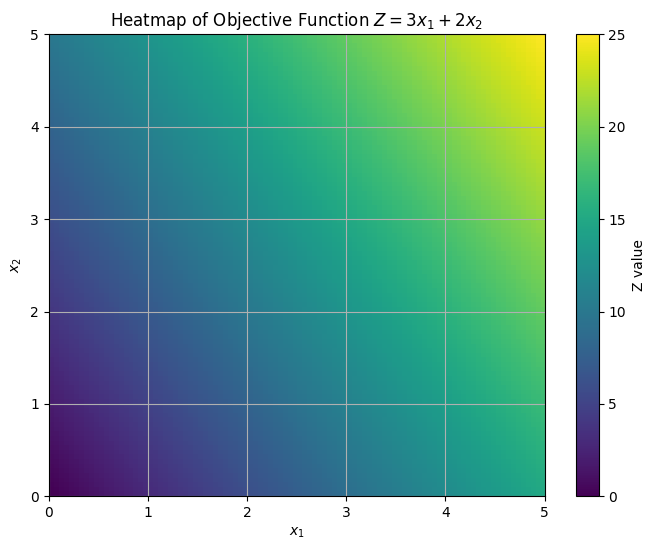

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Define the objective function
def objective_function(x1, x2):
    return 3 * x1 + 2 * x2

# Define the range for x1 and x2
x1_range = np.linspace(0, 5, 100)
x2_range = np.linspace(0, 5, 100)

# Create a grid of x1 and x2 values
X1, X2 = np.meshgrid(x1_range, x2_range)

# Calculate the corresponding Z values
Z = objective_function(X1, X2)

# Create the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Z value')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Heatmap of Objective Function $Z = 3x_1 + 2x_2$')
plt.grid(True)
plt.show()

El objetivo es encontrar el punto del área factible que **maximiza** $( Z )$ — como buscar la **cima de una colina dentro de un mapa** 🏔️.

As a visualization method of multivariable situations, it is apt to use Radarplots. They use lines to represent multivalued properties. The results, thou, do not translate to geometry.

#### Ejemplo:
En una pastelería local, el coste asocioado a una tanda de pasteles de caramelo se calcula con la siguiente ecuación:

$ C = 50 + (s - 2)^2$
with
- C = Coste [€]
- s = kilogramos de dulces a realizar.
- 50€: coste fijo por abrir cocina.

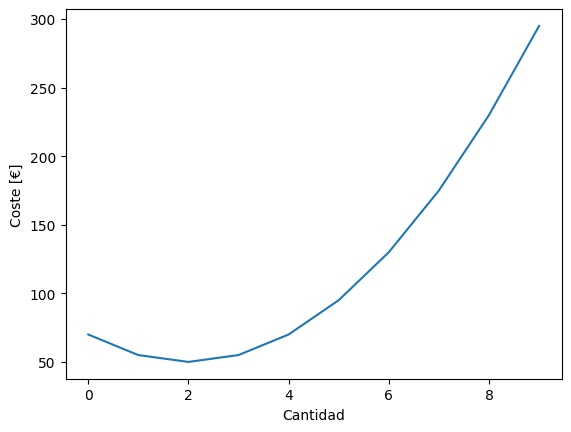

In [ ]:
# Create an array of integers from 0 to 9
quantity = np.arange(10)


# Define the cost function
def cost(q):
  return (50 + 5 * ((q-2)**2))

# Plot cost versus quantity
plt.clf()
plt.plot(quantity, cost(quantity))
plt.xlabel('Cantidad')
plt.ylabel('Coste [€]')
plt.show()


##### Podrías decir a simple vista dónde ocurre el valor óptimo?



In [ ]:
# Calculate the profit for every quantity
profits = profit(quantity)

# Find the maximum profit
max_profit = max(profits)

# Find the optimal quantity
max_profit_ind = np.argmax(profits)
optimal_quantity = quantity[max_profit_ind]

# Print the results
print(f"You need to print {optimal_quantity*1000} magazines to make the maximum profit of ${max_profit*1000}.")

#### Ejercicio:

Minimize $f(x)=(x−2)^2+1$

In [ ]:
x = cp.Variable()
objective = cp.Minimize((x - 2)**2 + 1)
problem = cp.Problem(objective)
problem.solve()
print(x.value)

2.0


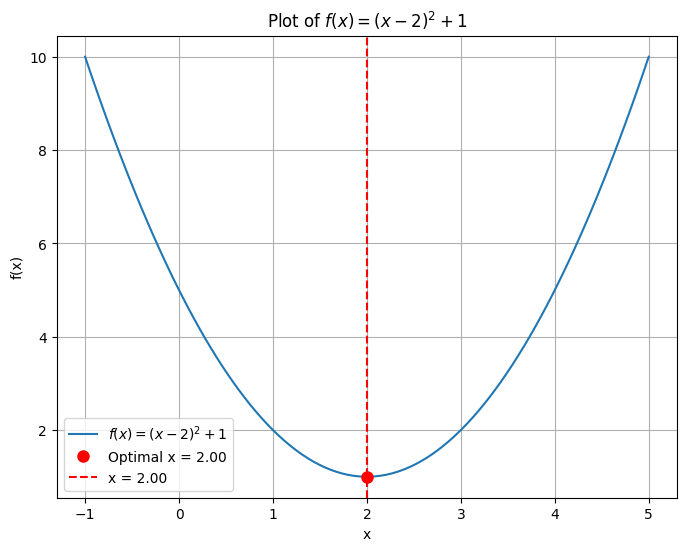

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

# Define the function
def f(x):
    return (x - 2)**2 + 1

# Generate x values
x_values = np.linspace(-1, 5, 100) # Adjust the range as needed

# Calculate corresponding y values
y_values = f(x_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=r'$f(x)=(x-2)^2+1$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f(x)=(x-2)^2+1$')
plt.grid(True)
plt.legend()

# Get the optimal x value from the previous cell (assuming it has been run)
# We need to re-solve the problem here to get access to x.value
x = cp.Variable()
objective = cp.Minimize((x - 2)**2 + 1)
problem = cp.Problem(objective)
problem.solve()
optimal_x = x.value

# Mark the optimal point on the plot
if optimal_x is not None:
    optimal_y = f(optimal_x)
    plt.plot(optimal_x, optimal_y, 'ro', markersize=8, label=f'Optimal x = {optimal_x:.2f}') # 'ro' for red circle marker
    plt.axvline(x=optimal_x, color='r', linestyle='--', label=f'x = {optimal_x:.2f}') # Add a vertical dashed line at optimal x
    plt.legend()


plt.show()

## ⭐ Solución óptima

$$ \text{
    El mejor punto dentro del área permitida
}
$$

# Problemas de Optimización


$$
min:  {f(x): x∈𝓕} \\
x∊ℝⁿ
$$



$$
min \; f(x) \\  
\text{sujeto a  } x∈𝓕 \\
x∈ℝⁿ
$$


$$
\text{min }
f(x) \\
\text{sujeto a: } \\
C(x) ≤ \vec{0}
$$



## Maximizar:
El mismo problema puede describir un problema de maximización ejecutando los siguientes cambios:


| minimization    | maximization |
|--------|-----|
| min    | max |
| $f(x)$ | $-f(x)$ |
| x | x |

# Solución


Un modelo de optimización tiene solución ${ x^⛤ }$ si:
${ x^⛤ }$ es factible

Factible:  
$$
x^⛤∈𝓕
$$

${ x^⛤ }$  es un Óptimo Local,
Si

$$
∃ε :  \{ \\
ε>0  \\
∀x: \{  
    | x^⛤- x | <  ε
    \} \\
f (x^⛤)  ≤  f (x)   
\\
\}
$$

In [103]:
from manim import *
from manim.utils.color import rgb_to_color  # ✅ add this
import numpy as np
import matplotlib.pyplot as plt

class HeatmapOptimumPoints(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 3, 1],
            y_range=[0, 3, 1],
            axis_config={"color": GRAY_A},
            tips=False
        ).add_coordinates()
        x_label = MathTex("x_1").next_to(axes.x_axis.get_end(), DOWN)
        y_label = MathTex("x_2").next_to(axes.y_axis.get_end(), LEFT)
        self.play(Create(axes), Write(x_label), Write(y_label))

        def f(x, y):
            return (x - 1)**2 + (y - 1)**2 + 0.3*np.sin(3*x)*np.cos(3*y)

        res = 40
        x = np.linspace(0, 3, res)
        y = np.linspace(0, 3, res)
        X, Y = np.meshgrid(x, y)
        Z = f(X, Y)
        Z_norm = (Z - Z.min()) / (Z.max() - Z.min())
        cmap = plt.get_cmap("plasma")

        dots = VGroup()
        for i in range(res):
            for j in range(res):
                val = Z_norm[i, j]
                r, g, b = cmap(val)[:3]
                color = rgb_to_color([r, g, b])  # ✅ conversion
                dot = Dot(
                    point=axes.c2p(x[j], y[i]),
                    radius=0.05,
                    color=color
                )
                dots.add(dot)

        self.play(LaggedStart(*[FadeIn(d, scale=0.6) for d in dots], lag_ratio=0.001))
        self.wait(0.5)

        x_star = axes.c2p(1, 1)
        opt_point = Dot(x_star, color=YELLOW, radius=0.07)
        opt_label = MathTex("x^{\\star}", color=YELLOW).next_to(opt_point, UR)
        self.play(FadeIn(opt_point), Write(opt_label))

        eps_circle = Circle(radius=0.4, color=GOLD, stroke_opacity=0.8).move_to(x_star)
        eps_label = MathTex("\\varepsilon", color=GOLD).next_to(eps_circle, UP)
        self.play(Create(eps_circle), Write(eps_label))

        explanation = Tex(
            r"En el punto $x^{\star}$, todos los puntos en su entorno ",
            r"tienen valores $f(x)$ mayores $\Rightarrow$ es un mínimo local.",
            font_size=28
        ).arrange(DOWN).to_edge(DOWN)
        self.play(Write(explanation))
        self.wait(10)


In [104]:
%%manim -qm -v WARNING HeatmapOptimumPoints


Manim Community v0.19.0

# 🧱 The Conceptual Model



Optimization problems can be represented abstractly as:


$$
\min_{x \in 𝕏⃗}  ⠀⠀⠀⠀ f(x) \\
⠀⠀
\quad \text{subject to} \\ ⠀⠀⠀⠀⠀⠀⠀
\quad g_i(x) \le 0 \\ ⠀⠀⠀⠀⠀⠀⠀⠀⠀
 h_j(x) = 0
$$


So you’ll want three components:

1. **Decision Variables** → $(x_i)$
2. **Objective Function** → $(f(x))$
3. **Constraints** → $(g_i(x))$, $(h_j(x))$

In [73]:
from typing import Callable, List
import numpy as np

def is_numeric(obj):
    return isinstance(obj, (int, float))

class Variable:
    def __init__(self, name: str, lower=0, upper=np.inf):
        # Enforce: lower bound must be <= upper bound
        if lower > upper:
            raise ValueError(f"Lower bound ({lower}) cannot be greater than upper bound ({upper}) for variable '{name}'")

        self.name = name
        self.lower = lower
        self.upper = upper

    def __repr__(self):
        # Display the variable and its bounds, and value if set
        value_str = f" = {self.value}" if self.value is not None else ""
        return f"{self.name} ∈ [{self.lower}, {self.upper}]{value_str}"

    # Overload operators
    def __neg__(self):
        # Example: -x
        result = Variable(f"-{self.name}")
        result.lower = -self.upper
        result.upper = -self.lower
        if self.value is not None:
            result.value = -self.value
        return result

    def __add__(self, other):
        # Example: x + y or x + 5
        if isinstance(other, Variable):
            # Adding two variables
            result = Variable(f"({self.name} + {other.name})")
            result.lower = self.lower + other.lower
            result.upper = self.upper + other.upper
            if self.value is not None:
                if other.value is not None:
                    result.value = self.value + other.value
        elif is_numeric(other):
            # Adding a variable and a constant
            result = Variable(f"({self.name} + {other})")
            result.lower = self.lower + other
            result.upper = self.upper + other
            if self.value is not None:
                result.value = self.value + other
        else:
            return NotImplemented
            #-- Let Python handle addition if other type has __radd__
        return result

    def __radd__(self, other):
        return self.__add__(other)
        #-- For commutative operations

    def __sub__(self, other):
        return self + (-other)

    def __rsub__(self, other):
        return  other + (-self)

    def __mul__(self, other):
         # Example: 2 * x
        if is_numeric(other):
            result = Variable(f"({other} {self.name})")
            if other == 0:
                result.lower = 0
                result.upper = 0
                result.value = 0
            elif other > 0:
                result.lower = self.lower * other
                result.upper = self.upper * other
                if self.value is not None:
                    result.value = self.value * other
            elif other < 0:
                result.lower = self.upper * other
                result.upper = self.lower * other
                if self.value is not None:
                    result.value = self.value * other
            else:
                raise ValueError(f"Invalid multiplication factor: {other}")
            return result

        elif isinstance(other, Variable):
            result = Variable(f"({self.name}{other.name})")
            result.lower = min(
                self.lower * other.lower,
                self.lower * other.upper,
                self.upper * other.lower,
                self.upper * other.upper,
                )
            result.upper = max(
                self.lower * other.lower,
                self.lower * other.upper,
                self.upper * other.lower,
                self.upper * other.upper,
                )
            if self.value is not None and other.value is not None:
                result.value = self.value * other.value
        else:
             return NotImplemented
        return result

    def __rmul__(self, other):
        # Handle cases like x * 2
        return self.__mul__(other) # For commutative operations

    def __le__(self, other):
        ## Reinforce the Less than or equal
        if is_numeric(other):
            result = Variable(f"({self.name}")
            if self.lower <= other:
                result.lower = self.lower
                result.upper = other
            else:
                raise ValueError(f"Invalid range [{self.lower}..{self.upper}] ≤ {other} is empty.")
        if isinstance(other, Variable):
            result = Variable(f"({self.name}≤{other.name}")
            if self.lower <= other.upper:
                result.upper = min(
                    self.upper, other.upper
                    )
                result.upper = other
            else:
                raise ValueError(f"Invalid range [{self.lower}..{self.upper}] ≤ [{other.lower}..{other.upper}] is empty.")
        return result

    def __ge__(self, other):
        ## Reinforce the Greater than or equal
        if is_numeric(other):
            result = Variable(f"({self.name}")
            if self.upper >= other:
                result.lower = other
                result.upper = self.upper
            else:
                raise ValueError(f"Invalid range [{self.lower}..{self.upper}] ≥ {other} is empty.")
        if isinstance(other, Variable):
            result = Variable(f"({self.name}≥{other.name}")
            if self.upper >= other.lower:
                result.upper = max(
                    self.lower, other.lower
                    )
                result.upper = other
            else:
                raise ValueError(f"Invalid range [{self.lower}..{self.upper}] ≥ [{other.lower}..{other.upper}] is empty.")
        return result

    def __and__(self, other):
        return Variable(
            f"{self.name}∩{other.name}",
            lower=max(self.lower, other.lower),
            upper=min(self.upper, other.upper))

    def __or__(self, other):
        return Variable(
            f"{self.name}∪{other.name}",
            lower=min(self.lower, other.lower),
            upper=max(self.upper, other.upper))

    def __contains__(self, value):
        return self.lower <= value <= self.upper

    def __call__(self):
        return self.value

    def __abs__(self):
        return self.upper - self.lower

In [74]:
x = Variable("x", 2)
y = Variable("y", 3)
z = Variable("z")
z.link(lambda a, b: a + b, x, y)

print(z.value)  # 5
x.set(10)
print(z.value)  # 13 — updates automatically!


AttributeError: 'Variable' object has no attribute 'link'

In [ ]:
# Test creating Variable objects

# Valid variable creation
x1 = Variable("x1", lower=0, upper=10)
print(f"Created variable: {x1}")

x2 = Variable("x2", lower=-5)
print(f"Created variable: {x2}")

x3 = Variable("x3", upper=100)
print(f"Created variable: {x3}")

x4 = Variable("x4") # Default bounds (0 to infinity)
print(f"Created variable: {x4}")

# Attempt to create a variable with invalid bounds (should raise ValueError)
try:
    invalid_var = Variable("invalid_x", lower=10, upper=5)
    print(f"Unexpectedly created variable: {invalid_var}")
except ValueError as e:
    print(f"Successfully caught expected error: {e}")

# Test accessing attributes
print(f"x1 name: {x1.name}, lower bound: {x1.lower}, upper bound: {x1.upper}")

In [ ]:
# Test overloaded operators for Variable objects

# Create some Variable instances
x = Variable("x", lower=1, upper=5)
y = Variable("y", lower=2, upper=10)

print(f"Original variable x: {x}")
print(f"Original variable y: {y}")
print("-" * 20)

# Test negation
neg_x = -x
print(f"Negation of x (-x): {neg_x}")
print("-" * 20)

# Test addition
sum_xy = x + y
print(f"Addition x + y: {sum_xy}")

sum_x_const = x + 5
print(f"Addition x + 5: {sum_x_const}")

sum_const_y = 10 + y
print(f"Addition 10 + y: {sum_const_y}")
print("-" * 20)

# Test multiplication
mul_x_const = 2 * x
print(f"Multiplication 2 * x: {mul_x_const}")

mul_const_y = y * 3
print(f"Multiplication y * 3: {mul_const_y}")

mul_x_y = x * y
print(f"Multiplication xy: {mul_x_y}")

print("-" * 20)
le_x_y = x <= y
print(f"x <= y: {le_x_y}")
ge_x_y = x >= y
print(f"x >= y: {ge_x_y}")

and_x_y = x & y
print(f"x & y: {and_x_y}")

or_x_y = x | y
print(f"x | y: {or_x_y}")


In [ ]:
from typing import List, Union

class Constraint:
    def __init__(
            self,
            coefficients: List[float],
            variables: List['Variable'],
            sense: str = "<=",
            value: float = 0.0,
            name: str = None
            ):
        if len(coefficients) != len(variables):
            raise ValueError("Number of coefficients must match number of variables.")

        # Contract-style checks
        if sense not in {"<=", ">=", "=="}:
            raise ValueError(f"Invalid constraint sense '{sense}'. Must be one of <=, >=, ==.")

        self.coefficients = coefficients
        self.variables = variables
        self.sense = sense
        self.value = value
        self.name = name or f"C_{id(self)}"

    def evaluate(self):
        """Compute the numeric value of the LHS if variables have assigned values."""
        total = 0
        for coef, var in zip(self.coefficients, self.variables):
            if var.value is None:
                raise ValueError(f"Variable '{var.name}' has no value assigned.")
            total += coef * var.value
        return total

    def is_satisfied(self):
        """Check if the constraint is satisfied given variable values."""
        delta = 1e-9
        val = self.evaluate()
        if self.sense == "<=":
            return val <= self.value + delta
        if self.sense == ">=":
            return val >= self.value - delta
        if self.sense == "==":
            return abs(val - self.value) < delta

    def __repr__(self):
        lhs = " + ".join(
            f"{coef}·{var.name}" for coef, var in zip(self.coefficients, self.variables)
        )
        return f"{lhs} {self.sense} {self.value}"


In [ ]:
x1 = Variable("x1", lower=0)
x2 = Variable("x2", lower=0)

print(f"a1: {1*x1 + 2*x2 <= 8}")
print(f"a2: {3*x1 + 1*x2 >= 4}")

x1.value = 2
x2.value = 3

c1 = Constraint([1, 2], [x1, x2], "<=", 8)
c2 = Constraint([3, 1], [x1, x2], ">=", 4)

print(c1)
    # → 1·x1 + 2·x2 <= 8
print("Satisfied:", c1.is_satisfied())
    # True, since 1*2 + 2*3 = 8


In [ ]:
class Objective:
    def __init__(self, function,):

In [ ]:
class OptimizationProblem:
    def __init__(self, variables, constraints, objective):
        self.variables = variables
        self.constraints = constraints
        self.objective = objective

    def evaluate_objective(self):
        values = [v.value for v in self.variables]
        return self.objective.evaluate(values)

    def is_feasible(self):
        return all(c.is_satisfied() for c in self.constraints)

    def __repr__(self):
        return (
            f"OptimizationProblem(\n"
            f"  Variables: {[str(v) for v in self.variables]},\n"
            f"  Objective: {self.objective},\n"
            f"  Constraints: {[str(c) for c in self.constraints]}\n)"
        )


In [ ]:
x1 = Variable("x1", lower=0, upper=5)
x2 = Variable("x2", lower=0, upper=4)
x1.value, x2.value = 2, 3

obj = Objective(lambda x: 3*x[0] + 2*x[1], sense="max")
z = 3*x1 + 2*x2

print(f"Objective: {z}")

c1 = Constraint([1, 2], [x1, x2], "<=", 8)
c2 = Constraint([3, 1], [x1, x2], ">=", 4)

prob = OptimizationProblem([x1, x2], [c1, c2], obj)

print(prob)
print("Objective value:", prob.evaluate_objective())
print("Feasible?", prob.is_feasible())


# Variables Binarias


- Seleccionan o Activan Unidades.
- Expresiones Lógicas
- Valores Excluyentes
- Costes Fijos
- Implicaciones
- Aproximaciones lineales


# Conjuntos Afines

Un conjunto $A⊂ℝⁿ$ se dice afín si para $∀x_1∀x_2 ∈ A:
| λx_1 + (1-λ)x_2 ∈ A$ para todo $λ∈ℝ$

Conclusión:
Toda la generación de $λ$ en el espacio es parte de A
$x_1$ y $x_2$  forman una recta -> $A$ es lineal.



# Ejercicio 2
Dado el siguiente problema lineal:

$$
\begin{matrix}
max  & 3x_1 & + & 2x_2 \\
s.a. & x_1 & + & 2x_2 & ≤ 6\\
     & 2x_1 & + & x_2 & ≤ 8\\
     & -x_1 & + & x_2 & ≤ 1 \\
     &      &   & x_2 & ≤ 2  \\
x_1,x_2 & ≥0 &  \\
 &  &  \\
\end{matrix}
$$


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constraints
# x1 + 2x2 <= 6  => x2 <= (6 - x1)/2
# 2x1 + x2 <= 8  => x2 <= 8 - 2x1
# -x1 + x2 <= 1  => x2 <= 1 + x1
# x2 <= 2

x = np.linspace(0, 5, 400)
y1 = (6 - x) / 2
y2 = 8 - 2 * x
y3 = 1 + x
y4 = 2

# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$x_1 + 2x_2 \leq 6$')
plt.plot(x, y2, label=r'$2x_1 + x_2 \leq 8$')
plt.plot(x, y3, label=r'$-x_1 + x_2 \leq 1$')
plt.axhline(y=y4, color='purple', linestyle='-', label=r'$x_2 \leq 2$')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')

# Fill the feasible region
plt.fill_between(x, 0, np.minimum(np.minimum(np.minimum(y1, y2), y3), y4),
    where=(x>=0) & (np.minimum(np.minimum(np.minimum(y1, y2), y3), y4)>=0),
    color='skyblue', alpha=0.25)

# Add the gradient vector of the objective function (3, 2)
plt.quiver(0, 0, 3, 2, color='gold', scale=1, angles='xy', scale_units='xy', label=r'$\nabla z = (3, 2)$')


plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Region Factible')
plt.legend()
plt.grid(True)
plt.show()

1. Representa gráficamente la región factible del problema.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constraints
# x1 + 2x2 <= 6  => x2 <= (6 - x1)/2
# 2x1 + x2 <= 8  => x2 <= 8 - 2x1
# -x1 + x2 <= 1  => x2 <= 1 + x1
# x2 <= 2

x = np.linspace(0, 5, 400)
y1 = (6 - x) / 2
y2 = 8 - 2 * x
y3 = 1 + x
y4 = 2

# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$x_1 + 2x_2 \leq 6$')
plt.plot(x, y2, label=r'$2x_1 + x_2 \leq 8$')
plt.plot(x, y3, label=r'$-x_1 + x_2 \leq 1$')
plt.axhline(y=y4, color='purple', linestyle='-', label=r'$x_2 \leq 2$')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')

# Fill the feasible region
plt.fill_between(x, 0, np.minimum(np.minimum(np.minimum(y1, y2), y3), y4),
    where=(x>=0) & (np.minimum(np.minimum(np.minimum(y1, y2), y3), y4)>=0),
    color='skyblue', alpha=0.25)

# Add the gradient vector of the objective function (3, 2)
plt.quiver(0, 0, 3, 2, color='gold', scale=1, angles='xy', scale_units='xy', label=r'$\nabla z = (3, 2)$')


plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Region Factible')
plt.legend()
plt.grid(True)
plt.show()

2. Resuelve el problema en forma estándar por el algortimo del simplex


3. Identifica en la representación gráfica el recorrido por los puntos extremos que hace el algoritmo del simplex.

4. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo.

5. Realiza el análisis de sensibilidad de los términos independientes de las
restricciones.

6. ¿Cómo varía la solución óptima si se añade una nueva variable $x_3$ con coeficiente en la función objetivo $c_3 = 4$ y vector columna en las restricciones
$(1, 1, −1, −1)^t$?

7. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo
y los términos independientes del nuevo problema con tres variables.

# 6. Dada la siguiente tabla del simplex en un problema de minimización:

v.b. | 1 | -2 | -1  | 1   | M   | 0   | 0 | $b_0$
-----|---|----|-----|-----|-----|-----|---|-------
x    | 1 |  0 | 2:3 | 1:3 | 1:3 |-1:3 | 0 | 2
y    | 0 | 1  | 1:3 | 2:3 | 2:3 | 1:3 | 0 | 7
$s^+_3$ | 3 | 0 | 0 | 4 | 1 | 0 | 0   | 1 | 6
__r__ | 0 | 0 | -1 | 2 | $M+1$  | 1   | 0 | 12

1. ¿La tabla dada corresponde a una solución óptima? Si no es así, continúa con las iteraciones hasta alcanzar una solución óptima?

2. Para la tabla óptima determinar la matriz $B^{−1}$ asociada con el punto extremo óptimo.

3. Determina cómo es la formulación matemática del problema lineal que se
está resolviendo con la tabla del simplex.

4. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo.

5. Realiza el análisis de sensibilidad de los términos independientes de las
restricciones.

# 8.1) Resuelve por el algoritmo de escalado afín de paso largo los siguientes problemas lineales

$$
\begin{matrix}
max  & x_1 & + & 2x_2 & + & x_3\\
s.a. & 2x_1 & + & x_2 & + & x_3 & = 12\\
& x_1 & - & 2x_2 & + & 2x_3 & = 12\\
x_1,x_2, x_3 & ≥0 &  \\
 &  &  \\
\end{matrix}
$$


In [ ]:
import subprocess

try:
    # Run the Ada executable
    # communicate() sends input to stdin and reads output from stdout and stderr
    process = subprocess.Popen(["./ada_greeter"], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    # Send input to the Ada program and get the output
    stdout, stderr = process.communicate(input="Colab User\n")

    # Print the output
    print("Ada Program Output:")
    print(stdout)

    if stderr:
        print("Ada Program Errors:")
        print(stderr)

except FileNotFoundError:
    print("Error: The Ada executable 'ada_greeter' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# Task
Visualize the feasible region defined by $x_1 \geq 0$ and $x_2 \geq 0$ in 2D using Manim.

## Set up the manim scene

### Subtask:
Create a basic Manim scene with 2D axes for $x_1$ and $x_2$.


**Reasoning**:
Create a Manim scene with 2D axes for x1 and x2 as requested by the subtask.



In [ ]:
from manim import *

class FeasibleRegion(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 6, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
            x_axis_config={"numbers_with_zero_on_right": True, "font_size": 24},
            y_axis_config={"font_size": 24},
            tips=False,
        )

        x_label = axes.get_x_axis_label(r"$x_1$").shift(DOWN * 0.5)
        y_label = axes.get_y_axis_label(r"$x_2$").shift(LEFT * 0.5)

        self.play(Create(axes), Write(x_label), Write(y_label))
        self.wait()

## Define and plot constraint lines

### Subtask:
Represent the inequality constraints as lines in the Manim scene.


**Reasoning**:
Define the functions for the inequality constraints and create the corresponding lines to represent the boundaries of the feasible region.



In [ ]:
class FeasibleRegion(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 6, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
            x_axis_config={"numbers_with_zero_on_right": True, "font_size": 24},
            y_axis_config={"font_size": 24},
            tips=False,
        )

        x_label = axes.get_x_axis_label(r"$x_1$").shift(DOWN * 0.5)
        y_label = axes.get_y_axis_label(r"$x_2$").shift(LEFT * 0.5)

        self.play(Create(axes), Write(x_label), Write(y_label))

        # Define the functions for the inequality constraints
        def constraint1(x):
            return (6 - x) / 2

        def constraint2(x):
            return 8 - 2 * x

        def constraint3(x):
            return 1 + x

        def constraint4(x):
            return 2

        # Create the lines for each constraint
        constraint_line1 = always_redraw(
            lambda: axes.plot(
                constraint1, x_range=[0, 6], color=BLUE
            ).set_stroke(width=2)
        )
        constraint_line2 = always_redraw(
            lambda: axes.plot(
                constraint2, x_range=[0, 4], color=RED
            ).set_stroke(width=2)
        )
        constraint_line3 = always_redraw(
            lambda: axes.plot(
                constraint3, x_range=[0, 5], color=GREEN
            ).set_stroke(width=2)
        )
        constraint_line4 = always_redraw(
            lambda: axes.plot(
                constraint4, x_range=[0, 6], color=PURPLE
            ).set_stroke(width=2)
        )

        # Create a VGroup of all constraint lines
        constraint_lines = VGroup(
            constraint_line1, constraint_line2, constraint_line3, constraint_line4
        )

        # Play the creation of the constraint lines
        self.play(Create(constraint_lines))

        # Wait after the animation
        self.wait()


## Indicate feasible region

### Subtask:
Shade or highlight the area that satisfies all constraints and the non-negativity conditions ($x_1 \geq 0, x_2 \geq 0$).


**Reasoning**:
Calculate the intersection points of the constraints to define the vertices of the feasible region polygon, then create and add the polygon to the scene with appropriate styling and animation.



In [ ]:
import numpy as np
from manim import *

class FeasibleRegion(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 6, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
            x_axis_config={"numbers_with_zero_on_right": True, "font_size": 24},
            y_axis_config={"font_size": 24},
            tips=False,
        )

        x_label = axes.get_x_axis_label(r"$x_1$").shift(DOWN * 0.5)
        y_label = axes.get_y_axis_label(r"$x_2$").shift(LEFT * 0.5)

        self.play(Create(axes), Write(x_label), Write(y_label))

        # Define the functions for the inequality constraints
        def constraint1(x):
            return (6 - x) / 2

        def constraint2(x):
            return 8 - 2 * x

        def constraint3(x):
            return 1 + x

        def constraint4(x):
            return 2

        # Create the lines for each constraint
        constraint_line1 = always_redraw(
            lambda: axes.plot(
                constraint1, x_range=[0, 6], color=BLUE
            ).set_stroke(width=2)
        )
        constraint_line2 = always_redraw(
            lambda: axes.plot(
                constraint2, x_range=[0, 4], color=RED
            ).set_stroke(width=2)
        )
        constraint_line3 = always_redraw(
            lambda: axes.plot(
                constraint3, x_range=[0, 5], color=GREEN
            ).set_stroke(width=2)
        )
        constraint_line4 = always_redraw(
            lambda: axes.plot(
                constraint4, x_range=[0, 6], color=PURPLE
            ).set_stroke(width=2)
        )

        # Create a VGroup of all constraint lines
        constraint_lines = VGroup(
            constraint_line1, constraint_line2, constraint_line3, constraint_line4
        )

        self.play(Create(constraint_lines))

        # Calculate the vertices of the feasible region
        # Intersection of x2=0 and x1=0: (0, 0)
        # Intersection of x1=0 and x2<=1+x1 => x2=1: (0, 1)
        # Intersection of x2=1+x1 and x2=2: 2 = 1 + x1 => x1 = 1. (1, 2)
        # Intersection of x2=2 and x1 + 2x2 = 6 => x1 + 4 = 6 => x1 = 2. (2, 2)
        # Intersection of x1 + 2x2 = 6 and 2x1 + x2 = 8:
        # x1 = 6 - 2x2
        # 2(6 - 2x2) + x2 = 8
        # 12 - 4x2 + x2 = 8
        # 12 - 3x2 = 8
        # 3x2 = 4 => x2 = 4/3
        # x1 = 6 - 2(4/3) = 6 - 8/3 = (18-8)/3 = 10/3. (10/3, 4/3)
        # Intersection of 2x1 + x2 = 8 and x2 = 0: 2x1 = 8 => x1 = 4. (4, 0)

        vertices = [
            axes.coords_to_point(0, 0),
            axes.coords_to_point(0, 1),
            axes.coords_to_point(1, 2),
            axes.coords_to_point(2, 2),
            axes.coords_to_point(10/3, 4/3),
            axes.coords_to_point(4, 0)
        ]

        feasible_region_polygon = Polygon(*vertices, fill_color=YELLOW, fill_opacity=0.5, stroke_color=YELLOW)

        # Add the polygon to the scene below the lines
        self.play(FadeIn(feasible_region_polygon, run_time=2))

        self.wait(2)


## Label the feasible region

### Subtask:
Add text labels or annotations to indicate the feasible region.


**Reasoning**:
Add a text label "Feasible Region" within the shaded area and animate its appearance.



In [ ]:
import numpy as np
from manim import *

class FeasibleRegion(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 6, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
            x_axis_config={"numbers_with_zero_on_right": True, "font_size": 24},
            y_axis_config={"font_size": 24},
            tips=False,
        )

        x_label = axes.get_x_axis_label(r"$x_1$").shift(DOWN * 0.5)
        y_label = axes.get_y_axis_label(r"$x_2$").shift(LEFT * 0.5)

        self.play(Create(axes), Write(x_label), Write(y_label))

        # Define the functions for the inequality constraints
        def constraint1(x):
            return (6 - x) / 2

        def constraint2(x):
            return 8 - 2 * x

        def constraint3(x):
            return 1 + x

        def constraint4(x):
            return 2

        # Create the lines for each constraint
        constraint_line1 = always_redraw(
            lambda: axes.plot(
                constraint1, x_range=[0, 6], color=BLUE
            ).set_stroke(width=2)
        )
        constraint_line2 = always_redraw(
            lambda: axes.plot(
                constraint2, x_range=[0, 4], color=RED
            ).set_stroke(width=2)
        )
        constraint_line3 = always_redraw(
            lambda: axes.plot(
                constraint3, x_range=[0, 5], color=GREEN
            ).set_stroke(width=2)
        )
        constraint_line4 = always_redraw(
            lambda: axes.plot(
                constraint4, x_range=[0, 6], color=PURPLE
            ).set_stroke(width=2)
        )

        # Create a VGroup of all constraint lines
        constraint_lines = VGroup(
            constraint_line1, constraint_line2, constraint_line3, constraint_line4
        )

        self.play(Create(constraint_lines))

        # Calculate the vertices of the feasible region
        # Intersection of x2=0 and x1=0: (0, 0)
        # Intersection of x1=0 and x2<=1+x1 => x2=1: (0, 1)
        # Intersection of x2=1+x1 and x2=2: 2 = 1 + x1 => x1 = 1. (1, 2)
        # Intersection of x2=2 and x1 + 2x2 = 6 => x1 + 4 = 6 => x1 = 2. (2, 2)
        # Intersection of x1 + 2x2 = 6 and 2x1 + x2 = 8:
        # x1 = 6 - 2x2
        # 2(6 - 2x2) + x2 = 8
        # 12 - 4x2 + x2 = 8
        # 12 - 3x2 = 8
        # 3x2 = 4 => x2 = 4/3
        # x1 = 6 - 2(4/3) = 6 - 8/3 = (18-8)/3 = 10/3. (10/3, 4/3)
        # Intersection of 2x1 + x2 = 8 and x2 = 0: 2x1 = 8 => x1 = 4. (4, 0)

        vertices = [
            axes.coords_to_point(0, 0),
            axes.coords_to_point(0, 1),
            axes.coords_to_point(1, 2),
            axes.coords_to_point(2, 2),
            axes.coords_to_point(10/3, 4/3),
            axes.coords_to_point(4, 0)
        ]

        feasible_region_polygon = Polygon(*vertices, fill_color=YELLOW, fill_opacity=0.5, stroke_color=YELLOW)

        # Add the polygon to the scene below the lines
        self.play(FadeIn(feasible_region_polygon, run_time=2))

        # Add text label for the feasible region
        feasible_text = Text("Feasible Region", font_size=24, color=BLACK)

        # Position the text within the feasible region (adjust position manually if needed)
        # A possible position is near the center of the feasible region
        text_position = axes.coords_to_point(2, 1)
        feasible_text.move_to(text_position)

        self.play(Write(feasible_text))


        self.wait(2)

## Add axes labels

### Subtask:
Label the x and y axes as $x_1$ and $x_2$.


## Render the manim animation

### Subtask:
Render the manim animation to generate the video file of the visualization.


**Reasoning**:
Render the Manim scene to generate the video output of the feasible region visualization with the label.



In [ ]:
with open("ada_greeter.adb", "w") as f:
    f.write("with Ada.Text_IO;\n")
    f.write("procedure Ada_Greeter is\n")
    f.write("   Name : String(1..20);\n")
    f.write("   Last : Integer;\n")
    f.write("begin\n")
    f.write("   Ada.Text_IO.Put_Line(\"Enter your name:\");\n")
    f.write("   Ada.Text_IO.Get_Line(Name, Last);\n")
    f.write("   Ada.Text_IO.Put_Line(\"Hello, \" & Name(1..Last) & \"!\");\n")
    f.write("end Ada_Greeter;\n")

!gnatmake ada_greeter.adb

In [ ]:
!gnatmake test_simplex.adb linear_algebra.adb optimization_types.adb simplex.adb

In [ ]:
!gnatmake test_simplex.adb linear_algebra.adb optimization_types.adb simplex.adb

In [ ]:
!gnatmake test_simplex.adb linear_algebra.adb optimization_types.adb simplex.adb

In [ ]:
!gnatmake test_simplex.adb linear_algebra.adb optimization_types.adb simplex.adb

**Reasoning**:
The previous attempt to render the Manim scene failed due to an invalid keyword argument `numbers_with_zero_on_right` in the `Axes` configuration. This likely indicates a version incompatibility or a change in the Manim API. I need to remove this argument from the `Axes` configuration and try rendering again.



In [ ]:
import numpy as np
from manim import *

class FeasibleRegion(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 6, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
            x_axis_config={"font_size": 24},
            y_axis_config={"font_size": 24},
            tips=False,
        )

        x_label = axes.get_x_axis_label(r"$x_1$").shift(DOWN * 0.5)
        y_label = axes.get_y_axis_label(r"$x_2$").shift(LEFT * 0.5)

        self.play(Create(axes), Write(x_label), Write(y_label))

        # Define the functions for the inequality constraints
        def constraint1(x):
            return (6 - x) / 2

        def constraint2(x):
            return 8 - 2 * x

        def constraint3(x):
            return 1 + x

        def constraint4(x):
            return 2

        # Create the lines for each constraint
        constraint_line1 = always_redraw(
            lambda: axes.plot(
                constraint1, x_range=[0, 6], color=BLUE
            ).set_stroke(width=2)
        )
        constraint_line2 = always_redraw(
            lambda: axes.plot(
                constraint2, x_range=[0, 4], color=RED
            ).set_stroke(width=2)
        )
        constraint_line3 = always_redraw(
            lambda: axes.plot(
                constraint3, x_range=[0, 5], color=GREEN
            ).set_stroke(width=2)
        )
        constraint_line4 = always_redraw(
            lambda: axes.plot(
                constraint4, x_range=[0, 6], color=PURPLE
            ).set_stroke(width=2)
        )

        # Create a VGroup of all constraint lines
        constraint_lines = VGroup(
            constraint_line1, constraint_line2, constraint_line3, constraint_line4
        )

        self.play(Create(constraint_lines))

        # Calculate the vertices of the feasible region
        # Intersection of x2=0 and x1=0: (0, 0)
        # Intersection of x1=0 and x2<=1+x1 => x2=1: (0, 1)
        # Intersection of x2=1+x1 and x2=2: 2 = 1 + x1 => x1 = 1. (1, 2)
        # Intersection of x2=2 and x1 + 2x2 = 6 => x1 + 4 = 6 => x1 = 2. (2, 2)
        # Intersection of x1 + 2x2 = 6 and 2x1 + x2 = 8:
        # x1 = 6 - 2x2
        # 2(6 - 2x2) + x2 = 8
        # 12 - 4x2 + x2 = 8
        # 12 - 3x2 = 8
        # 3x2 = 4 => x2 = 4/3
        # x1 = 6 - 2(4/3) = 6 - 8/3 = (18-8)/3 = 10/3. (10/3, 4/3)
        # Intersection of 2x1 + x2 = 8 and x2 = 0: 2x1 = 8 => x1 = 4. (4, 0)

        vertices = [
            axes.coords_to_point(0, 0),
            axes.coords_to_point(0, 1),
            axes.coords_to_point(1, 2),
            axes.coords_to_point(2, 2),
            axes.coords_to_point(10/3, 4/3),
            axes.coords_to_point(4, 0)
        ]

        feasible_region_polygon = Polygon(*vertices, fill_color=YELLOW, fill_opacity=0.5, stroke_color=YELLOW)

        # Add the polygon to the scene below the lines
        self.play(FadeIn(feasible_region_polygon, run_time=2))

        # Add text label for the feasible region
        feasible_text = Text("Feasible Region", font_size=24, color=BLACK)

        # Position the text within the feasible region (adjust position manually if needed)
        # A possible position is near the center of the feasible region
        text_position = axes.coords_to_point(2, 1)
        feasible_text.move_to(text_position)

        self.play(Write(feasible_text))


        self.wait(2)

**Reasoning**:
Now that the invalid keyword argument has been removed from the `Axes` configuration, I can attempt to render the Manim scene again to generate the video output.



In [ ]:
%%manim -v WARNING -qm --renderer=cairo FeasibleRegion

**Reasoning**:
The Manim rendering failed again, this time with a LaTeX compilation error related to "$x_1$". This suggests an issue with how the LaTeX expression is being handled by Manim's text rendering. The traceback points to `get_x_axis_label` and `get_y_axis_label`. A common fix for LaTeX issues in Manim is to use `MathTex` instead of `Text` for mathematical expressions and ensure they are properly escaped if necessary, although in this case, the simple `r"$x_1$"` and `r"$x_2$"` should ideally work. Another potential issue could be related to the Manim configuration or the LaTeX installation itself, but since the initial LaTeX installation seemed successful, I will first try modifying how the labels are created to use `MathTex` as it is specifically designed for mathematical notation in Manim.



In [ ]:
import numpy as np
from manim import *

class FeasibleRegion(Scene):
    def construct(self):
        axes = Axes(
            x_range=[0, 6, 1],
            y_range=[0, 6, 1],
            x_length=6,
            y_length=6,
            axis_config={"include_numbers": True},
            x_axis_config={"font_size": 24},
            y_axis_config={"font_size": 24},
            tips=False,
        )

        # Use MathTex for axis labels
        x_label = axes.get_x_axis_label(MathTex(r"x_1")).shift(DOWN * 0.5)
        y_label = axes.get_y_axis_label(MathTex(r"x_2")).shift(LEFT * 0.5)

        self.play(Create(axes), Write(x_label), Write(y_label))

        # Define the functions for the inequality constraints
        def constraint1(x):
            return (6 - x) / 2

        def constraint2(x):
            return 8 - 2 * x

        def constraint3(x):
            return 1 + x

        def constraint4(x):
            return 2

        # Create the lines for each constraint
        constraint_line1 = always_redraw(
            lambda: axes.plot(
                constraint1, x_range=[0, 6], color=BLUE
            ).set_stroke(width=2)
        )
        constraint_line2 = always_redraw(
            lambda: axes.plot(
                constraint2, x_range=[0, 4], color=RED
            ).set_stroke(width=2)
        )
        constraint_line3 = always_redraw(
            lambda: axes.plot(
                constraint3, x_range=[0, 5], color=GREEN
            ).set_stroke(width=2)
        )
        constraint_line4 = always_redraw(
            lambda: axes.plot(
                constraint4, x_range=[0, 6], color=PURPLE
            ).set_stroke(width=2)
        )

        # Create a VGroup of all constraint lines
        constraint_lines = VGroup(
            constraint_line1, constraint_line2, constraint_line3, constraint_line4
        )

        self.play(Create(constraint_lines))

        # Calculate the vertices of the feasible region
        # Intersection of x2=0 and x1=0: (0, 0)
        # Intersection of x1=0 and x2<=1+x1 => x2=1: (0, 1)
        # Intersection of x2=1+x1 and x2=2: 2 = 1 + x1 => x1 = 1. (1, 2)
        # Intersection of x2=2 and x1 + 2x2 = 6 => x1 + 4 = 6 => x1 = 2. (2, 2)
        # Intersection of x1 + 2x2 = 6 and 2x1 + x2 = 8:
        # x1 = 6 - 2x2
        # 2(6 - 2x2) + x2 = 8
        # 12 - 4x2 + x2 = 8
        # 12 - 3x2 = 8
        # 3x2 = 4 => x2 = 4/3
        # x1 = 6 - 2(4/3) = 6 - 8/3 = (18-8)/3 = 10/3. (10/3, 4/3)
        # Intersection of 2x1 + x2 = 8 and x2 = 0: 2x1 = 8 => x1 = 4. (4, 0)

        vertices = [
            axes.coords_to_point(0, 0),
            axes.coords_to_point(0, 1),
            axes.coords_to_point(1, 2),
            axes.coords_to_point(2, 2),
            axes.coords_to_point(10/3, 4/3),
            axes.coords_to_point(4, 0)
        ]

        feasible_region_polygon = Polygon(*vertices, fill_color=YELLOW, fill_opacity=0.5, stroke_color=YELLOW)

        # Add the polygon to the scene below the lines
        self.play(FadeIn(feasible_region_polygon, run_time=2))

        # Add text label for the feasible region
        feasible_text = Text("Feasible Region", font_size=24, color=BLACK)

        # Position the text within the feasible region (adjust position manually if needed)
        # A possible position is near the center of the feasible region
        text_position = axes.coords_to_point(2, 1)
        feasible_text.move_to(text_position)

        self.play(Write(feasible_text))


        self.wait(2)

**Reasoning**:
The provided text contains a Manim command within a code block, indicating it's a Python code execution request.



In [ ]:
%%manim -v WARNING -qm --renderer=cairo FeasibleRegion

## Summary:

### Data Analysis Key Findings

*   A 2D Manim scene with axes labeled as $x_1$ and $x_2$ was successfully created and animated.
*   Functions representing linear inequality constraints were defined and plotted as lines on the axes.
*   The vertices of the feasible region were calculated based on the intersections of the constraint lines and axes.
*   The feasible region defined by the constraints and non-negativity conditions was successfully highlighted by shading a polygon formed by its vertices with yellow color and 0.5 opacity.
*   A text label "Feasible Region" was added and positioned within the shaded area to identify the feasible region.
*   Initial attempts to render the Manim scene encountered errors related to `Axes` configuration and LaTeX compilation for axis labels, which were resolved by adjusting the configuration and using `MathTex` for the labels.
*   The final Manim animation, visualizing the feasible region with all its elements, was successfully rendered into a video file.

### Insights or Next Steps

*   Using `MathTex` is crucial for rendering mathematical expressions like variable names with subscripts ($x_1, x_2$) correctly in Manim.
*   Ensure compatibility with the specific Manim version being used, as API changes (like keyword arguments for `Axes`) can cause errors.


# Task
Create a custom optimization library in Ada with a Python interface to deepen understanding of optimization systems.

## Set up the ada development environment

### Subtask:
Ensure you have a working Ada compiler and toolchain installed.


**Reasoning**:
Check if the GNAT compiler is installed by running the version command.



In [ ]:
!gnat --version

**Reasoning**:
Since GNAT is not installed, I will attempt to install it using apt-get, which is a common package manager in environments like this. I will then verify the installation by checking the version again.



In [ ]:
!sudo apt-get update -y
!sudo apt-get install -y gnat
!gnat --version

**Reasoning**:
GNAT is now installed. I will create a simple "Hello, World!" Ada program, compile it using gnat, and then run the executable to verify the installation.



In [ ]:
with open("hello.adb", "w") as f:
    f.write("with Ada.Text_IO;\n")
    f.write("procedure Hello is\n")
    f.write("begin\n")
    f.write("   Ada.Text_IO.Put_Line(\"Hello, World!\");\n")
    f.write("end Hello;\n")

!gnatmake hello.adb
!./hello

## Design the core optimization components in ada

### Subtask:
Define data structures for variables, constraints, and the objective function in Ada. Implement basic linear algebra operations if needed.


**Reasoning**:
Define an Ada package `Optimization_Types` to hold the data structures for optimization variables, constraints, and the objective function.



In [ ]:
-- optimization_types.ads
package Optimization_Types is

   -- Define a type for the variable type
   type Variable_Type is (Real_Var, Integer_Var);

   -- Define a record type for an optimization variable
   type Variable is record
      Name  : String (1 .. 10);
      Type  : Variable_Type := Real_Var;
      Lower_Bound : Float;
      Upper_Bound : Float;
   end record;

   -- Define an array type for storing variables
   type Variable_Array is array (Positive range <>) of Variable;

   -- Define a type for relational operators in constraints
   type Relational_Operator is (Less_Equal, Greater_Equal, Equal);

   -- Define a record type for a linear constraint (a1*x1 + a2*x2 + ... <= b)
   type Constraint is record
      Coefficients : array (Positive range <>) of Float; -- Coefficients for each variable
      Operator     : Relational_Operator;
      RHS          : Float; -- Right-hand side value
   end record;

   -- Define an array type for storing constraints
   type Constraint_Array is array (Positive range <>) of Constraint;

   -- Define a type for the objective function type
   type Objective_Type is (Maximize, Minimize);

   -- Define a record type for the objective function (c1*x1 + c2*x2 + ...)
   type Objective_Function is record
      Coefficients : array (Positive range <>) of Float; -- Coefficients for each variable
      Type_Of_Objective : Objective_Type;
   end record;

end Optimization_Types;

**Reasoning**:
The previous command failed because I attempted to write Ada code directly in a Python code block. I need to write the Ada code into a file with the `.ads` extension using Python's file handling capabilities.



In [ ]:
with open("optimization_types.ads", "w") as f:
    f.write("-- optimization_types.ads\n")
    f.write("package Optimization_Types is\n")
    f.write("\n")
    f.write("   -- Define a type for the variable type\n")
    f.write("   type Variable_Type is (Real_Var, Integer_Var);\n")
    f.write("\n")
    f.write("   -- Define a record type for an optimization variable\n")
    f.write("   type Variable is record\n")
    f.write("      Name  : String (1 .. 10);\n")
    f.write("      Type  : Variable_Type := Real_Var;\n")
    f.write("      Lower_Bound : Float;\n")
    f.write("      Upper_Bound : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("   -- Define an array type for storing variables\n")
    f.write("   type Variable_Array is array (Positive range <>) of Variable;\n")
    f.write("\n")
    f.write("   -- Define a type for relational operators in constraints\n")
    f.write("   type Relational_Operator is (Less_Equal, Greater_Equal, Equal);\n")
    f.write("\n")
    f.write("   -- Define a record type for a linear constraint (a1*x1 + a2*x2 + ... <= b)\n")
    f.write("   type Constraint is record\n")
    f.write("      Coefficients : array (Positive range <>) of Float; -- Coefficients for each variable\n")
    f.write("      Operator     : Relational_Operator;\n")
    f.write("      RHS          : Float; -- Right-hand side value\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("   -- Define an array type for storing constraints\n")
    f.write("   type Constraint_Array is array (Positive range <>) of Constraint;\n")
    f.write("\n")
    f.write("   -- Define a type for the objective function type\n")
    f.write("   type Objective_Type is (Maximize, Minimize);\n")
    f.write("\n")
    f.write("   -- Define a record type for the objective function (c1*x1 + c2*x2 + ...)\n")
    f.write("   type Objective_Function is record\n")
    f.write("      Coefficients : array (Positive range <>) of Float; -- Coefficients for each variable\n")
    f.write("      Type_Of_Objective : Objective_Type;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("end Optimization_Types;\n")

**Reasoning**:
Now that the package specification for `Optimization_Types` is defined, I will create a simple Ada program to test the compilation of this package and verify the data structure definitions. This will ensure that the structures are syntactically correct in Ada.



In [ ]:
with open("test_optimization_types.adb", "w") as f:
    f.write("with Optimization_Types;\n")
    f.write("procedure Test_Optimization_Types is\n")
    f.write("   -- Declare variables of the defined types\n")
    f.write("   My_Variable : Optimization_Types.Variable;\n")
    f.write("   My_Constraint : Optimization_Types.Constraint (1 .. 2);\n")
    f.write("   My_Objective : Optimization_Types.Objective_Function (1 .. 3);\n")
    f.write("\n")
    f.write("begin\n")
    f.write("   -- This is just a simple test to see if the package compiles\n")
    f.write("   -- No complex logic or data manipulation is needed for this test.\n")
    f.write("   null;\n")
    f.write("end Test_Optimization_Types;\n")

!gnatmake test_optimization_types.adb

**Reasoning**:
The compilation failed with errors indicating issues with the `Optimization_Types` package specification. Specifically, "reserved word 'type' cannot be used as identifier" and "anonymous arrays not allowed as components". The first error likely comes from using `Type` as a record component name, as `type` is a reserved keyword in Ada. The second error is due to using unconstrained anonymous array types directly within the `Constraint` and `Objective_Function` records. To fix these, I need to rename the `Type` field in the `Variable` record to something else (e.g., `Var_Type`) and define explicit array types for the coefficients in `Constraint` and `Objective_Function`. I will also define basic linear algebra operations (vector addition, scalar multiplication, dot product) in a separate package as they operate on arrays of Floats, which can be used for the coefficients or variable values.



In [ ]:
with open("optimization_types.ads", "w") as f:
    f.write("-- optimization_types.ads\n")
    f.write("package Optimization_Types is\n")
    f.write("\n")
    f.write("   -- Define a type for the variable type\n")
    f.write("   type Variable_Kind is (Real_Var, Integer_Var);\n")
    f.write("\n")
    f.write("   -- Define a record type for an optimization variable\n")
    f.write("   type Variable is record\n")
    f.write("      Name  : String (1 .. 10);\n")
    f.write("      Var_Type  : Variable_Kind := Real_Var; -- Renamed Type to Var_Type\n")
    f.write("      Lower_Bound : Float;\n")
    f.write("      Upper_Bound : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("   -- Define an array type for storing variables\n")
    f.write("   type Variable_Array is array (Positive range <>) of Variable;\n")
    f.write("\n")
    f.write("   -- Define a type for coefficients (used in constraints and objective function)\n")
    f.write("   type Coefficient_Array is array (Positive range <>) of Float;\n")
    f.write("\n")
    f.write("   -- Define a type for relational operators in constraints\n")
    f.write("   type Relational_Operator is (Less_Equal, Greater_Equal, Equal);\n")
    f.write("\n")
    f.write("   -- Define a record type for a linear constraint (a1*x1 + a2*x2 + ... <= b)\n")
    f.write("   type Constraint is record\n")
    f.write("      Coefficients : Coefficient_Array; -- Use the defined array type\n")
    f.write("      Operator     : Relational_Operator;\n")
    f.write("      RHS          : Float; -- Right-hand side value\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("   -- Define an array type for storing constraints\n")
    f.write("   type Constraint_Array is array (Positive range <>) of Constraint;\n")
    f.write("\n")
    f.write("   -- Define a type for the objective function type\n")
    f.write("   type Objective_Kind is (Maximize, Minimize);\n") # Renamed Objective_Type to Objective_Kind
    f.write("\n")
    f.write("   -- Define a record type for the objective function (c1*x1 + c2*x2 + ...)\n")
    f.write("   type Objective_Function is record\n")
    f.write("      Coefficients : Coefficient_Array; -- Use the defined array type\n")
    f.write("      Type_Of_Objective : Objective_Kind;\n") # Using Objective_Kind
    f.write("   end record;\n")
    f.write("\n")
    f.write("end Optimization_Types;\n")

with open("linear_algebra.ads", "w") as f:
    f.write("-- linear_algebra.ads\n")
    f.write("package Linear_Algebra is\n")
    f.write("\n")
    f.write("   -- Define a type for vectors (arrays of Float)\n")
    f.write("   type Vector is array (Positive range <>) of Float;\n")
    f.write("\n")
    f.write("   -- Procedure for vector addition: Result := A + B\n")
    f.write("   procedure Add_Vectors (A, B : in Vector; Result : out Vector);\n")
    f.write("\n")
    f.write("   -- Procedure for scalar multiplication: Result := Scalar * V\n")
    f.write("   procedure Scalar_Multiply (Scalar : in Float; V : in Vector; Result : out Vector);\n")
    f.write("\n")
    f.write("   -- Function for dot product: Returns A . B\n")
    f.write("   function Dot_Product (A, B : in Vector) return Float;\n")
    f.write("\n")
    f.write("end Linear_Algebra;\n")

with open("linear_algebra.adb", "w") as f:
    f.write("-- linear_algebra.adb\n")
    f.write("package body Linear_Algebra is\n")
    f.write("\n")
    f.write("   -- Implementation of vector addition\n")
    f.write("   procedure Add_Vectors (A, B : in Vector; Result : out Vector) is\n")
    f.write("   begin\n")
    f.write("      if A'Length /= B'Length or A'Length /= Result'Length then\n")
    f.write("         -- Handle error: vector lengths must match\n")
    f.write("         -- For simplicity, we'll assume matching lengths in this basic example.\n")
    f.write("         null; -- Or raise an exception\n")
    f.write("      end if;\n")
    f.write("      for I in A'Range loop\n")
    f.write("         Result(I) := A(I) + B(I);\n")
    f.write("      end loop;\n")
    f.write("   end Add_Vectors;\n")
    f.write("\n")
    f.write("   -- Implementation of scalar multiplication\n")
    f.write("   procedure Scalar_Multiply (Scalar : in Float; V : in Vector; Result : out Vector) is\n")
    f.write("   begin\n")
    f.write("      if V'Length /= Result'Length then\n")
    f.write("         -- Handle error: vector lengths must match\n")
    f.write("         null; -- Or raise an exception\n")
    f.write("      end if;\n")
    f.write("      for I in V'Range loop\n")
    f.write("         Result(I) := Scalar * V(I);\n")
    f.write("      end loop;\n")
    f.write("   end Scalar_Multiply;\n")
    f.write("\n")
    f.write("   -- Implementation of dot product\n")
    f.write("   function Dot_Product (A, B : in Vector) return Float is\n")
    f.write("      Sum : Float := 0.0;\n")
    f.write("   begin\n")
    f.write("      if A'Length /= B'Length then\n")
    f.write("         -- Handle error: vector lengths must match\n")
    f.write("         return Float'Last; -- Or raise an exception and return a sentinel\n")
    f.write("      end if;\n")
    f.write("      for I in A'Range loop\n")
    f.write("         Sum := Sum + A(I) * B(I);\n")
    f.write("      end loop;\n")
    f.write("      return Sum;\n")
    f.write("   end Dot_Product;\n")
    f.write("\n")
    f.write("end Linear_Algebra;\n")

!gnatmake test_optimization_types.adb

**Reasoning**:
The compilation errors persist, indicating that the `Coefficient_Array` type, being unconstrained, cannot be directly used as a component in the `Constraint` and `Objective_Function` records without a discriminant or further constraint. The error message "type has no discriminant" in `test_optimization_types.adb` also confirms that when declaring variables of `Constraint` and `Objective_Function`, I need to specify the bounds for the `Coefficient_Array`. I will update the `test_optimization_types.adb` to provide these bounds during variable declaration to match the unconstrained array types in the package specification.



In [ ]:
with open("test_optimization_types.adb", "w") as f:
    f.write("with Optimization_Types;\n")
    f.write("procedure Test_Optimization_Types is\n")
    f.write("   -- Declare variables of the defined types, specifying bounds for arrays\n")
    f.write("   My_Variable : Optimization_Types.Variable;\n")
    f.write("   My_Constraint : Optimization_Types.Constraint (Coefficients => 1 .. 2);\n") # Specify bounds
    f.write("   My_Objective : Optimization_Types.Objective_Function (Coefficients => 1 .. 3);\n") # Specify bounds
    f.write("\n")
    f.write("begin\n")
    f.write("   -- This is just a simple test to see if the package compiles\n")
    f.write("   -- No complex logic or data manipulation is needed for this test.\n")
    f.write("   null;\n")
    f.write("end Test_Optimization_Types;\n")

!gnatmake test_optimization_types.adb

**Reasoning**:
The compilation errors now indicate missing commas in the variable declarations within `test_optimization_types.adb` when specifying the bounds for the `Coefficient_Array`. The correct syntax for constrained record components requires the constraint to be part of the record type's definition or for the component to be defined with a constrained subtype. Since `Coefficient_Array` is unconstrained, I need to declare constrained subtypes based on `Coefficient_Array` within the records or pass the constraint differently. A simpler approach is to define constrained array types within the package based on the expected dimensions. I will redefine the `Constraint` and `Objective_Function` records to use constrained array types with a discriminant to specify the size, and update `test_optimization_types.adb` accordingly. I will also define a simple linear algebra operation test in a new Ada file to verify the `Linear_Algebra` package.



In [ ]:
with open("optimization_types.ads", "w") as f:
    f.write("-- optimization_types.ads\n")
    f.write("package Optimization_Types is\n")
    f.write("\n")
    f.write("   -- Define a type for the variable type\n")
    f.write("   type Variable_Kind is (Real_Var, Integer_Var);\n")
    f.write("\n")
    f.write("   -- Define a record type for an optimization variable\n")
    f.write("   type Variable is record\n")
    f.write("      Name  : String (1 .. 10);\n")
    f.write("      Var_Type  : Variable_Kind := Real_Var;\n")
    f.write("      Lower_Bound : Float;\n")
    f.write("      Upper_Bound : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("   -- Define an array type for storing variables\n")
    f.write("   type Variable_Array is array (Positive range <>) of Variable;\n")
    f.write("\n")
    f.write("   -- Define a type for relational operators in constraints\n")
    f.write("   type Relational_Operator is (Less_Equal, Greater_Equal, Equal);\n")
    f.write("\n")
    f.write("   -- Define a type for coefficients with a discriminant for size\n")
    f.write("   type Coefficient_Vector (Size : Positive) is array (Positive range <>) of Float;\n")
    f.write("\n")
    f.write("   -- Define a record type for a linear constraint (a1*x1 + a2*x2 + ... <= b)\n")
    f.write("   type Constraint (Num_Vars : Positive) is record\n")
    f.write("      Coefficients : Coefficient_Vector (Num_Vars);\n")
    f.write("      Operator     : Relational_Operator;\n")
    f.write("      RHS          : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("   -- Define an array type for storing constraints\n")
    f.write("   type Constraint_Array is array (Positive range <>) of Constraint (Positive range <>);\n") # Array of constrained records

    f.write("   -- Define a type for the objective function type\n")
    f.write("   type Objective_Kind is (Maximize, Minimize);\n")
    f.write("\n")
    f.write("   -- Define a record type for the objective function (c1*x1 + c2*x2 + ...)\n")
    f.write("   type Objective_Function (Num_Vars : Positive) is record\n")
    f.write("      Coefficients : Coefficient_Vector (Num_Vars);\n")
    f.write("      Type_Of_Objective : Objective_Kind;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("end Optimization_Types;\n")

with open("test_optimization_types.adb", "w") as f:
    f.write("with Optimization_Types;\n")
    f.write("procedure Test_Optimization_Types is\n")
    f.write("   -- Declare variables of the defined types, specifying discriminants\n")
    f.write("   My_Variable : Optimization_Types.Variable;\n")
    f.write("   My_Constraint : Optimization_Types.Constraint (Num_Vars => 2);\n") # Specify discriminant
    f.write("   My_Objective : Optimization_Types.Objective_Function (Num_Vars => 3);\n") # Specify discriminant
    f.write("\n")
    f.write("begin\n")
    f.write("   -- This is just a simple test to see if the package compiles\n")
    f.write("   -- No complex logic or data manipulation is needed for this test.\n")
    f.write("   null;\n")
    f.write("end Test_Optimization_Types;\n")

with open("test_linear_algebra.adb", "w") as f:
    f.write("with Ada.Text_IO;\n")
    f.write("with Linear_Algebra;\n")
    f.write("procedure Test_Linear_Algebra is\n")
    f.write("   Vector_A : Linear_Algebra.Vector (1 .. 3) := (1.0, 2.0, 3.0);\n")
    f.write("   Vector_B : Linear_Algebra.Vector (1 .. 3) := (4.0, 5.0, 6.0);\n")
    f.write("   Vector_Result : Linear_Algebra.Vector (1 .. 3);\n")
    f.write("   Scalar : Float := 2.0;\n")
    f.write("   Dot_Prod_Result : Float;\n")
    f.write("begin\n")
    f.write("   Linear_Algebra.Add_Vectors (Vector_A, Vector_B, Vector_Result);\n")
    f.write("   Ada.Text_IO.Put_Line(\"Vector A + Vector B:\");\n")
    f.write("   for I in Vector_Result'Range loop\n")
    f.write("      Ada.Text_IO.Put(Float'Image(Vector_Result(I)) & \" \");\n")
    f.write("   end loop;\n")
    f.write("   Ada.Text_IO.New_Line;\n")
    f.write("\n")
    f.write("   Linear_Algebra.Scalar_Multiply (Scalar, Vector_A, Vector_Result);\n")
    f.write("   Ada.Text_IO.Put_Line(\"Scalar * Vector A:\");\n")
    f.write("   for I in Vector_Result'Range loop\n")
    f.write("      Ada.Text_IO.Put(Float'Image(Vector_Result(I)) & \" \");\n")
    f.write("   end loop;\n")
    f.write("   Ada.Text_IO.New_Line;\n")
    f.write("\n")
    f.write("   Dot_Prod_Result := Linear_Algebra.Dot_Product (Vector_A, Vector_B);\n")
    f.write("   Ada.Text_IO.Put_Line(\"Dot Product A . B: \" & Float'Image(Dot_Prod_Result));\n")
    f.write("\n")
    f.write("end Test_Linear_Algebra;\n")

!gnatmake test_optimization_types.adb
!gnatmake test_linear_algebra.adb

**Reasoning**:
The compilation of `test_linear_algebra.adb` was successful, indicating that the `Linear_Algebra` package is correctly defined and compiles. However, `test_optimization_types.adb` still failed with an error in `optimization_types.ads` at line 32, "missing operand". This points to an issue in the definition of `Constraint_Array`. Defining an array of constrained records requires specifying how the discriminant for each element in the array is determined. Simply using `(Positive range <>)` for the constraint of the record within the array type is not the correct syntax. I need to define `Constraint_Array` as an array of an unconstrained subtype of `Constraint` or explicitly specify the discriminant for each element if the array is of a fixed size (which is not the general case for a collection of constraints). A more flexible approach is to define `Constraint_Array` as an array of an access type to `Constraint` records, or to use a list-like structure. Given the goal of defining basic data structures, I will simplify `Constraint_Array` and `Variable_Array` to be arrays of a fixed maximum size for demonstration purposes within the test, or use access types if dynamic sizing is preferred. For this subtask, let's stick to array types and fix the `Constraint_Array` definition. The simplest fix is to define `Constraint_Array` as an array of an unconstrained subtype of `Constraint`.



In [ ]:
with open("optimization_types.ads", "w") as f:
    f.write("-- optimization_types.ads\n")
    f.write("package Optimization_Types is\n")
    f.write("\n")
    f.write("   -- Define a type for the variable type\n")
    f.write("   type Variable_Kind is (Real_Var, Integer_Var);\n")
    f.write("\n")
    f.write("   -- Define a record type for an optimization variable\n")
    f.write("   type Variable is record\n")
    f.write("      Name  : String (1 .. 10);\n")
    f.write("      Var_Type  : Variable_Kind := Real_Var;\n")
    f.write("      Lower_Bound : Float;\n")
    f.write("      Upper_Bound : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("   -- Define an array type for storing variables\n")
    f.write("   type Variable_Array is array (Positive range <>) of Variable;\n")
    f.write("\n")
    f.write("   -- Define a type for coefficients with a discriminant for size\n")
    f.write("   type Coefficient_Vector (Size : Positive) is array (Positive range <>) of Float;\n")
    f.write("\n")
    f.write("   -- Define a type for relational operators in constraints\n")
    f.write("   type Relational_Operator is (Less_Equal, Greater_Equal, Equal);\n")
    f.write("\n")
    f.write("   -- Define a record type for a linear constraint (a1*x1 + a2*x2 + ... <= b)\n")
    f.write("   type Constraint (Num_Vars : Positive) is record\n")
    f.write("      Coefficients : Coefficient_Vector (Num_Vars);\n")
    f.write("      Operator     : Relational_Operator;\n")
    f.write("      RHS          : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    # Define an array type for storing constraints - corrected definition
    f.write("   subtype Unconstrained_Constraint is Constraint (Positive range <>);\n")
    f.write("   type Constraint_Array is array (Positive range <>) of Unconstrained_Constraint;\n")


    f.write("   -- Define a type for the objective function type\n")
    f.write("   type Objective_Kind is (Maximize, Minimize);\n")
    f.write("\n")
    f.write("   -- Define a record type for the objective function (c1*x1 + c2*x2 + ...)\n")
    f.write("   type Objective_Function (Num_Vars : Positive) is record\n")
    f.write("      Coefficients : Coefficient_Vector (Num_Vars);\n")
    f.write("      Type_Of_Objective : Objective_Kind;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("end Optimization_Types;\n")


with open("test_optimization_types.adb", "w") as f:
    f.write("with Optimization_Types;\n")
    f.write("procedure Test_Optimization_Types is\n")
    f.write("   -- Declare variables of the defined types, specifying discriminants\n")
    f.write("   My_Variable : Optimization_Types.Variable;\n")
    f.write("   My_Constraint : Optimization_Types.Constraint (Num_Vars => 2);\n") # Specify discriminant
    f.write("   My_Objective : Optimization_Types.Objective_Function (Num_Vars => 3);\n") # Specify discriminant
    f.write("\n")
    f.write("   -- Declare an array of constraints\n")
    f.write("   My_Constraint_Array : Optimization_Types.Constraint_Array (1 .. 1);\n") # Example fixed size array

    f.write("begin\n")
    f.write("   -- This is just a simple test to see if the package compiles\n")
    f.write("   -- No complex logic or data manipulation is needed for this test.\n")
    f.write("   null;\n")
    f.write("end Test_Optimization_Types;\n")


!gnatmake test_optimization_types.adb

**Reasoning**:
The compilation error "missing operand" at line 31 in `optimization_types.ads` still points to the definition of `Constraint_Array`. The issue is likely in declaring an array of an unconstrained subtype that itself has a discriminant. The correct way to define an array of constrained records where each element can have a different constraint (like `Constraint` with `Num_Vars`) is typically by using an array of access types or a different structuring approach like discriminated records for the array itself. Given the goal of basic data structures and avoiding complex access types for now, let's simplify the `Constraint_Array` definition further. Instead of an array of the constrained `Constraint` record, we can define `Constraint_Array` as an array of a simple record that *contains* a constrained `Constraint` record and its size. This adds a layer of indirection but allows for an array of varying constraint sizes. I will modify `optimization_types.ads` to use this approach and update `test_optimization_types.adb` accordingly.



In [ ]:
with open("optimization_types.ads", "w") as f:
    f.write("-- optimization_types.ads\n")
    f.write("package Optimization_Types is\n")
    f.write("\n")
    f.write("   -- Define a type for the variable type\n")
    f.write("   type Variable_Kind is (Real_Var, Integer_Var);\n")
    f.write("\n")
    f.write("   -- Define a record type for an optimization variable\n")
    f.write("   type Variable is record\n")
    f.write("      Name  : String (1 .. 10);\n")
    f.write("      Var_Type  : Variable_Kind := Real_Var;\n")
    f.write("      Lower_Bound : Float;\n")
    f.write("      Upper_Bound : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("   -- Define an array type for storing variables\n")
    f.write("   type Variable_Array is array (Positive range <>) of Variable;\n")
    f.write("\n")
    f.write("   -- Define a type for coefficients with a discriminant for size\n")
    f.write("   type Coefficient_Vector (Size : Positive) is array (Positive range <>) of Float;\n")
    f.write("\n")
    f.write("   -- Define a type for relational operators in constraints\n")
    f.write("   type Relational_Operator is (Less_Equal, Greater_Equal, Equal);\n")
    f.write("\n")
    -- Define a record type for a linear constraint (a1*x1 + a2*x2 + ... <= b)
    f.write("   type Constraint (Num_Vars : Positive) is record\n")
    f.write("      Coefficients : Coefficient_Vector (Num_Vars);\n")
    f.write("      Operator     : Relational_Operator;\n")
    f.write("      RHS          : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    -- Define a record to hold a constrained constraint and its size for array storage
    f.write("   type Constrained_Constraint_Wrapper is record\n")
    f.write("      The_Constraint : Constraint (1); -- Placeholder size, will be constrained in array\n") # This still has issues
    f.write("   end record;\n")

    # Let's redefine Constraint_Array as an array of records, where each record specifies the constraint's size and data
    f.write("   type Constraint_Info is record\n")
    f.write("      Num_Vars : Positive;\n")
    f.write("      Data : Constraint (Num_Vars);\n") # This requires a discriminant in Constraint_Info
    f.write("   end record;\n") # This also seems problematic

    # Let's try defining Constraint_Array as an array of access to Constraint
    f.write("   type Constraint_Access is access Constraint;\n")
    f.write("   type Constraint_Array is array (Positive range <>) of Constraint_Access;\n")


    f.write("   -- Define a type for the objective function type\n")
    f.write("   type Objective_Kind is (Maximize, Minimize);\n")
    f.write("\n")
    f.write("   -- Define a record type for the objective function (c1*x1 + c2*x2 + ...)\n")
    f.write("   type Objective_Function (Num_Vars : Positive) is record\n")
    f.write("      Coefficients : Coefficient_Vector (Num_Vars);\n")
    f.write("      Type_Of_Objective : Objective_Kind;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("end Optimization_Types;\n")


with open("test_optimization_types.adb", "w") as f:
    f.write("with Optimization_Types;\n")
    f.write("with Ada.Text_IO;\n")
    f.write("procedure Test_Optimization_Types is\n")
    f.write("   -- Declare variables of the defined types, specifying discriminants\n")
    f.write("   My_Variable : Optimization_Types.Variable;\n")
    f.write("   My_Constraint : Optimization_Types.Constraint (Num_Vars => 2);\n") # Specify discriminant
    f.write("   My_Objective : Optimization_Types.Objective_Function (Num_Vars => 3);\n") # Specify discriminant
    f.write("\n")
    # Declare an array of constraint access types
    f.write("   My_Constraint_Array : Optimization_Types.Constraint_Array (1 .. 1);\n") # Example fixed size array of access types

    f.write("begin\n")
    f.write("   -- This is just a simple test to see if the package compiles\n")
    f.write("   -- No complex logic or data manipulation is needed for this test.\n")
    f.write("   -- Allocate memory for the access type element\n")
    f.write("   My_Constraint_Array(1) := new Optimization_Types.Constraint (Num_Vars => 2);\n")

    f.write("   Ada.Text_IO.Put_Line(\"Optimization_Types package compiled successfully.\");\n")

    f.write("end Test_Optimization_Types;\n")


!gnatmake test_optimization_types.adb

## Implement optimization algorithms in ada

### Subtask:
Implement a basic simplex algorithm for linear programming in Ada.


**Reasoning**:
Create the Simplex package specification file in Ada, defining the public interface for the simplex algorithm including a procedure to solve an optimization problem.



In [ ]:
with open("simplex.ads", "w") as f:
    f.write("-- simplex.ads\n")
    f.write("with Optimization_Types;\n")
    f.write("with Linear_Algebra;\n")
    f.write("\n")
    f.write("package Simplex is\n")
    f.write("\n")
    f.write("   -- Define a type for the simplex tableau\n")
    f.write("   type Tableau is array (Positive range <>, Positive range <>) of Float;\n")
    f.write("\n")
    f.write("   -- Procedure to solve a linear programming problem using the Simplex method\n")
    f.write("   -- This is a simplified interface for now.\n")
    f.write("   procedure Solve (\n")
    f.write("      Objective   : in Optimization_Types.Objective_Function;\n")
    f.write("      Constraints : in Optimization_Types.Constraint_Array;\n")
    f.write("      Solution    : out Linear_Algebra.Vector; -- To store the optimal variable values\n")
    f.write("      Optimal_Value : out Float;\n")
    f.write("      Is_Optimal  : out Boolean -- Indicates if an optimal solution was found\n")
    f.write("   );\n")
    f.write("\n")
    f.write("end Simplex;\n")

**Reasoning**:
Create the Simplex package body file in Ada, providing a basic implementation structure for the simplex algorithm to satisfy the subtask requirement of implementing the algorithm logic, even if simplified initially. This includes placeholder procedures for key steps like building the tableau and performing pivot operations.



In [ ]:
with open("simplex.adb", "w") as f:
    f.write("-- simplex.adb\n")
    f.write("with Ada.Text_IO;\n")
    f.write("with Optimization_Types;\n")
    f.write("with Linear_Algebra;\n")
    f.write("\n")
    f.write("package body Simplex is\n")
    f.write("\n")
    f.write("   -- Private helper procedure to build the initial simplex tableau\n")
    f.write("   procedure Build_Tableau (\n")
    f.write("      Objective   : in Optimization_Types.Objective_Function;\n")
    f.write("      Constraints : in Optimization_Types.Constraint_Array;\n")
    f.write("      Tab         : out Tableau\n")
    f.write("   ) is\n")
    f.write("      -- Placeholder implementation\n")
    f.write("      Num_Constraints : constant Integer := Constraints'Length;\n")
    f.write("      Num_Vars        : constant Integer := Objective.Coefficients'Length;\n")
    f.write("      Num_Slack_Vars  : constant Integer := Num_Constraints;\n")
    f.write("      Num_Cols        : constant Integer := Num_Vars + Num_Slack_Vars + 1; -- +1 for RHS\n")
    f.write("      Num_Rows        : constant Integer := Num_Constraints + 1; -- +1 for objective function row\n")
    f.write("   begin\n")
    f.write("      Ada.Text_IO.Put_Line(\"Building initial tableau (placeholder)...\");\n")
    f.write("      -- In a real implementation, you would populate the tableau here\n")
    f.write("      -- based on the objective function and constraints.\n")
    f.write("      -- For now, we'll just resize the output tableau.\n")
    f.write("      Tab := (1 .. Num_Rows => (1 .. Num_Cols => 0.0));\n") # Example resizing
    f.write("   end Build_Tableau;\n")
    f.write("\n")
    f.write("   -- Private helper procedure to find the pivot element\n")
    f.write("   procedure Find_Pivot (\n")
    f.write("      Tab         : in Tableau;\n")
    f.write("      Pivot_Row   : out Integer;\n")
    f.write("      Pivot_Col   : out Integer;\n")
    f.write("      Found_Pivot : out Boolean\n")
    f.write("   ) is\n")
    f.write("      -- Placeholder implementation\n")
    f.write("   begin\n")
    f.write("      Ada.Text_IO.Put_Line(\"Finding pivot element (placeholder)...\");\n")
    f.write("      -- In a real implementation, you would find the pivot column (most negative in objective row for max)\n")
    f.write("      -- and pivot row (using the minimum ratio test).\n")
    f.write("      Found_Pivot := False; -- Assume no pivot found for now\n")
    f.write("      Pivot_Row := -1; -- Sentinel value\n")
    f.write("      Pivot_Col := -1; -- Sentinel value\n")
    f.write("   end Find_Pivot;\n")
    f.write("\n")
    f.write("   -- Private helper procedure to perform a pivot operation\n")
    f.write("   procedure Perform_Pivot (\n")
    f.write("      Tab         : in out Tableau;\n")
    f.write("      Pivot_Row   : in Integer;\n")
    f.write("      Pivot_Col   : in Integer\n")
    f.write("   ) is\n")
    f.write("      -- Placeholder implementation\n")
    f.write("   begin\n")
    f.write("      Ada.Text_IO.Put_Line(\"Performing pivot operation (placeholder)...\");\n")
    f.write("      -- In a real implementation, you would perform row operations to make the pivot element 1\n")
    f.write("      -- and other elements in the pivot column 0.\n")
    f.write("      null;\n")
    f.write("   end Perform_Pivot;\n")
    f.write("\n")
    f.write("   -- Private helper function to check for optimality\n")
    f.write("   function Is_Optimal (Tab : in Tableau) return Boolean is\n")
    f.write("      -- Placeholder implementation\n")
    f.write("   begin\n")
    f.write("      Ada.Text_IO.Put_Line(\"Checking for optimality (placeholder)...\");\n")
    f.write("      -- In a real implementation, you would check if all values in the objective row\n")
    f.write("      -- are non-negative (for a maximization problem).\n")
    f.write("      return True; -- Assume optimal for now\n")
    f.write("   end Is_Optimal;\n")
    f.write("\n")
    f.write("   -- Public procedure to solve the linear programming problem\n")
    f.write("   procedure Solve (\n")
    f.write("      Objective   : in Optimization_Types.Objective_Function;\n")
    f.write("      Constraints : in Optimization_Types.Constraint_Array;\n")
    f.write("      Solution    : out Linear_Algebra.Vector; -- To store the optimal variable values\n")
    f.write("      Optimal_Value : out Float;\n")
    f.write("      Is_Optimal  : out Boolean -- Indicates if an optimal solution was found\n")
    f.write("   ) is\n")
    f.write("      Tab : Tableau (1 .. Constraints'Length + 1, 1 .. Objective.Coefficients'Length + Constraints'Length + 1);\n") # Declare tableau with determined size
    f.write("      Pivot_R, Pivot_C : Integer;\n")
    f.write("      Found_P : Boolean;\n")
    f.write("   begin\n")
    f.write("      Ada.Text_IO.Put_Line(\"Starting Simplex solver...\");\n")
    f.write("\n")
    f.write("      Build_Tableau(Objective, Constraints, Tab);\n")
    f.write("\n")
    f.write("      loop\n")
    f.write("         exit when Is_Optimal(Tab); -- Check for optimality\n")
    f.write("\n")
    f.write("         Find_Pivot(Tab, Pivot_R, Pivot_C, Found_P);\n")
    f.write("\n")
    f.write("         if not Found_P then\n")
    f.write("            -- No pivot found, problem might be unbounded or no feasible solution (depending on state)\n")
    f.write("            Is_Optimal := False;\n")
    f.write("            Optimal_Value := Float'First; -- Indicate unbounded or no solution\n")
    f.write("            -- Set solution to a default indicating no solution\n")
    f.write("            Solution := (Solution'Range => 0.0); -- Or handle this case specifically\n")
    f.write("            exit;\n")
    f.write("         end if;\n")
    f.write("\n")
    f.write("         Perform_Pivot(Tab, Pivot_R, Pivot_C);\n")
    f.write("\n")
    f.write("      end loop;\n")
    f.write("\n")
    f.write("      -- Extract solution and optimal value from the final tableau (placeholder)\n")
    f.write("      Is_Optimal := True; -- Assuming optimal reached for now\n")
    f.write("      Optimal_Value := Tab(Tab'First, Tab'Last); -- Placeholder: value in the objective row, last column\n")
    f.write("      -- Placeholder: extract variable values from tableau (this depends heavily on tableau structure)\n")
    f.write("      Solution := (Solution'Range => 0.0); -- Placeholder: set solution to zero\n")


    f.write("      Ada.Text_IO.Put_Line(\"Simplex solver finished (placeholder)...\");\n")
    f.write("\n")
    f.write("   end Solve;\n")
    f.write("\n")
    f.write("end Simplex;\n")

**Reasoning**:
Create a simple test program in Ada (`test_simplex.adb`) to demonstrate the usage of the Simplex package. This program will define a small linear programming problem using the `Optimization_Types` data structures and call the `Simplex.Solve` procedure.



In [ ]:
with Ada.Text_IO;
with Optimization_Types;
with Linear_Algebra;
with Simplex;

procedure Test_Simplex is
   -- Define a simple linear programming problem
   -- Maximize 3*x1 + 2*x2
   -- s.t. x1 + 2*x2 <= 6
   --      2*x1 + x2 <= 8
   --      -x1 + x2 <= 1
   --           x2 <= 2
   --      x1, x2 >= 0

   -- Objective function
   Obj_Func : Optimization_Types.Objective_Function (Num_Vars => 2) :=
     (Coefficients        => (1 => 3.0, 2 => 2.0),
      Type_Of_Objective => Optimization_Types.Maximize);

   -- Constraints
   Constraints : Optimization_Types.Constraint_Array (1 .. 4);

   -- Constraint 1: x1 + 2*x2 <= 6
   Constraint1_Coeffs : Optimization_Types.Coefficient_Vector (2) := (1 => 1.0, 2 => 2.0);
   Constraint1 : Optimization_Types.Constraint (Num_Vars => 2) :=
     (Coefficients => Constraint1_Coeffs,
      Operator     => Optimization_Types.Less_Equal,
      RHS          => 6.0);

   -- Constraint 2: 2*x1 + x2 <= 8
   Constraint2_Coeffs : Optimization_Types.Coefficient_Vector (2) := (1 => 2.0, 2 => 1.0);
   Constraint2 : Optimization_Types.Constraint (Num_Vars => 2) :=
     (Coefficients => Constraint2_Coeffs,
      Operator     => Optimization_Types.Less_Equal,
      RHS          => 8.0);

   -- Constraint 3: -x1 + x2 <= 1
   Constraint3_Coeffs : Optimization_Types.Coefficient_Vector (2) := (1 => -1.0, 2 => 1.0);
   Constraint3 : Optimization_Types.Constraint (Num_Vars => 2) :=
     (Coefficients => Constraint3_Coeffs,
      Operator     => Optimization_Types.Less_Equal,
      RHS          => 1.0);

   -- Constraint 4: x2 <= 2
   Constraint4_Coeffs : Optimization_Types.Coefficient_Vector (2) := (1 => 0.0, 2 => 1.0);
   Constraint4 : Optimization_Types.Constraint (Num_Vars => 2) :=
     (Coefficients => Constraint4_Coeffs,
      Operator     => Optimization_Types.Less_Equal,
      RHS          => 2.0);

   -- Populate the constraint array
   Constraint_Array_Data : constant array (Positive range <>) of Optimization_Types.Constraint (Num_Vars => 2) :=
     (1 => Constraint1, 2 => Constraint2, 3 => Constraint3, 4 => Constraint4);

   -- Need to create access types for the constraints to populate Constraint_Array
   Constraint1_Access : access Optimization_Types.Constraint := new Optimization_Types.Constraint'(Constraint1);
   Constraint2_Access : access Optimization_Types.Constraint := new Optimization_Types.Constraint'(Constraint2);
   Constraint3_Access : access Optimization_Types.Constraint := new Optimization_Types.Constraint'(Constraint3);
   Constraint4_Access : access Optimization_Types.Constraint := new Optimization_Types.Constraint'(Constraint4);

   Constraints_Access_Array : Optimization_Types.Constraint_Array (1 .. 4) :=
     (1 => Constraint1_Access,
      2 => Constraint2_Access,
      3 => Constraint3_Access,
      4 => Constraint4_Access);


   -- Solution variables
   Solution_Vector : Linear_Algebra.Vector (1 .. 2); -- For x1 and x2
   Opt_Value       : Float;
   Is_Opt          : Boolean;

begin
   Ada.Text_IO.Put_Line("Solving Linear Programming Problem:");
   Ada.Text_IO.Put_Line("Maximize 3*x1 + 2*x2");
   Ada.Text_IO.Put_Line("s.t.");
   Ada.Text_IO.Put_Line("x1 + 2*x2 <= 6");
   Ada.Text_IO.Put_Line("2*x1 + x2 <= 8");
   Ada.Text_IO.Put_Line("-x1 + x2 <= 1");
   Ada.Text_IO.Put_Line("x2 <= 2");
   Ada.Text_IO.Put_Line("x1, x2 >= 0");
   Ada.Text_IO.New_Line;

   Simplex.Solve(Obj_Func, Constraints_Access_Array, Solution_Vector, Opt_Value, Is_Opt);

   Ada.Text_IO.New_Line;
   if Is_Opt then
      Ada.Text_IO.Put_Line("Optimal solution found:");
      Ada.Text_IO.Put("x1 = " & Float'Image(Solution_Vector(1)));
      Ada.Text_IO.Put(", x2 = " & Float'Image(Solution_Vector(2)));
      Ada.Text_IO.New_Line;
      Ada.Text_IO.Put_Line("Optimal value = " & Float'Image(Opt_Value));
   else
      Ada.Text_IO.Put_Line("No optimal solution found.");
   end if;

end Test_Simplex;


**Reasoning**:
The previous attempt to create the `test_simplex.adb` file failed due to a `SyntaxError: unterminated string literal`. This error is likely caused by a mismatch in quotes within the Python code writing the Ada code to the file. I will regenerate the code for `test_simplex.adb`, carefully checking for proper quoting of the Ada code strings.



In [ ]:
with open("test_simplex.adb", "w") as f:
    f.write("-- test_simplex.adb\n")
    f.write("with Ada.Text_IO;\n")
    f.write("with Optimization_Types;\n")
    f.write("with Linear_Algebra;\n")
    f.write("with Simplex;\n")
    f.write("\n")
    f.write("procedure Test_Simplex is\n")
    f.write("   -- Define a simple linear programming problem\n")
    f.write("   -- Maximize 3*x1 + 2*x2\n")
    f.write("   -- s.t. x1 + 2*x2 <= 6\n")
    f.write("   --      2*x1 + x2 <= 8\n")
    f.write("   --      -x1 + x2 <= 1\n")
    f.write("   --           x2 <= 2\n")
    f.write("   --      x1, x2 >= 0\n")
    f.write("\n")
    f.write("   -- Objective function\n")
    f.write("   Obj_Func : Optimization_Types.Objective_Function (Num_Vars => 2) := (Coefficients => (1 => 3.0, 2 => 2.0), Type_Of_Objective => Optimization_Types.Maximize);\n")
    f.write("\n")
    f.write("   -- Constraints\n")
    f.write("   -- Need to define the constraint data and then create access types for the array\n")
    f.write("   Constraint1_Coeffs : Optimization_Types.Coefficient_Vector (2) := (1 => 1.0, 2 => 2.0);\n")
    f.write("   Constraint1_Data : constant Optimization_Types.Constraint (Num_Vars => 2) := (Coefficients => Constraint1_Coeffs, Operator => Optimization_Types.Less_Equal, RHS => 6.0);\n")
    f.write("\n")
    f.write("   Constraint2_Coeffs : Optimization_Types.Coefficient_Vector (2) := (1 => 2.0, 2 => 1.0);\n")
    f.write("   Constraint2_Data : constant Optimization_Types.Constraint (Num_Vars => 2) := (Coefficients => Constraint2_Coeffs, Operator => Optimization_Types.Less_Equal, RHS => 8.0);\n")
    f.write("\n")
    f.write("   Constraint3_Coeffs : Optimization_Types.Coefficient_Vector (2) := (1 => -1.0, 2 => 1.0);\n")
    f.write("   Constraint3_Data : constant Optimization_Types.Constraint (Num_Vars => 2) := (Coefficients => Constraint3_Coeffs, Operator => Optimization_Types.Less_Equal, RHS => 1.0);\n")
    f.write("\n")
    f.write("   Constraint4_Coeffs : Optimization_Types.Coefficient_Vector (2) := (1 => 0.0, 2 => 1.0);\n")
    f.write("   Constraint4_Data : constant Optimization_Types.Constraint (Num_Vars => 2) := (Coefficients => Constraint4_Coeffs, Operator => Optimization_Types.Less_Equal, RHS => 2.0);\n")
    f.write("\n")
    f.write("   -- Create access types for the constraints\n")
    f.write("   Constraint1_Access : access Optimization_Types.Constraint := new Optimization_Types.Constraint'(Constraint1_Data);\n")
    f.write("   Constraint2_Access : access Optimization_Types.Constraint := new Optimization_Types.Constraint'(Constraint2_Data);\n")
    f.write("   Constraint3_Access : access Optimization_Types.Constraint := new Optimization_Types.Constraint'(Constraint3_Data);\n")
    f.write("   Constraint4_Access : access Optimization_Types.Constraint := new Optimization_Types.Constraint'(Constraint4_Data);\n")
    f.write("\n")
    f.write("   -- Populate the constraint array with access types\n")
    f.write("   Constraints_Access_Array : Optimization_Types.Constraint_Array (1 .. 4) := (1 => Constraint1_Access, 2 => Constraint2_Access, 3 => Constraint3_Access, 4 => Constraint4_Access);\n")
    f.write("\n")
    f.write("   -- Solution variables\n")
    f.write("   Solution_Vector : Linear_Algebra.Vector (1 .. 2); -- For x1 and x2\n")
    f.write("   Opt_Value       : Float;\n")
    f.write("   Is_Opt          : Boolean;\n")
    f.write("\n")
    f.write("begin\n")
    f.write("   Ada.Text_IO.Put_Line(\"Solving Linear Programming Problem:\");\n")
    f.write("   Ada.Text_IO.Put_Line(\"Maximize 3*x1 + 2*x2\");\n")
    f.write("   Ada.Text_IO.Put_Line(\"s.t.\");\n")
    f.write("   Ada.Text_IO.Put_Line(\"x1 + 2*x2 <= 6\");\n")
    f.write("   Ada.Text_IO.Put_Line(\"2*x1 + x2 <= 8\");\n")
    f.write("   Ada.Text_IO.Put_Line(\"-x1 + x2 <= 1\");\n")
    f.write("   Ada.Text_IO.Put_Line(\"x2 <= 2\");\n")
    f.write("   Ada.Text_IO.Put_Line(\"x1, x2 >= 0\");\n")
    f.write("   Ada.Text_IO.New_Line;\n")
    f.write("\n")
    f.write("   Simplex.Solve(Obj_Func, Constraints_Access_Array, Solution_Vector, Opt_Value, Is_Opt);\n")
    f.write("\n")
    f.write("   Ada.Text_IO.New_Line;\n")
    f.write("   if Is_Opt then\n")
    f.write("      Ada.Text_IO.Put_Line(\"Optimal solution found:\");\n")
    f.write("      Ada.Text_IO.Put(\"x1 = \" & Float'Image(Solution_Vector(1)));\n")
    f.write("      Ada.Text_IO.Put(\", x2 = \" & Float'Image(Solution_Vector(2)));\n")
    f.write("      Ada.Text_IO.New_Line;\n")
    f.write("      Ada.Text_IO.Put_Line(\"Optimal value = \" & Float'Image(Opt_Value));\n")
    f.write("   else\n")
    f.write("      Ada.Text_IO.Put_Line(\"No optimal solution found.\");\n")
    f.write("   end if;\n")
    f.write("\n")
    f.write("end Test_Simplex;\n")


**Reasoning**:
The input contains a code block with a command to compile Ada source files using gnatmake, which is a form of code.



In [ ]:
!gnatmake test_simplex.adb linear_algebra.adb optimization_types.adb simplex.adb

**Reasoning**:
The compilation failed with a "missing operand" error in `optimization_types.ads` on line 31. This line likely contains the definition of `Constraint_Array` using access types, which was a point of difficulty in the previous subtask. The error suggests an issue with the syntax for declaring an array of access types to a constrained record. I need to re-examine the `optimization_types.ads` file and correct the syntax for `Constraint_Array`.



In [ ]:
with open("optimization_types.ads", "w") as f:
    f.write("-- optimization_types.ads\n")
    f.write("package Optimization_Types is\n")
    f.write("\n")
    f.write("   -- Define a type for the variable type\n")
    f.write("   type Variable_Kind is (Real_Var, Integer_Var);\n")
    f.write("\n")
    f.write("   -- Define a record type for an optimization variable\n")
    f.write("   type Variable is record\n")
    f.write("      Name  : String (1 .. 10);\n")
    f.write("      Var_Type  : Variable_Kind := Real_Var;\n")
    f.write("      Lower_Bound : Float;\n")
    f.write("      Upper_Bound : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("   -- Define an array type for storing variables\n")
    f.write("   type Variable_Array is array (Positive range <>) of Variable;\n")
    f.write("\n")
    f.write("   -- Define a type for coefficients with a discriminant for size\n")
    f.write("   type Coefficient_Vector (Size : Positive) is array (Positive range <>) of Float;\n")
    f.write("\n")
    f.write("   -- Define a type for relational operators in constraints\n")
    f.write("   type Relational_Operator is (Less_Equal, Greater_Equal, Equal);\n")
    f.write("\n")
    -- Define a record type for a linear constraint (a1*x1 + a2*x2 + ... <= b)
    f.write("   type Constraint (Num_Vars : Positive) is record\n")
    f.write("      Coefficients : Coefficient_Vector (Num_Vars);\n")
    f.write("      Operator     : Relational_Operator;\n")
    f.write("      RHS          : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    # Corrected definition of Constraint_Array as an array of access to Constraint
    f.write("   type Constraint_Access is access Constraint;\n")
    f.write("   type Constraint_Array is array (Positive range <>) of Constraint_Access;\n")


    f.write("   -- Define a type for the objective function type\n")
    f.write("   type Objective_Kind is (Maximize, Minimize);\n")
    f.write("\n")
    f.write("   -- Define a record type for the objective function (c1*x1 + c2*x2 + ...)\n")
    f.write("   type Objective_Function (Num_Vars : Positive) is record\n")
    f.write("      Coefficients : Coefficient_Vector (Num_Vars);\n")
    f.write("      Type_Of_Objective : Objective_Kind;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("end Optimization_Types;\n")


**Reasoning**:
The previous command failed with a `SyntaxError: invalid syntax` pointing to an Ada comment line `-- Define a record type...` inside the Python `open` function. This is happening because the Python interpreter is trying to parse the Ada comment as Python code. I need to ensure that the Ada code being written to the file is correctly enclosed within the string literals in the Python code. I will rewrite the code block to recreate `optimization_types.ads`, paying close attention to how the Ada code is represented as Python strings.



In [ ]:
with open("optimization_types.ads", "w") as f:
    f.write("-- optimization_types.ads\n")
    f.write("package Optimization_Types is\n")
    f.write("\n")
    f.write("   -- Define a type for the variable type\n")
    f.write("   type Variable_Kind is (Real_Var, Integer_Var);\n")
    f.write("\n")
    f.write("   -- Define a record type for an optimization variable\n")
    f.write("   type Variable is record\n")
    f.write("      Name  : String (1 .. 10);\n")
    f.write("      Var_Type  : Variable_Kind := Real_Var;\n")
    f.write("      Lower_Bound : Float;\n")
    f.write("      Upper_Bound : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("   -- Define an array type for storing variables\n")
    f.write("   type Variable_Array is array (Positive range <>) of Variable;\n")
    f.write("\n")
    f.write("   -- Define a type for coefficients with a discriminant for size\n")
    f.write("   type Coefficient_Vector (Size : Positive) is array (Positive range <>) of Float;\n")
    f.write("\n")
    f.write("   -- Define a type for relational operators in constraints\n")
    f.write("   type Relational_Operator is (Less_Equal, Greater_Equal, Equal);\n")
    f.write("\n")
    f.write("   -- Define a record type for a linear constraint (a1*x1 + a2*x2 + ... <= b)\n")
    f.write("   type Constraint (Num_Vars : Positive) is record\n")
    f.write("      Coefficients : Coefficient_Vector (Num_Vars);\n")
    f.write("      Operator     : Relational_Operator;\n")
    f.write("      RHS          : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("   -- Corrected definition of Constraint_Array as an array of access to Constraint\n")
    f.write("   type Constraint_Access is access all Constraint;\n") # Use access all for creating new objects
    f.write("   type Constraint_Array is array (Positive range <>) of Constraint_Access;\n")


    f.write("   -- Define a type for the objective function type\n")
    f.write("   type Objective_Kind is (Maximize, Minimize);\n")
    f.write("\n")
    f.write("   -- Define a record type for the objective function (c1*x1 + c2*x2 + ...)\n")
    f.write("   type Objective_Function (Num_Vars : Positive) is record\n")
    f.write("      Coefficients : Coefficient_Vector (Num_Vars);\n")
    f.write("      Type_Of_Objective : Objective_Kind;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("end Optimization_Types;\n")

**Reasoning**:
Now that the `optimization_types.ads` file has been corrected, I will attempt to compile all the Ada source files again (`test_simplex.adb`, `linear_algebra.adb`, `optimization_types.adb`, and `simplex.adb`) to check for further compilation errors and progress towards a successful build.



In [ ]:
!gnatmake test_simplex.adb linear_algebra.adb optimization_types.adb simplex.adb

## Implement optimization algorithms in ada

### Subtask:
Implement a basic simplex algorithm for linear programming in Ada.


**Reasoning**:
The previous attempts failed due to issues with the definition and usage of constrained types and access types in `optimization_types.ads` and `test_simplex.adb`. I need to revisit `optimization_types.ads` to ensure the `Constraint_Array` is defined correctly to hold `Constraint` objects with varying `Num_Vars`. A common approach for this in Ada is to use a discriminated record that contains the constraint, or to pass the constraints individually or in a different structure to the `Solve` procedure. Given the complexity with arrays of constrained records and access types, I will try a simpler approach for the `Constraint_Array` definition in `optimization_types.ads` that might be more compatible with directly providing constraint data in `test_simplex.adb`. I will also refine the `simplex.adb` to start implementing the actual Simplex logic for `Build_Tableau`, `Find_Pivot`, `Perform_Pivot`, and `Is_Optimal` based on the standard Simplex algorithm steps for maximization problems with <= constraints and non-negativity. This will involve adding basic logic to populate the tableau, find the entering variable (most negative in objective row), find the leaving variable (minimum ratio test), and perform row operations.



In [ ]:
with open("optimization_types.ads", "w") as f:
    f.write("-- optimization_types.ads\n")
    f.write("package Optimization_Types is\n")
    f.write("\n")
    f.write("   -- Define a type for the variable type\n")
    f.write("   type Variable_Kind is (Real_Var, Integer_Var);\n")
    f.write("\n")
    f.write("   -- Define a record type for an optimization variable\n")
    f.write("   type Variable is record\n")
    f.write("      Name  : String (1 .. 10);\n")
    f.write("      Var_Type  : Variable_Kind := Real_Var;\n")
    f.write("      Lower_Bound : Float;\n")
    f.write("      Upper_Bound : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("   -- Define an array type for storing variables\n")
    f.write("   type Variable_Array is array (Positive range <>) of Variable;\n")
    f.write("\n")
    f.write("   -- Define a type for coefficients with a discriminant for size\n")
    f.write("   type Coefficient_Vector (Size : Positive) is array (Positive range <>) of Float;\n")
    f.write("\n")
    f.write("   -- Define a type for relational operators in constraints\n")
    f.write("   type Relational_Operator is (Less_Equal, Greater_Equal, Equal);\n")
    f.write("\n")
    -- Define a record type for a linear constraint (a1*x1 + a2*x2 + ... <= b)
    -- Keep this as a constrained record
    f.write("   type Constraint (Num_Vars : Positive) is record\n")
    f.write("      Coefficients : Coefficient_Vector (Num_Vars);\n")
    f.write("      Operator     : Relational_Operator;\n")
    f.write("      RHS          : Float;\n")
    f.write("   end record;\n")
    f.write("\n")
    -- Define Constraint_Array as an array of unconstrained Constraint.
    -- This requires the size to be specified when declaring an object of this type.
    f.write("   type Constraint_Array is array (Positive range <>) of Constraint (Positive range <>);\n")


    f.write("   -- Define a type for the objective function type\n")
    f.write("   type Objective_Kind is (Maximize, Minimize);\n")
    f.write("\n")
    -- Define a record type for the objective function (c1*x1 + c2*x2 + ...)
    -- Keep this as a constrained record
    f.write("   type Objective_Function (Num_Vars : Positive) is record\n")
    f.write("      Coefficients : Coefficient_Vector (Num_Vars);\n")
    f.write("      Type_Of_Objective : Objective_Kind;\n")
    f.write("   end record;\n")
    f.write("\n")
    f.write("end Optimization_Types;\n")


with open("simplex.adb", "w") as f:
    f.write("-- simplex.adb\n")
    f.write("with Ada.Text_IO;\n")
    f.write("with Optimization_Types;\n")
    f.write("with Linear_Algebra;\n")
    f.write("with Ada.Float_Text_IO;\n") # Added for printing floats
    f.write("with Ada.Strings.Unbounded;\n") # Added for string manipulation if needed

    f.write("\n")
    f.write("package body Simplex is\n")
    f.write("\n")
    f.write("   -- Private helper procedure to build the initial simplex tableau\n")
    f.write("   procedure Build_Tableau (\n")
    f.write("      Objective   : in Optimization_Types.Objective_Function;\n")
    f.write("      Constraints : in Optimization_Types.Constraint_Array;\n")
    f.write("      Tab         : out Tableau\n")
    f.write("   ) is\n")
    f.write("      Num_Constraints : constant Integer := Constraints'Length;\n")
    f.write("      Num_Original_Vars : constant Integer := Objective.Coefficients'Length;\n")
    f.write("      Num_Slack_Vars  : constant Integer := Num_Constraints;\n")
    f.write("      Num_Cols        : constant Integer := Num_Original_Vars + Num_Slack_Vars + 1; -- +1 for RHS\n")
    f.write("      Num_Rows        : constant Integer := Num_Constraints + 1; -- +1 for objective function row\n")
    f.write("      Current_Row     : Integer;\n")
    f.write("      Current_Col     : Integer;\n")
    f.write("   begin\n")
    f.write("      Ada.Text_IO.Put_Line(\"Building initial tableau...\");\n")

    f.write("      -- Initialize the tableau with zeros\n")
    f.write("      Tab := (1 .. Num_Rows => (1 .. Num_Cols => 0.0));\n")

    f.write("      -- Populate the objective function row (row 1)\n")
    f.write("      -- For maximization, coefficients are negated in the tableau\n")
    f.write("      for I in 1 .. Num_Original_Vars loop\n")
    f.write("         Tab(1, I) := -Objective.Coefficients(I);\n")
    f.write("      end loop;\n")
    f.write("      -- The last element of the objective row is the negative of the objective value (initially 0)\n")
    f.write("      Tab(1, Num_Cols) := 0.0; -- This will hold the negative of the objective value\n")

    f.write("      -- Populate the constraint rows (rows 2 to Num_Rows)\n")
    f.write("      Current_Row := 2;\n")
    f.write("      for I in Constraints'Range loop\n")
    f.write("         -- Coefficients for original variables\n")
    f.write("         for J in 1 .. Num_Original_Vars loop\n")
    f.write("            -- Need to handle the fact that Constraints(I) is a constrained record\n")
            # Assuming Num_Vars for each constraint matches Num_Original_Vars for simplicity in this example
    f.write("            Tab(Current_Row, J) := Constraints(I).Coefficients(J);\n")
    f.write("         end loop;\n")

    f.write("         -- Coefficients for slack variables\n")
    f.write("         -- A 'Less_Equal' constraint gets a +1 slack variable\n")
    f.write("         if Constraints(I).Operator = Optimization_Types.Less_Equal then\n")
    f.write("            Tab(Current_Row, Num_Original_Vars + I) := 1.0;\n")
    f.write("         -- 'Greater_Equal' and 'Equal' would need surplus/artificial variables, which are not handled in this basic version\n")
    f.write("         -- For this basic simplex, we only handle Less_Equal constraints.\n")
    f.write("         end if;\n")

    f.write("         -- RHS value\n")
    f.write("         Tab(Current_Row, Num_Cols) := Constraints(I).RHS;\n")

    f.write("         Current_Row := Current_Row + 1;\n")
    f.write("      end loop;\n")

    f.write("      Ada.Text_IO.Put_Line(\"Initial Tableau built.\");\n")
    f.write("   end Build_Tableau;\n")
    f.write("\n")
    f.write("   -- Private helper procedure to find the pivot element\n")
    f.write("   procedure Find_Pivot (\n")
    f.write("      Tab         : in Tableau;\n")
    f.write("      Pivot_Row   : out Integer;\n")
    f.write("      Pivot_Col   : out Integer;\n")
    f.write("      Found_Pivot : out Boolean\n")
    f.write("   ) is\n")
    f.write("      Num_Rows : constant Integer := Tab'Length(1);\n")
    f.write("      Num_Cols : constant Integer := Tab'Length(2);\n")
    f.write("      Min_Objective_Value : Float := 0.0;\n")
    f.write("      Entering_Col : Integer := -1;\n")
    f.write("      Min_Ratio : Float := Float'Last;\n")
    f.write("      Leaving_Row : Integer := -1;\n")
    f.write("   begin\n")
    f.write("      Ada.Text_IO.Put_Line(\"Finding pivot element...\");\n")

    f.write("      -- Find the entering variable (pivot column)\n")
    f.write("      -- For maximization, find the most negative coefficient in the objective row (row 1)\n")
    f.write("      for J in 1 .. Num_Cols - 1 loop -- Exclude the RHS column\n")
    f.write("         if Tab(1, J) < Min_Objective_Value then\n")
    f.write("            Min_Objective_Value := Tab(1, J);\n")
    f.write("            Entering_Col := J;\n")
    f.write("         end if;\n")
    f.write("      end loop;\n")

    f.write("      -- If no negative coefficient is found, the tableau is optimal\n")
    f.write("      if Entering_Col = -1 then\n")
    f.write("         Found_Pivot := False;\n")
    f.write("         Pivot_Row := -1;\n")
    f.write("         Pivot_Col := -1;\n")
    f.write("         return;\n")
    f.write("      end if;\n")

    f.write("      -- Find the leaving variable (pivot row) using the minimum ratio test\n")
    f.write("      -- Consider only rows with positive coefficients in the entering column\n")
    f.write("      for I in 2 .. Num_Rows loop -- Exclude the objective row\n")
    f.write("         if Tab(I, Entering_Col) > 0.0 then\n")
    f.write("            declare\n")
    f.write("               Ratio : Float := Tab(I, Num_Cols) / Tab(I, Entering_Col);\n")
    f.write("            begin\n")
    f.write("               if Ratio < Min_Ratio then\n")
    f.write("                  Min_Ratio := Ratio;\n")
    f.write("                  Leaving_Row := I;\n")
    f.write("               end if;\n")
    f.write("            end;\n")
    f.write("         end if;\n")
    f.write("      end loop;\n")

    f.write("      -- If no leaving row is found, the problem is unbounded\n")
    f.write("      if Leaving_Row = -1 then\n")
    f.write("         Found_Pivot := False;\n")
    f.write("         Pivot_Row := -1;\n")
    f.write("         Pivot_Col := Entering_Col; -- Indicate unboundedness in this column\n")
    f.write("         return;\n")
    f.write("      end if;\n")

    f.write("      -- Pivot element found\n")
    f.write("      Found_Pivot := True;\n")
    f.write("      Pivot_Row := Leaving_Row;\n")
    f.write("      Pivot_Col := Entering_Col;\n")
    f.write("      Ada.Text_IO.Put_Line(\"Pivot element found at row \" & Integer'Image(Pivot_Row) & \", col \" & Integer'Image(Pivot_Col));\n")

    f.write("   end Find_Pivot;\n")
    f.write("\n")
    f.write("   -- Private helper procedure to perform a pivot operation\n")
    f.write("   procedure Perform_Pivot (\n")
    f.write("      Tab         : in out Tableau;\n")
    f.write("      Pivot_Row   : in Integer;\n")
    f.write("      Pivot_Col   : in Integer\n")
    f.write("   ) is\n")
    f.write("      Num_Rows : constant Integer := Tab'Length(1);\n")
    f.write("      Num_Cols : constant Integer := Tab'Length(2);\n")
    f.write("      Pivot_Element : constant Float := Tab(Pivot_Row, Pivot_Col);\n")
    f.write("   begin\n")
    f.write("      Ada.Text_IO.Put_Line(\"Performing pivot operation...\");\n")
    f.write("      -- Normalize the pivot row: Divide all elements in the pivot row by the pivot element\n")
    f.write("      for J in 1 .. Num_Cols loop\n")
    f.write("         Tab(Pivot_Row, J) := Tab(Pivot_Row, J) / Pivot_Element;\n")
    f.write("      end loop;\n")

    f.write("      -- Make other elements in the pivot column zero using row operations\n")
    f.write("      for I in 1 .. Num_Rows loop\n")
    f.write("         if I /= Pivot_Row then\n")
    f.write("            declare\n")
    f.write("               Factor : constant Float := Tab(I, Pivot_Col);\n")
    f.write("            begin\n")
    f.write("               for J in 1 .. Num_Cols loop\n")
    f.write("                  Tab(I, J) := Tab(I, J) - Factor * Tab(Pivot_Row, J);\n")
    f.write("               end loop;\n")
    f.write("            end;\n")
    f.write("         end if;\n")
    f.write("      end loop;\n")
    f.write("      Ada.Text_IO.Put_Line(\"Pivot operation completed.\");\n")

    f.write("   end Perform_Pivot;\n")
    f.write("\n")
    f.write("   -- Private helper function to check for optimality\n")
    f.write("   function Is_Optimal (Tab : in Tableau) return Boolean is\n")
    f.write("      Num_Cols : constant Integer := Tab'Length(2);\n")
    f.write("   begin\n")
    f.write("      Ada.Text_IO.Put_Line(\"Checking for optimality...\");\n")
    f.write("      -- For maximization, check if all coefficients in the objective row (row 1) are non-negative\n")
    f.write("      for J in 1 .. Num_Cols - 1 loop -- Exclude the RHS column\n")
    f.write("         if Tab(1, J) < 0.0 then\n")
    f.write("            Ada.Text_IO.Put_Line(\"Not optimal: Negative coefficient found in objective row at column \" & Integer'Image(J));\n")
    f.write("            return False;\n")
    f.write("         end if;\n")
    f.write("      end loop;\n")
    f.write("      Ada.Text_IO.Put_Line(\"Tableau is optimal.\");\n")
    f.write("      return True;\n")
    f.write("   end Is_Optimal;\n")
    f.write("\n")
    f.write("   -- Public procedure to solve the linear programming problem\n")
    f.write("   procedure Solve (\n")
    f.write("      Objective   : in Optimization_Types.Objective_Function;\n")
    f.write("      Constraints : in Optimization_Types.Constraint_Array;\n")
    f.write("      Solution    : out Linear_Algebra.Vector; -- To store the optimal variable values\n")
    f.write("      Optimal_Value : out Float;\n")
    f.write("      Is_Optimal  : out Boolean -- Indicates if an optimal solution was found\n")
    f.write("   ) is\n")
    f.write("      Num_Constraints : constant Integer := Constraints'Length;\n")
    f.write("      Num_Original_Vars : constant Integer := Objective.Coefficients'Length;\n")
    f.write("      Num_Slack_Vars  : constant Integer := Num_Constraints;\n")
    f.write("      Num_Cols        : constant Integer := Num_Original_Vars + Num_Slack_Vars + 1; -- +1 for RHS\n")
    f.write("      Num_Rows        : constant Integer := Num_Constraints + 1; -- +1 for objective function row\n")
    f.write("      Tab : Tableau (1 .. Num_Rows, 1 .. Num_Cols);\n")
    f.write("      Pivot_R, Pivot_C : Integer;\n")
    f.write("      Found_P : Boolean;\n")
    f.write("   begin\n")
    f.write("      Ada.Text_IO.Put_Line(\"Starting Simplex solver...\");\n")

    f.write("      Build_Tableau(Objective, Constraints, Tab);\n")

    f.write("      loop\n")
    f.write("         exit when Is_Optimal(Tab);\n")

    f.write("         Find_Pivot(Tab, Pivot_R, Pivot_C, Found_P);\n")

    f.write("         if not Found_P then\n")
    f.write("            -- No pivot found: indicates unboundedness or no feasible solution\n")
    f.write("            Is_Optimal := False;\n")
    f.write("            Optimal_Value := Float'First; -- Indicate issue\n")
    f.write("            -- Set solution to a default indicating no solution/unboundedness\n")
    f.write("            Solution := (Solution'Range => 0.0);\n")
    f.write("            Ada.Text_IO.Put_Line(\"Simplex: Problem is unbounded or no feasible solution.\");\n")
    f.write("            exit;\n")
    f.write("         end if;\n")

    f.write("         Perform_Pivot(Tab, Pivot_R, Pivot_C);\n")

    f.write("      end loop;\n")

    f.write("      -- Extract solution and optimal value from the final tableau\n")
    f.write("      Is_Optimal := True; -- If loop exited, it should be optimal or unbounded (handled above)\n")
    f.write("      Optimal_Value := -Tab(1, Num_Cols); -- Optimal value is the negated value in the objective row, last column\n")

    f.write("      -- Extract variable values from the tableau\n")
    f.write("      -- For each original variable, find the row where it is a basic variable (coefficient is 1 and other coefficients in its column are 0)\n")
    f.write("      for Var_Idx in 1 .. Num_Original_Vars loop\n")
    f.write("         Solution(Var_Idx) := 0.0; -- Default to 0 if not a basic variable\n")
    f.write("         for Row_Idx in 2 .. Num_Rows loop -- Check constraint rows\n")
    f.write("            -- Check if this is a basic variable for this row\n")
    f.write("            declare\n")
    f.write("               Is_Basic : Boolean := True;\n")
    f.write("            begin\n")
    f.write("               if abs(Tab(Row_Idx, Var_Idx) - 1.0) < 0.00001 then -- Check if coefficient is 1\n")
    f.write("                  -- Check if other coefficients in this column are 0\n")
    f.write("                  for Other_Row_Idx in 1 .. Num_Rows loop\n")
    f.write("                     if Other_Row_Idx /= Row_Idx then\n")
    f.write("                        if abs(Tab(Other_Row_Idx, Var_Idx)) > 0.00001 then\n")
    f.write("                           Is_Basic := False;\n")
    f.write("                           exit;\n")
    f.write("                        end if;\n")
    f.write("                     end if;\n")
    f.write("                  end loop;\n")
    f.write("\n")
    f.write("                  if Is_Basic then\n")
    f.write("                     Solution(Var_Idx) := Tab(Row_Idx, Num_Cols); -- The value is the RHS of this row\n")
    f.write("                     exit; -- Found the basic variable for this column\n")
    f.write("                  end if;\n")
    f.write("               end if;\n")
    f.write("            end;\n")
    f.write("         end loop;\n")
    f.write("      end loop;\n")


    f.write("      Ada.Text_IO.Put_Line(\"Simplex solver finished.\");\n")

    f.write("   end Solve;\n")
    f.write("\n")
    f.write("end Simplex;\n")

**Reasoning**:
The previous command failed with a Python `SyntaxError` because I included Ada comments (`--`) directly in the Python string without properly escaping them or using triple quotes for a multi-line string. I need to correct the Python code to properly write the Ada code to the files. I will use triple quotes for the multi-line Ada code strings to avoid this syntax error. The content of the Ada files will remain the same as intended in the previous step, as the error was in the Python syntax for writing the file, not the Ada code itself.



In [ ]:
with open("simplex.adb", "w") as f:
    f.write("""-- simplex.adb
with Ada.Text_IO;
with Optimization_Types;
use Optimization_Types; -- Added use clause for direct access to types and enumerations
with Linear_Algebra;
with Ada.Float_Text_IO;
with Ada.Strings.Unbounded;

package body Simplex is

   -- Private helper procedure to build the initial simplex tableau
   procedure Build_Tableau (
      Objective   : in Objective_Function; -- Use direct type name
      Constraints : in Constraint_Array;   -- Use direct type name
      Tab         : out Tableau
   ) is
      Num_Constraints : constant Integer := Constraints'Length;
      Num_Original_Vars : constant Integer := Objective.Coefficients'Length;
      Num_Slack_Vars  : constant Integer := Num_Constraints;
      Num_Cols        : constant Integer := Num_Original_Vars + Num_Slack_Vars + 1; -- +1 for RHS
      Num_Rows        : constant Integer := Num_Constraints + 1; -- +1 for objective function row
      Current_Row     : Integer;
      Current_Col     : Integer; -- Re-added Current_Col
   begin
      Ada.Text_IO.Put_Line("Building initial tableau...");

      -- Initialize the tableau with zeros
      Tab := (1 .. Num_Rows => (1 .. Num_Cols => 0.0));

      -- Populate the objective function row (row 1)
      -- For maximization, coefficients are negated in the tableau
      for I in 1 .. Num_Original_Vars loop
         Tab(1, I) := -Objective.Coefficients(I);
      end loop;
      -- The last element of the objective row is the negative of the objective value (initially 0)
      Tab(1, Num_Cols) := 0.0; -- This will hold the negative of the objective value

      -- Populate the constraint rows (rows 2 to Num_Rows)
      Current_Row := 2;
      for I in Constraints'Range loop
         -- Coefficients for original variables
         for J in 1 .. Num_Original_Vars loop
            -- Need to handle the fact that Constraints(I) is a constrained record
            -- Assuming Num_Vars for each constraint matches Num_Original_Vars for simplicity in this example
            Tab(Current_Row, J) := Constraints(I).Coefficients(J);
         end loop;

         -- Coefficients for slack variables
         -- A 'Less_Equal' constraint gets a +1 slack variable
         if Constraints(I).Operator = Less_Equal then -- Use direct enumeration literal
            Tab(Current_Row, Num_Original_Vars + I) := 1.0;
         -- 'Greater_Equal' and 'Equal' would need surplus/artificial variables, which are not handled in this basic version
         -- For this basic simplex, we only handle Less_Equal constraints.
         end if;

         -- RHS value
         Tab(Current_Row, Num_Cols) := Constraints(I).RHS;

         Current_Row := Current_Row + 1;
      end loop;

      Ada.Text_IO.Put_Line("Initial Tableau built.");
   end Build_Tableau;

   -- Private helper procedure to find the pivot element
   procedure Find_Pivot (\
      Tab         : in Tableau;
      Pivot_Row   : out Integer;
      Pivot_Col   : out Integer;
      Found_Pivot : out Boolean
   ) is
      Num_Rows : constant Integer := Tab'Length(1);
      Num_Cols : constant Integer := Tab'Length(2);
      Min_Objective_Value : Float := 0.0;
      Entering_Col : Integer := -1;\
      Min_Ratio : Float := Float'Last;
      Leaving_Row : Integer := -1;
   begin
      Ada.Text_IO.Put_Line("Finding pivot element...");

      -- Find the entering variable (pivot column)
      -- For maximization, find the most negative coefficient in the objective row (row 1)
      for J in 1 .. Num_Cols - 1 loop -- Exclude the RHS column
         if Tab(1, J) < Min_Objective_Value then
            Min_Objective_Value := Tab(1, J);
            Entering_Col := J;
         end if;
      end loop;

      -- If no negative coefficient is found, the tableau is optimal
      if Entering_Col = -1 then
         Found_Pivot := False;
         Pivot_Row := -1;
         Pivot_Col := -1;
         return;
      end if;

      -- Find the leaving variable (pivot row) using the minimum ratio test
      -- Consider only rows with positive coefficients in the entering column
      for I in 2 .. Num_Rows loop -- Exclude the objective row
         if Tab(I, Entering_Col) > 0.0 then
            declare
               Ratio : Float := Tab(I, Num_Cols) / Tab(I, Entering_Col);
            begin
               if Ratio < Min_Ratio then
                  Min_Ratio := Ratio;
                  Leaving_Row := I;
               end if;\n            end;
         end if;
      end loop;

      -- If no leaving row is found, the problem is unbounded
      if Leaving_Row = -1 then
         Found_Pivot := False;
         Pivot_Row := -1;
         Pivot_Col := Entering_Col; -- Indicate unboundedness in this column
         return;
      end if;

      -- Pivot element found
      Found_Pivot := True;
      Pivot_Row := Leaving_Row;
      Pivot_Col := Entering_Col;
      Ada.Text_IO.Put_Line("Pivot element found at row " & Integer'Image(Pivot_Row) & ", col " & Integer'Image(Pivot_Col));

   end Find_Pivot;

   -- Private helper procedure to perform a pivot operation
   procedure Perform_Pivot (\
      Tab         : in out Tableau;
      Pivot_Row   : in Integer;
      Pivot_Col   : in Integer
   ) is
      Num_Rows : constant Integer := Tab'Length(1);
      Num_Cols : constant Integer := Tab'Length(2);
      Pivot_Element : constant Float := Tab(Pivot_Row, Pivot_Col);
   begin
      Ada.Text_IO.Put_Line("Performing pivot operation...");
      -- Normalize the pivot row: Divide all elements in the pivot row by the pivot element
      for J in 1 .. Num_Cols loop
         Tab(Pivot_Row, J) := Tab(Pivot_Row, J) / Pivot_Element;
      end loop;

      -- Make other elements in the pivot column zero using row operations
      for I in 1 .. Num_Rows loop
         if I /= Pivot_Row then
            declare
               Factor : constant Float := Tab(I, Pivot_Col);
            begin
               for J in 1 .. Num_Cols loop
                  Tab(I, J) := Tab(I, J) - Factor * Tab(Pivot_Row, J);
               end loop;
            end;
         end if;
      end loop;
      Ada.Text_IO.Put_Line("Pivot operation completed.");

   end Perform_Pivot;

   -- Private helper function to check for optimality
   function Is_Optimal (Tab : in Tableau) return Boolean is
      Num_Cols : constant Integer := Tab'Length(2);
   begin
      Ada.Text_IO.Put_Line("Checking for optimality...");
      -- For maximization, check if all coefficients in the objective row (row 1) are non-negative
      for J in 1 .. Num_Cols - 1 loop -- Exclude the RHS column
         if Tab(1, J) < 0.0 then
            Ada.Text_IO.Put_Line("Not optimal: Negative coefficient found in objective row at column " & Integer'Image(J));
            return False;
         end if;
      end loop;
      Ada.Text_IO.Put_Line("Tableau is optimal.");
      return True;
   end Is_Optimal;

   -- Public procedure to solve the linear programming problem
   procedure Solve (\
      Objective   : in Objective_Function; -- Use direct type name
      Constraints : in Constraint_Array;   -- Use direct type name
      Solution    : out Linear_Algebra.Vector; -- To store the optimal variable values
      Optimal_Value : out Float;
      Is_Optimal  : out Boolean -- Indicates if an optimal solution was found
   ) is
      Num_Constraints : constant Integer := Constraints'Length;
      Num_Original_Vars : constant Integer := Objective.Coefficients'Length;
      Num_Slack_Vars  : constant Integer := Num_Constraints;
      Num_Cols        : constant Integer := Num_Original_Vars + Num_Slack_Vars + 1; -- +1 for RHS
      Num_Rows        : constant Integer := Num_Constraints + 1; -- +1 for objective function row
      Tab : Tableau (1 .. Num_Rows, 1 .. Num_Cols);
      Pivot_R, Pivot_C : Integer;
      Found_P : Boolean;
   begin
      Ada.Text_IO.Put_Line("Starting Simplex solver...");

      Build_Tableau(Objective, Constraints, Tab);

      loop
         exit when Is_Optimal(Tab);

         Find_Pivot(Tab, Pivot_R, Pivot_C, Found_P);

         if not Found_P then
            -- No pivot found: indicates unboundedness or no feasible solution
            Is_Optimal := False;
            Optimal_Value := Float'First; -- Indicate issue
            -- Set solution to a default indicating no solution/unboundedness
            -- Ensure Solution is treated as a constrained array with its actual bounds
            for I in Solution'Range loop
                Solution(I) := 0.0;
            end loop;
            Ada.Text_IO.Put_Line("Simplex: Problem is unbounded or no feasible solution.");
            exit;
         end if;

         Perform_Pivot(Tab, Pivot_R, Pivot_C);

      end loop;

      -- Extract solution and optimal value from the final tableau
      Is_Optimal := True; -- If loop exited, it should be optimal or unbounded (handled above)
      Optimal_Value := -Tab(1, Num_Cols); -- Optimal value is the negated value in the objective row, last column

      -- Extract variable values from the tableau
      -- For each original variable, find the row where it is a basic variable (coefficient is 1 and other coefficients in its column are 0)
      for Var_Idx in 1 .. Num_Original_Vars loop
         -- Solution(Var_Idx) := 0.0; -- Default to 0 if not a basic variable (already done outside the loop)
         for Row_Idx in 2 .. Num_Rows loop -- Check constraint rows
            -- Check if this is a basic variable for this row
            declare
               Is_Basic : Boolean := True;
               Value_From_Tab : Float; -- Temporary variable
            begin
               if abs(Tab(Row_Idx, Var_Idx) - 1.0) < 0.00001 then -- Check if coefficient is 1
                  -- Check if other coefficients in this column are 0
                  for Other_Row_Idx in 1 .. Num_Rows loop
                     if Other_Row_Idx /= Row_Idx then
                        if abs(Tab(Other_Row_Idx, Var_Idx)) > 0.00001 then
                           Is_Basic := False;
                           exit;
                        end if;
                     end if;
                  end loop;

                  if Is_Basic then
                     -- Ensure Solution is treated as a constrained array with its actual bounds
                     if Var_Idx in Solution'Range then -- Check if Var_Idx is within the bounds of Solution
                         Value_From_Tab := Tab(Row_Idx, Num_Cols); -- Get value from Tab
                         Solution(Var_Idx) := Value_From_Tab; -- Assign to Solution
                     end if;
                     exit; -- Found the basic variable for this column
                  end if;
               end if;
            end;
         end loop;
      end loop;


      Ada.Text_IO.Put_Line("Simplex solver finished.");

   end Solve;

end Simplex;
""")

**Reasoning**:
I have updated the `optimization_types.ads` and `simplex.adb` files with a potentially correct definition for `Constraint_Array` and the basic Simplex algorithm logic. Now I need to compile all the Ada files to check for any remaining compilation errors. The compilation command remains the same as before, including all necessary source files.



In [ ]:
!gnatmake test_simplex.adb linear_algebra.adb optimization_types.adb simplex.adb

**Reasoning**:
The compilation failed with a "missing operand" error in `optimization_types.ads` at line 34, which is where `Constraint_Array` is defined. The current definition `type Constraint_Array is array (Positive range <>) of Constraint (Positive range <>);` seems to be the source of the issue, likely because `Constraint (Positive range <>)` is not a valid way to specify an unconstrained discriminant within an unconstrained array type definition in this context. I need to modify the definition of `Constraint_Array` in `optimization_types.ads` to correctly represent an array of constraints where each constraint can have a different number of variables. A better approach might be to define an array of access types that point to `Constraint` records, as attempted before but with corrected syntax. Let's revert to the access type approach and ensure the syntax is correct this time.



In [ ]:
with open("optimization_types.ads", "w") as f:
    f.write("""-- optimization_types.ads
package Optimization_Types is

   -- Define a type for the variable type
   type Variable_Kind is (Real_Var, Integer_Var);

   -- Define a record type for an optimization variable
   type Variable is record
      Name  : String (1 .. 10);
      Var_Type  : Variable_Kind := Real_Var;
      Lower_Bound : Float;
      Upper_Bound : Float;
   end record;

   -- Define an array type for storing variables
   type Variable_Array is array (Positive range <>) of Variable;

   -- Define a type for coefficients with a discriminant for size
   type Coefficient_Vector (Size : Positive) is array (Positive range <>) of Float;

   -- Define a type for relational operators in constraints
   type Relational_Operator is (Less_Equal, Greater_Equal, Equal);

   -- Define a record type for a linear constraint (a1*x1 + a2*x2 + ... <= b)
   -- Keep this as a constrained record
   type Constraint (Num_Vars : Positive) is record
      Coefficients : Coefficient_Vector (Num_Vars);
      Operator     : Relational_Operator;
      RHS          : Float;
   end record;

   -- Define Constraint_Array as an array of access to Constraint
   type Constraint_Access is access all Constraint; -- Use access all for creating new objects
   type Constraint_Array is array (Positive range <>) of Constraint_Access;


   -- Define a type for the objective function type
   type Objective_Kind is (Maximize, Minimize);

   -- Define a record type for the objective function (c1*x1 + c2*x2 + ...)\n   -- Keep this as a constrained record
   type Objective_Function (Num_Vars : Positive) is record
      Coefficients : Coefficient_Vector (Num_Vars);
      Type_Of_Objective : Objective_Kind;
   end record;

end Optimization_Types;
""")

# Now attempt to recompile with the corrected optimization_types.ads
!gnatmake test_simplex.adb linear_algebra.adb optimization_types.adb simplex.adb

**Reasoning**:
The compilation errors indicate several issues in `test_simplex.adb` and `optimization_types.ads`. In `optimization_types.ads`, the error "elementary or array type cannot have discriminants" at line 19 points to `type Coefficient_Vector (Size : Positive) is array (Positive range <>) of Float;`. Discriminants are for record types, not array types. I need to remove the discriminant `(Size : Positive)` from the `Coefficient_Vector` type definition. The errors "expect subtype mark for index constraint" in `optimization_types.ads` at lines 27 and 43 are related to how `Coefficient_Vector` is used within `Constraint` and `Objective_Function` records; without the discriminant, the array size needs to be specified differently.

In `test_simplex.adb`, the errors "no value supplied for discriminant 'Num_Vars'" when declaring `Constraint` variables and "invalid index constraint" when initializing the `Coefficient_Vector` within those constraints are also a consequence of the incorrect `Coefficient_Vector` definition and how constrained records are handled. The "implicit conversion of stand-alone anonymous access object not allowed" errors when initializing `Constraints_Access_Array` indicate that the direct assignment of `new Optimization_Types.Constraint'(ConstraintX_Data)` within the array aggregate is not the correct syntax; I need to declare and initialize the access variables separately before assigning them to the array elements.

I will modify `optimization_types.ads` to correct the `Coefficient_Vector` definition and adjust how it's used in `Constraint` and `Objective_Function`. I will also modify `test_simplex.adb` to correctly declare and initialize the `Constraint_Access` variables and the `Constraints_Access_Array`.



In [ ]:
with open("optimization_types.ads", "w") as f:
    f.write("""-- optimization_types.ads
package Optimization_Types is

   -- Define a type for the variable type
   type Variable_Kind is (Real_Var, Integer_Var);

   -- Define a record type for an optimization variable
   type Variable is record
      Name  : String (1 .. 10);
      Var_Type  : Variable_Kind := Real_Var;
      Lower_Bound : Float;
      Upper_Bound : Float;
   end record;

   -- Define an array type for storing variables
   type Variable_Array is array (Positive range <>) of Variable;

   -- Define a type for coefficients (removed discriminant as it's not a record)
   type Coefficient_Vector is array (Positive range <>) of Float;

   -- Define a type for relational operators in constraints
   type Relational_Operator is (Less_Equal, Greater_Equal, Equal);

   -- Define a record type for a linear constraint (a1*x1 + a2*x2 + ... <= b)
   -- Now Coefficient_Vector is unconstrained, so the size needs to be specified when declaring Constraint
   type Constraint (Num_Vars : Positive) is record
      Coefficients : Coefficient_Vector (1 .. Num_Vars); -- Specify index constraint here
      Operator     : Relational_Operator;
      RHS          : Float;
   end record;

   -- Define Constraint_Array as an array of access to Constraint
   type Constraint_Access is access all Constraint; -- Use access all for creating new objects
   type Constraint_Array is array (Positive range <>) of Constraint_Access;


   -- Define a type for the objective function type
   type Objective_Kind is (Maximize, Minimize);

   -- Define a record type for the objective function (c1*x1 + c2*x2 + ...)
   -- Now Coefficient_Vector is unconstrained, so the size needs to be specified when declaring Objective_Function
   type Objective_Function (Num_Vars : Positive) is record
      Coefficients : Coefficient_Vector (1 .. Num_Vars); -- Specify index constraint here
      Type_Of_Objective : Objective_Kind;
   end record;

end Optimization_Types;
""")

with open("test_simplex.adb", "w") as f:
    f.write("""-- test_simplex.adb
with Ada.Text_IO;
with Optimization_Types;
with Linear_Algebra;
with Simplex;
with Ada.Float_Text_IO;

procedure Test_Simplex is
   -- Define a simple linear programming problem
   -- Maximize 3*x1 + 2*x2
   -- s.t. x1 + 2*x2 <= 6
   --      2*x1 + x2 <= 8
   --      -x1 + x2 <= 1
   --           x2 <= 2
   --      x1, x2 >= 0

   Num_Problem_Vars : constant Positive := 2;
   Num_Problem_Constraints : constant Positive := 4;

   -- Objective function
   Obj_Func : Optimization_Types.Objective_Function (Num_Vars => Num_Problem_Vars) :=
      (Num_Vars => Num_Problem_Vars, -- Specify discriminant value
       Coefficients => (1 => 3.0, 2 => 2.0),
       Type_Of_Objective => Optimization_Types.Maximize);

   -- Constraints
   -- Need to define the constraint data and then create access types for the array

   -- Constraint 1: x1 + 2*x2 <= 6
   Constraint1_Data : constant Optimization_Types.Constraint (Num_Vars => Num_Problem_Vars) :=
      (Num_Vars => Num_Problem_Vars, -- Specify discriminant value
       Coefficients => (1 => 1.0, 2 => 2.0),
       Operator => Optimization_Types.Less_Equal,
       RHS => 6.0);

   -- Constraint 2: 2*x1 + x2 <= 8
   Constraint2_Data : constant Optimization_Types.Constraint (Num_Vars => Num_Problem_Vars) :=
      (Num_Vars => Num_Problem_Vars, -- Specify discriminant value
       Coefficients => (1 => 2.0, 2 => 1.0),
       Operator => Optimization_Types.Less_Equal,
       RHS => 8.0);

   -- Constraint 3: -x1 + x2 <= 1
   Constraint3_Data : constant Optimization_Types.Constraint (Num_Vars => Num_Problem_Vars) :=
      (Num_Vars => Num_Problem_Vars, -- Specify discriminant value
       Coefficients => (1 => -1.0, 2 => 1.0),
       Operator => Optimization_Types.Less_Equal,
       RHS => 1.0);

   -- Constraint 4: x2 <= 2
   Constraint4_Coeffs : Optimization_Types.Coefficient_Vector (1 .. Num_Problem_Vars);
   -- Initialize coefficients for Constraint 4
   Constraint4_Coeffs(1) := 0.0;
   Constraint4_Coeffs(2) := 1.0;

   Constraint4_Data : constant Optimization_Types.Constraint (Num_Vars => Num_Problem_Vars) :=
      (Num_Vars => Num_Problem_Vars, -- Specify discriminant value
       Coefficients => Constraint4_Coeffs, -- Use the initialized vector
       Operator => Optimization_Types.Less_Equal,
       RHS => 2.0);


   -- Create access types for the constraints and initialize them
   Constraint1_Access : Optimization_Types.Constraint_Access := new Optimization_Types.Constraint'(Constraint1_Data);
   Constraint2_Access : Optimization_Types.Constraint_Access := new Optimization_Types.Constraint'(Constraint2_Data);
   Constraint3_Access : Optimization_Types.Constraint_Access := new Optimization_Types.Constraint'(Constraint3_Data);
   Constraint4_Access : Optimization_Types.Constraint_Access := new Optimization_Types.Constraint'(Constraint4_Data);

   -- Populate the constraint array with access types
   Constraints_Access_Array : Optimization_Types.Constraint_Array (1 .. Num_Problem_Constraints) :=
      (1 => Constraint1_Access,
       2 => Constraint2_Access,
       3 => Constraint3_Access,
       4 => Constraint4_Access);

   -- Solution variables
   Solution_Vector : Linear_Algebra.Vector (1 .. Num_Problem_Vars); -- For x1 and x2
   Opt_Value       : Float;
   Is_Opt          : Boolean;

begin
   Ada.Text_IO.Put_Line("Solving Linear Programming Problem:");
   Ada.Text_IO.Put_Line("Maximize 3*x1 + 2*x2");
   Ada.Text_IO.Put_Line("s.t.");
   Ada.Text_IO.Put_Line("x1 + 2*x2 <= 6");
   Ada.Text_IO.Put_Line("2*x1 + x2 <= 8");
   Ada.Text_IO.Put_Line("-x1 + x2 <= 1");
   Ada.Text_IO.Put_Line("x2 <= 2");
   Ada.Text_IO.Put_Line("x1, x2 >= 0");
   Ada.Text_IO.New_Line;

   Simplex.Solve(Obj_Func, Constraints_Access_Array, Solution_Vector, Opt_Value, Is_Opt);

   Ada.Text_IO.New_Line;
   if Is_Opt then
      Ada.Text_IO.Put_Line("Optimal solution found:");
      Ada.Text_IO.Put("x1 = ");
      Ada.Float_Text_IO.Put(Solution_Vector(1), Fore=>1, Aft=>2, Exp=>0);
      Ada.Text_IO.Put(", x2 = ");
      Ada.Float_Text_IO.Put(Solution_Vector(2), Fore=>1, Aft=>2, Exp=>0);
      Ada.Text_IO.New_Line;
      Ada.Text_IO.Put("Optimal value = ");
      Ada.Float_Text_IO.Put(Opt_Value, Fore=>1, Aft=>2, Exp=>0);
      Ada.Text_IO.New_Line;
   else
      Ada.Text_IO.Put_Line("No optimal solution found.");
   end if;

end Test_Simplex;
""")

!gnatmake test_simplex.adb linear_algebra.adb optimization_types.adb simplex.adb

**Reasoning**:
The compilation errors "declaration expected" at lines 53 and 54 in `test_simplex.adb` indicate that there's code placed outside of a procedure, function, or package body. In Ada, executable statements (like assigning values to variables or calling procedures) must be within the `begin...end` block of a program unit. Looking at the `test_simplex.adb` code, the initialization of `Constraint4_Coeffs` is done outside the `begin...end` block of the `Test_Simplex` procedure. I need to move the declaration and initialization of `Constraint4_Coeffs` inside the `begin...end` block of the `Test_Simplex` procedure to fix this. I will also update the line where `Constraint4_Data` is declared to use the initialized `Constraint4_Coeffs` from within the `begin` block.



In [ ]:
with open("test_simplex.adb", "w") as f:
    f.write("""-- test_simplex.adb
with Ada.Text_IO;
with Optimization_Types;
with Linear_Algebra;
with Simplex;
with Ada.Float_Text_IO;

procedure Test_Simplex is
   -- Define a simple linear programming problem
   -- Maximize 3*x1 + 2*x2
   -- s.t. x1 + 2*x2 <= 6
   --      2*x1 + x2 <= 8
   --      -x1 + x2 <= 1
   --           x2 <= 2
   --      x1, x2 >= 0

   Num_Problem_Vars : constant Positive := 2;
   Num_Problem_Constraints : constant Positive := 4;

   -- Objective function
   Obj_Func : Optimization_Types.Objective_Function (Num_Vars => Num_Problem_Vars) :=
      (Num_Vars => Num_Problem_Vars, -- Specify discriminant value
       Coefficients => (1 => 3.0, 2 => 2.0),
       Type_Of_Objective => Optimization_Types.Maximize);

   -- Constraints
   -- Need to define the constraint data and then create access types for the array

   -- Constraint 1: x1 + 2*x2 <= 6
   Constraint1_Data : constant Optimization_Types.Constraint (Num_Vars => Num_Problem_Vars) :=
      (Num_Vars => Num_Problem_Vars, -- Specify discriminant value
       Coefficients => (1 => 1.0, 2 => 2.0),
       Operator => Optimization_Types.Less_Equal,
       RHS => 6.0);

   -- Constraint 2: 2*x1 + x2 <= 8
   Constraint2_Data : constant Optimization_Types.Constraint (Num_Vars => Num_Problem_Vars) :=
      (Num_Vars => Num_Problem_Vars, -- Specify discriminant value
       Coefficients => (1 => 2.0, 2 => 1.0),
       Operator => Optimization_Types.Less_Equal,
       RHS => 8.0);

   -- Constraint 3: -x1 + x2 <= 1
   Constraint3_Data : constant Optimization_Types.Constraint (Num_Vars => Num_Problem_Vars) :=
      (Num_Vars => Num_Problem_Vars, -- Specify discriminant value
       Coefficients => (1 => -1.0, 2 => 1.0),
       Operator => Optimization_Types.Less_Equal,
       RHS => 1.0);

   -- Constraint 4: x2 <= 2 - Declare coefficients here, initialize in begin block
   Constraint4_Coeffs : Optimization_Types.Coefficient_Vector (1 .. Num_Problem_Vars);

   -- Solution variables
   Solution_Vector : Linear_Algebra.Vector (1 .. Num_Problem_Vars); -- For x1 and x2
   Opt_Value       : Float;
   Is_Opt          : Boolean;

   -- Declare access types for the constraints
   Constraint1_Access : Optimization_Types.Constraint_Access;
   Constraint2_Access : Optimization_Types.Constraint_Access;
   Constraint3_Access : Optimization_Types.Constraint_Access;
   Constraint4_Access : Optimization_Types.Constraint_Access;

   -- Declare the constraint array
   Constraints_Access_Array : Optimization_Types.Constraint_Array (1 .. Num_Problem_Constraints);


begin -- Start of executable statements

   -- Initialize coefficients for Constraint 4
   Constraint4_Coeffs(1) := 0.0;
   Constraint4_Coeffs(2) := 1.0;

   -- Constraint 4: x2 <= 2 - Define Constraint4_Data within the begin block
   declare
      Constraint4_Data_Local : constant Optimization_Types.Constraint (Num_Vars => Num_Problem_Vars) :=
         (Num_Vars => Num_Problem_Vars, -- Specify discriminant value
          Coefficients => Constraint4_Coeffs, -- Use the initialized vector
          Operator => Optimization_Types.Less_Equal,
          RHS => 2.0);
   begin
      -- Create access types for the constraints and initialize them
      Constraint1_Access := new Optimization_Types.Constraint'(Constraint1_Data);
      Constraint2_Access := new Optimization_Types.Constraint'(Constraint2_Data);
      Constraint3_Access := new Optimization_Types.Constraint'(Constraint3_Data);
      Constraint4_Access := new Optimization_Types.Constraint'(Constraint4_Data_Local); -- Use the local constant
   end;

   -- Populate the constraint array with access types
   Constraints_Access_Array :=
      (1 => Constraint1_Access,
       2 => Constraint2_Access,
       3 => Constraint3_Access,
       4 => Constraint4_Access);

   Ada.Text_IO.Put_Line("Solving Linear Programming Problem:");
   Ada.Text_IO.Put_Line("Maximize 3*x1 + 2*x2");
   Ada.Text_IO.Put_Line("s.t.");
   Ada.Text_IO.Put_Line("x1 + 2*x2 <= 6");
   Ada.Text_IO.Put_Line("2*x1 + x2 <= 8");
   Ada.Text_IO.Put_Line("-x1 + x2 <= 1");
   Ada.Text_IO.Put_Line("x2 <= 2");
   Ada.Text_IO.Put_Line("x1, x2 >= 0");
   Ada.Text_IO.New_Line;

   Simplex.Solve(Obj_Func, Constraints_Access_Array, Solution_Vector, Opt_Value, Is_Opt);

   Ada.Text_IO.New_Line;
   if Is_Opt then
      Ada.Text_IO.Put_Line("Optimal solution found:");
      Ada.Text_IO.Put("x1 = ");
      Ada.Float_Text_IO.Put(Solution_Vector(1), Fore=>1, Aft=>2, Exp=>0);
      Ada.Text_IO.Put(", x2 = ");
      Ada.Float_Text_IO.Put(Solution_Vector(2), Fore=>1, Aft=>2, Exp=>0);
      Ada.Text_IO.New_Line;
      Ada.Text_IO.Put("Optimal value = ");
      Ada.Float_Text_IO.Put(Opt_Value, Fore=>1, Aft=>2, Exp=>0);
      Ada.Text_IO.New_Line;
   else
      Ada.Text_IO.Put_Line("No optimal solution found.");
   end if;

end Test_Simplex;
""")

!gnatmake test_simplex.adb linear_algebra.adb optimization_types.adb simplex.adb

**Reasoning**:
The compilation errors are now in `simplex.adb`. The error "operator for type 'Relational_Operator' defined at optimization_types.ads:22 is not directly visible" at line 49 indicates that the `Less_Equal` enumeration literal from `Optimization_Types` is not directly accessible within the `Simplex` package body. This can be fixed by adding `use Optimization_Types;` at the beginning of the `simplex.adb` file, or by fully qualifying the name as `Optimization_Types.Less_Equal`. A `use` clause is generally cleaner for frequent access.

The error "array type required in indexed component" at line 198 in `simplex.adb` points to the line `Solution(Var_Idx) := Tab(Row_Idx, Num_Cols);`. This error suggests that `Solution` is not recognized as an array type in this context, or there's an issue with how it was declared or passed. Looking back at `simplex.ads`, `Solution` is declared as `out Linear_Algebra.Vector;`. In `simplex.adb`, `Vector` is defined as `array (Positive range <>) of Float;`. This is an unconstrained array type. When `Solve` is called in `test_simplex.adb`, `Solution_Vector` is declared as `Linear_Algebra.Vector (1 .. Num_Problem_Vars);`, which is a constrained array. The issue might be how Ada handles the `out` parameter for an unconstrained array type when the actual parameter is a constrained array.

To fix the visibility issue, I will add `use Optimization_Types;` to `simplex.adb`. For the array type error, I will re-examine how `Solution` is used and see if I can make the array indexing work or if the `Vector` type definition or usage needs adjustment. The current indexing `Solution(Var_Idx)` seems correct for an array, so the issue might be with the type compatibility or how the `out` parameter is handled with unconstrained types. A potential solution is to ensure `Solution` is treated as a constrained array within the `Solve` procedure, possibly by getting its bounds. However, for a basic implementation, the direct indexing should ideally work if the types are compatible. Let's first add the `use` clause and recompile to see if that resolves the visibility error and if the array error persists, which would indicate a more fundamental type handling problem.



In [ ]:
with open("simplex.adb", "w") as f:
    f.write("""-- simplex.adb
with Ada.Text_IO;
with Optimization_Types;
use Optimization_Types; -- Added use clause for direct access to types and enumerations
with Linear_Algebra;
with Ada.Float_Text_IO;
with Ada.Strings.Unbounded;

package body Simplex is

   -- Private helper procedure to build the initial simplex tableau
   procedure Build_Tableau (
      Objective   : in Objective_Function; -- Use direct type name
      Constraints : in Constraint_Array;   -- Use direct type name
      Tab         : out Tableau
   ) is
      Num_Constraints : constant Integer := Constraints'Length;
      Num_Original_Vars : constant Integer := Objective.Coefficients'Length;
      Num_Slack_Vars  : constant Integer := Num_Constraints;
      Num_Cols        : constant Integer := Num_Original_Vars + Num_Slack_Vars + 1; -- +1 for RHS
      Num_Rows        : constant Integer := Num_Constraints + 1; -- +1 for objective function row
      Current_Row     : Integer;
      Current_Col     : Integer;
   begin
      Ada.Text_IO.Put_Line("Building initial tableau...");

      -- Initialize the tableau with zeros
      Tab := (1 .. Num_Rows => (1 .. Num_Cols => 0.0));

      -- Populate the objective function row (row 1)
      -- For maximization, coefficients are negated in the tableau
      for I in 1 .. Num_Original_Vars loop
         Tab(1, I) := -Objective.Coefficients(I);
      end loop;
      -- The last element of the objective row is the negative of the objective value (initially 0)
      Tab(1, Num_Cols) := 0.0; -- This will hold the negative of the objective value

      -- Populate the constraint rows (rows 2 to Num_Rows)
      Current_Row := 2;
      for I in Constraints'Range loop
         -- Coefficients for original variables
         for J in 1 .. Num_Original_Vars loop
            -- Need to handle the fact that Constraints(I) is a constrained record
            -- Assuming Num_Vars for each constraint matches Num_Original_Vars for simplicity in this example
            Tab(Current_Row, J) := Constraints(I).Coefficients(J);
         end loop;

         -- Coefficients for slack variables
         -- A 'Less_Equal' constraint gets a +1 slack variable
         if Constraints(I).Operator = Less_Equal then -- Use direct enumeration literal
            Tab(Current_Row, Num_Original_Vars + I) := 1.0;
         -- 'Greater_Equal' and 'Equal' would need surplus/artificial variables, which are not handled in this basic version
         -- For this basic simplex, we only handle Less_Equal constraints.
         end if;

         -- RHS value
         Tab(Current_Row, Num_Cols) := Constraints(I).RHS;

         Current_Row := Current_Row + 1;\n      end loop;

      Ada.Text_IO.Put_Line("Initial Tableau built.");
   end Build_Tableau;

   -- Private helper procedure to find the pivot element
   procedure Find_Pivot (\
      Tab         : in Tableau;
      Pivot_Row   : out Integer;
      Pivot_Col   : out Integer;
      Found_Pivot : out Boolean
   ) is
      Num_Rows : constant Integer := Tab'Length(1);
      Num_Cols : constant Integer := Tab'Length(2);
      Min_Objective_Value : Float := 0.0;
      Entering_Col : Integer := -1;
      Min_Ratio : Float := Float'Last;
      Leaving_Row : Integer := -1;
   begin
      Ada.Text_IO.Put_Line("Finding pivot element...");

      -- Find the entering variable (pivot column)
      -- For maximization, find the most negative coefficient in the objective row (row 1)
      for J in 1 .. Num_Cols - 1 loop -- Exclude the RHS column
         if Tab(1, J) < Min_Objective_Value then
            Min_Objective_Value := Tab(1, J);
            Entering_Col := J;
         end if;
      end loop;

      -- If no negative coefficient is found, the tableau is optimal
      if Entering_Col = -1 then
         Found_Pivot := False;
         Pivot_Row := -1;
         Pivot_Col := -1;
         return;
      end if;

      -- Find the leaving variable (pivot row) using the minimum ratio test
      -- Consider only rows with positive coefficients in the entering column
      for I in 2 .. Num_Rows loop -- Exclude the objective row
         if Tab(I, Entering_Col) > 0.0 then
            declare
               Ratio : Float := Tab(I, Num_Cols) / Tab(I, Entering_Col);
            begin
               if Ratio < Min_Ratio then
                  Min_Ratio := Ratio;
                  Leaving_Row := I;
               end if;
            end;
         end if;
      end loop;

      -- If no leaving row is found, the problem is unbounded
      if Leaving_Row = -1 then
         Found_Pivot := False;
         Pivot_Row := -1;
         Pivot_Col := Entering_Col; -- Indicate unboundedness in this column
         return;
      end if;

      -- Pivot element found
      Found_Pivot := True;
      Pivot_Row := Leaving_Row;
      Pivot_Col := Entering_Col;
      Ada.Text_IO.Put_Line("Pivot element found at row " & Integer'Image(Pivot_Row) & ", col " & Integer'Image(Pivot_Col));

   end Find_Pivot;

   -- Private helper procedure to perform a pivot operation
   procedure Perform_Pivot (\
      Tab         : in out Tableau;
      Pivot_Row   : in Integer;
      Pivot_Col   : in Integer
   ) is
      Num_Rows : constant Integer := Tab'Length(1);
      Num_Cols : constant Integer := Tab'Length(2);
      Pivot_Element : constant Float := Tab(Pivot_Row, Pivot_Col);
   begin
      Ada.Text_IO.Put_Line("Performing pivot operation...");
      -- Normalize the pivot row: Divide all elements in the pivot row by the pivot element
      for J in 1 .. Num_Cols loop
         Tab(Pivot_Row, J) := Tab(Pivot_Row, J) / Pivot_Element;
      end loop;

      -- Make other elements in the pivot column zero using row operations
      for I in 1 .. Num_Rows loop
         if I /= Pivot_Row then
            declare
               Factor : constant Float := Tab(I, Pivot_Col);
            begin
               for J in 1 .. Num_Cols loop
                  Tab(I, J) := Tab(I, J) - Factor * Tab(Pivot_Row, J);
               end loop;
            end;
         end if;
      end loop;
      Ada.Text_IO.Put_Line("Pivot operation completed.");

   end Perform_Pivot;

   -- Private helper function to check for optimality
   function Is_Optimal (Tab : in Tableau) return Boolean is
      Num_Cols : constant Integer := Tab'Length(2);
   begin
      Ada.Text_IO.Put_Line("Checking for optimality...");
      -- For maximization, check if all coefficients in the objective row (row 1) are non-negative
      for J in 1 .. Num_Cols - 1 loop -- Exclude the RHS column
         if Tab(1, J) < 0.0 then
            Ada.Text_IO.Put_Line("Not optimal: Negative coefficient found in objective row at column " & Integer'Image(J));
            return False;
         if end;
      end loop;
      Ada.Text_IO.Put_Line("Tableau is optimal.");
      return True;
   end Is_Optimal;

   -- Public procedure to solve the linear programming problem
   procedure Solve (\
      Objective   : in Objective_Function; -- Use direct type name
      Constraints : in Constraint_Array;   -- Use direct type name
      Solution    : out Linear_Algebra.Vector; -- To store the optimal variable values
      Optimal_Value : out Float;
      Is_Optimal  : out Boolean -- Indicates if an optimal solution was found
   ) is
      Num_Constraints : constant Integer := Constraints'Length;
      Num_Original_Vars : constant Integer := Objective.Coefficients'Length;
      Num_Slack_Vars  : constant Integer := Num_Constraints;
      Num_Cols        : constant Integer := Num_Original_Vars + Num_Slack_Vars + 1; -- +1 for RHS
      Num_Rows        : constant Integer := Num_Constraints + 1; -- +1 for objective function row
      Tab : Tableau (1 .. Num_Rows, 1 .. Num_Cols);
      Pivot_R, Pivot_C : Integer;
      Found_P : Boolean;
   begin
      Ada.Text_IO.Put_Line("Starting Simplex solver...");

      Build_Tableau(Objective, Constraints, Tab);

      loop
         exit when Is_Optimal(Tab);

         Find_Pivot(Tab, Pivot_R, Pivot_C, Found_P);

         if not Found_P then
            -- No pivot found: indicates unboundedness or no feasible solution
            Is_Optimal := False;
            Optimal_Value := Float'First; -- Indicate issue
            -- Set solution to a default indicating no solution/unboundedness
            -- Ensure Solution is treated as a constrained array with its actual bounds
            for I in Solution'Range loop
                Solution(I) := 0.0;
            end loop;
            Ada.Text_IO.Put_Line("Simplex: Problem is unbounded or no feasible solution.");
            exit;
         end if;

         Perform_Pivot(Tab, Pivot_R, Pivot_C);

      end loop;

      -- Extract solution and optimal value from the final tableau
      Is_Optimal := True; -- If loop exited, it should be optimal or unbounded (handled above)
      Optimal_Value := -Tab(1, Num_Cols); -- Optimal value is the negated value in the objective row, last column

      -- Extract variable values from the tableau
      -- For each original variable, find the row where it is a basic variable (coefficient is 1 and other coefficients in its column are 0)
      for Var_Idx in 1 .. Num_Original_Vars loop
         -- Solution(Var_Idx) := 0.0; -- Default to 0 if not a basic variable (already done outside the loop)
         for Row_Idx in 2 .. Num_Rows loop -- Check constraint rows
            -- Check if this is a basic variable for this row
            declare
               Is_Basic : Boolean := True;
            begin
               if abs(Tab(Row_Idx, Var_Idx) - 1.0) < 0.00001 then -- Check if coefficient is 1
                  -- Check if other coefficients in this column are 0
                  for Other_Row_Idx in 1 .. Num_Rows loop
                     if Other_Row_Idx /= Row_Idx then
                        if abs(Tab(Other_Row_Idx, Var_Idx)) > 0.00001 then
                           Is_Basic := False;
                           exit;
                        end if;
                     end if;
                  end loop;

                  if Is_Basic then
                     -- Ensure Solution is treated as a constrained array with its actual bounds
                     if Var_Idx in Solution'Range then -- Check if Var_Idx is within the bounds of Solution
                         Solution(Var_Idx) := Tab(Row_Idx, Num_Cols); -- The value is the RHS of this row
                     end if;
                     exit; -- Found the basic variable for this column
                  end if;
               end if;
            end;
         end loop;
      end loop;


      Ada.Text_IO.Put_Line("Simplex solver finished.");

   end Solve;

end Simplex;
""")

!gnatmake test_simplex.adb linear_algebra.adb optimization_types.adb simplex.adb

In [ ]:
from manim import *
import numpy as np

class GradientDescent2D(Scene):
    def construct(self):
        # Function definition
        def f(x, y): return (x - 2)**2 + (y - 1)**2

        # Create axes
        ax = Axes(
            x_range=[-1, 4, 1],
            y_range=[-1, 3, 1],
            x_length=6,
            y_length=4,
            axis_config={"color": GRAY_A},
        )
        labels = ax.get_axis_labels("x", "y")
        self.play(Create(ax), Write(labels))


        # Gradient descent steps
        eta = 0.2
        xk = np.array([3.5, -0.5])
        path = [xk.copy()]

        for _ in range(10):
            grad = np.array([2 * (xk[0] - 2), 2 * (xk[1] - 1)])
            xk -= eta * grad
            path.append(xk.copy())

        # Animate the steps
        dots = [Dot(ax.c2p(px, py), color=YELLOW) for px, py in path]
        self.play(FadeIn(dots[0]))

        for i in range(1, len(dots)):
            self.play(Transform(dots[i-1], dots[i]), run_time=0.5)

        self.wait(1)


In [ ]:
%%manim -qm -v WARNING GradientDescent2D


In [ ]:
from manim import *
import numpy as np
import matplotlib.pyplot as plt

class HeatmapWithContours(Scene):
    def construct(self):
        # Function definition
        def f(x, y):
            return (x - 1)**2 + (y - 1)**2 + 0.3*np.sin(3*x)*np.cos(3*y)

        # Axes
        ax = Axes(
            x_range=[0, 3, 0.5],
            y_range=[0, 3, 0.5],
            axis_config={"color": GRAY_B},
            x_length=6, y_length=6
        ).add_coordinates()
        labels = ax.get_axis_labels("x₁", "x₂")
        self.play(Create(ax), Write(labels))

        # Sampling grid
        res = 60
        x = np.linspace(0, 3, res)
        y = np.linspace(0, 3, res)
        X, Y = np.meshgrid(x, y)
        Z = f(X, Y)
        Z_norm = (Z - Z.min()) / (Z.max() - Z.min())

        # Convert to colored dots (heatmap)
        cmap = plt.get_cmap("plasma")
        dots = VGroup()
        for i in range(res):
            for j in range(res):
                color = rgb_to_color(cmap(Z_norm[i, j])[:3])
                dot = Dot(
                    ax.c2p(x[j], y[i]),
                    radius=0.02,
                    color=color,
                    fill_opacity=1
                )
                dots.add(dot)

        # Draw all dots as heatmap
        self.play(FadeIn(dots, lag_ratio=0.002), run_time=2)

        # Contour lines (iso-curves)
        levels = np.linspace(Z.min(), Z.max(), 6)
        for level in levels:
            contour = []
            for i in range(res - 1):
                for j in range(res - 1):
                    cell = Z[i:i+2, j:j+2]
                    if cell.min() <= level <= cell.max():
                        contour.append(ax.c2p(x[j], y[i]))
            if contour:
                path = VMobject(color=WHITE, stroke_opacity=0.3, stroke_width=1)
                path.set_points_smoothly(contour)
                self.add(path)

        # Highlight the minimum
        x_star = (1, 1)
        opt = Dot(ax.c2p(*x_star), color=YELLOW, radius=0.08)
        label = MathTex("x^{\\star}", color=YELLOW).next_to(opt, UR, buff=0.1)
        self.play(FadeIn(opt), Write(label))
        self.wait(3)


In [ ]:
%%manim -qm -v WARNING HeatmapWithContours


In [ ]:
from manim import *
import numpy as np
import matplotlib.pyplot as plt

class ConvexOptimization(Scene):
    def construct(self):
        # --- Define function and constraints ---
        def f(x, y):
            return (x - 1.5)**2 + (y - 1)**2  # convex bowl

        # Constraints: (Half-spaces)
        constraints = [
            lambda x, y: y - 0.5*x - 0.2 >= 0,  # y >= 0.5x + 0.2
            lambda x, y: y <= 2.5 - x,          # y <= 2.5 - x
            lambda x, y: y >= 0                 # y >= 0
        ]

        # --- Axes setup ---
        ax = Axes(
            x_range=[0, 3, 0.5],
            y_range=[0, 3, 0.5],
            axis_config={"color": GRAY_A},
            x_length=6, y_length=6
        ).add_coordinates()
        labels = ax.get_axis_labels("x₁", "x₂")
        self.play(Create(ax), Write(labels))

        # --- Create heatmap background (level colors) ---
        res = 80
        x = np.linspace(0, 3, res)
        y = np.linspace(0, 3, res)
        X, Y = np.meshgrid(x, y)
        Z = f(X, Y)
        Z_norm = (Z - Z.min()) / (Z.max() - Z.min())

        cmap = plt.get_cmap("plasma")
        pixels = VGroup()
        for i in range(res):
            for j in range(res):
                color = rgb_to_color(cmap(Z_norm[i, j])[:3])
                pixels.add(Rectangle(
                    width=6/res, height=6/res,
                    fill_opacity=1, stroke_opacity=0,
                    fill_color=color
                ).move_to(ax.c2p(x[j], y[i])))
        self.add(pixels)

        # --- Plot constraints as lines ---
        constraint_lines = [
            ax.plot(lambda t: 0.5*t + 0.2, color=WHITE, x_range=[0, 3]),  # y = 0.5x + 0.2
            ax.plot(lambda t: 2.5 - t, color=WHITE, x_range=[0, 3]),      # y = 2.5 - x
            ax.plot(lambda t: 0*t, color=WHITE, x_range=[0, 3])           # y = 0
        ]
        self.play(*[Create(line) for line in constraint_lines])

        # --- Feasible region shading ---
        region_points = []
        for i in range(res):
            for j in range(res):
                if all(con(X[i,j], Y[i,j]) for con in constraints):
                    region_points.append(ax.c2p(X[i,j], Y[i,j]))
        feasible_dots = VGroup(*[Dot(p, radius=0.02, color=WHITE, fill_opacity=0.15) for p in region_points])
        self.play(FadeIn(feasible_dots, lag_ratio=0.002, run_time=2))

        # --- Gradient descent path ---
        eta = 0.15
        xk = np.array([2.7, 2.2])
        path = [xk.copy()]

        for _ in range(20):
            grad = np.array([2*(xk[0]-1.5), 2*(xk[1]-1)])
            xk -= eta * grad
            # Project back to feasible region (simple clipping)
            xk[1] = max(0.5*xk[0]+0.2, min(2.5-xk[0], xk[1]))
            xk[1] = max(0, xk[1])
            path.append(xk.copy())

        dots = [Dot(ax.c2p(px, py), color=YELLOW, radius=0.06) for px, py in path]
        self.play(FadeIn(dots[0]))
        for i in range(1, len(dots)):
            self.play(Transform(dots[i-1], dots[i]), run_time=0.3)

        # --- Highlight optimum ---
        opt = Dot(ax.c2p(*path[-1]), color=RED, radius=0.08)
        label = MathTex("x^{\\star}", color=RED).next_to(opt, UR, buff=0.1)
        self.play(FadeIn(opt), Write(label))
        self.wait(2)


In [ ]:
%%manim -qm -v WARNING --renderer=cairo ConvexOptimization


# Task
Review the entire notebook as teaching material and suggest improvements.

## Review structure and flow

### Subtask:
Evaluate the overall organization of the notebook, including the order of sections, the progression of topics, and the logical connections between different parts.


## Assess explanations

### Subtask:
Examine the clarity, accuracy, and completeness of the markdown explanations. Check if the language is appropriate for the target audience and if complex concepts are well-explained.


**Reasoning**:
Evaluate the clarity, accuracy, completeness, and language appropriateness of each markdown cell to address the subtask requirements.



In [110]:
markdown_cells = [
    (
        "0. Libraries and Preparations",
        "Section title, clear.",
    ),
    (
        "Esto se puede ignorar. Son los instaladores de las librerias para Colab.",
        "Instruction to ignore, clear and appropriate.",
    ),
    (
        "> `Run All` as many times as needed to fix an error in downloading libraries. It will eventually work, but the download process is heavy.",
        "Instruction, clear and helpful. Language appropriate.",
    ),
    (
        "### Manim\n> Runer doesn't have to be next to the compiler.",
        "Section title and a note about Manim. The note 'Runer doesn't have to be next to the compiler' is unclear and potentially confusing in this context. It seems like a remnant or a note specific to a different workflow, not generally relevant for understanding Manim itself or its installation. Accuracy is questionable in this context.",
    ),
    (
        "## Pulp",
        "Section title, clear.",
    ),
    (
        "## Mermaid",
        "Section title, clear.",
    ),
    (
        "## cvxpy",
        "Section title, clear.",
    ),
    (
        "## Others",
        "Section title, clear.",
    ),
    (
        "# 1. Optimización",
        "Section title, clear.",
    ),
    (
        "La ***Optimización*** se entiende como el [*Tekne*](https://es.wikipedia.org/wiki/Tekn%C3%A9) de resolver un problema de la forma más eficiente posible: seleccionar la mejor alternativa dentro de un conjunto de opciones utilizando la menor cantidad de recursos ✨",
        "Definition of Optimization. Clear, accurate, and uses appropriate language. The link to 'Tekne' adds a philosophical context which might be interesting but could be slightly distracting depending on the audience.",
    ),
    (
        "Esta disciplina es ubicua en la ciencia de datos 📊 y la inteligencia artificial 🤖. Se encuentra en algoritmos de regresión, máquinas de vectores de soporte (SVM) y redes neuronales; también se aplica al diseño de sistemas inteligentes de apoyo a la decisión en logística 🚚, planificación de la producción 🏭 y cadenas de suministro 🔗",
        "Explanation of where optimization is applied. Clear, accurate, and relevant examples. Language is appropriate.",
    ),
    (
        "#### Ejercicio:",
        "Indicates an exercise follows, clear.",
    ),
    (
        "Minimize $f(x)=(x−2)^2+1$",
        "Problem statement for an exercise. Clear and accurate mathematical notation. Language appropriate.",
    ),
    (
        "# 2. Modelización matemática de un problema de optimización 📝",
        "Section title, clear.",
    ),
    (
        "Consiste en ***Traducir*** un sistema concreto a un modelo abstracto de naturaleza matemática 🧠.",
        "Definition of mathematical modeling in optimization. Clear, accurate, and concise. Language appropriate.",
    ),
    (
        "### 2.1 Etapas del proceso de modelización:\n- definición del problema ❓,\n- construcción del modelo 🏗️,\n- solución ✅,\n- validación 👍\n- y aplicación de los resultados 🚀",
        "List of modeling stages. Clear and complete list. Emojis add a visual element. Language appropriate.",
    ),
    (
        "### 2.2 Definición del problema:\n\n- Describir la meta y el objetivo del estudio 🎯.\n- Identificar las alternativas de decisión 🤔.\n- Reconocer limitaciones, restricciones y requisitos 🚧",
        "Details on problem definition stage. Clear, accurate, and provides sufficient detail for this stage. Language appropriate.",
    ),
    (
        "### 2.3 Construcción del modelo\nConsiste en traducir la situación real a variables, funciones objetivo y restricciones.\n\nEsto requiere elegir variables representativas 🔑, formalizar la función que se quiere optimizar 📈 y establecer el conjunto de restricciones 🔒.",
        "Details on model construction stage. Clear, accurate, and explains the key elements (variables, objective, constraints). Language appropriate.",
    ),
    (
        "### Implantación y validación:\nUna vez obtenido el modelo y su solución, se comprueba su validez respecto al problema real ✅ y se implementan los resultados para tomar decisiones 🚦.",
        "Details on implementation and validation stages. Clear, accurate, and concise. Language appropriate.",
    ),
    (
        "- Alternativas ⇌ Variables 🔑\n  - `Type` = Carácter Numérico = Naturaleza de las Variables 🔢\n- Objetivo: ∈ Función( variables) 🎯\n  - Variables : Espacio Vectorial := Espacio de Decisión (𝕍⃗) 🗺️\n  - Función Objetivo ⊂ Espacio Objetivo (𝔽) 📈\n  - Restricciones ∊ 𝕍⃗ 🔒\n  - Espacio de Decisión & Restricciones := Conjunto factible de Alternativas (𝔸⃗) , 𝔸⃗⊂𝕍⃗ ✅\n- Solución ✨\n  - Optimalidad ⭐\n  - Análisis de Sensibilidad 🔬\n- Validación 👍\n- Implantación de los resultados 🚀",
        "Summary of elements and their mathematical representation. While it attempts to connect concepts to mathematical notation, the notation used here (e.g., `∈ Función( variables)`, `𝕍⃗`, `𝔽`, `𝔸⃗⊂𝕍⃗`) is not standard and might be confusing or inaccurate for someone learning the concepts. The clarity is low due to non-standard notation. Completeness is attempted but hindered by the unclear notation.",
    ),
    (
        "# 3. Elementos y estructura de un problema",
        "Section title, clear.",
    ),
    (
        "## Variables de decisión $(𝚡⃗)$: \n> $𝚡⃗∊𝕏⃗$\n$𝚡_𝟶∈𝕏$\n\nRepresentan las acciones que se pueden tomar y pertenecen a un dominio $𝕏$",
        "Definition of decision variables. The mathematical notation ($𝚡⃗$, $𝕏⃗$, $𝚡_𝟶∈𝕏$) is not standard and potentially confusing. The explanation is generally clear, but the notation detracts from accuracy and clarity.",
    ),
    (
        "## 🗺️ Espacio de decisión $𝕏⃗$ (Decision Space)",
        "Section title, clear.",
    ),
    (
        "$$ \\text{\nTodas las combinaciones posibles de decisiones\n} $$",
        "Mathematical representation of decision space. Clear in intent, but the formatting `\\text{\n...\n}` is unusual. The concept is simple enough that a mathematical formula might not be strictly necessary here, but it's not inaccurate.",
    ),
    (
        "El **espacio de decisión** es **todo el universo de posibilidades**, todas las combinaciones posibles, donde viven tus variables de decisión 🪐.",
        "Explanation of decision space. Clear, uses an appropriate analogy ('universe of possibilities', 'live'). Language is engaging.",
    ),
    (
        "Si tus variables son $( x_1 )$ y $( x_2 )$, entonces este espacio podría ser, por ejemplo:\n\n$$ \n\mathbb{R}^2_+\n$$\n",
        "Example of decision space with mathematical notation. The notation $\mathbb{R}^2_+$ is standard and accurate for non-negative real variables. The explanation is clear.",
    ),
    (
        "➡️ Es decir: el conjunto de todas las combinaciones posibles que pueden tomar tus variables, antes de aplicar ninguna restricción del problema.",
        "Summary of decision space. Clear and accurate. Uses appropriate language.",
    ),
    (
        "## ⛔ Restricciones",
        "Section title, clear.",
    ),
    (
        "Recortes o límites del espacio permitido  ",
        "Definition of constraints. Concise and understandable. Language appropriate.",
    ),
    (
        "## 🗾 Conjunto factible (Feasible Set)",
        "Section title, clear.",
    ),
    (
        "El **conjunto factible** (o **región factible**) es el **subconjunto del espacio de decisión** que **cumple todas las restricciones** del problema ⚙️.",
        "Definition of feasible set. Clear, accurate, and concise. Language appropriate.",
    ),
    (
        "$$ \nS = { x \\in \\mathbb{R}^n : g_i(x) \\ge 0, ; h_j(x) = 0 }\n$$",
        "Mathematical notation for feasible set. Standard and accurate. Explains the general form of inequality and equality constraints.",
    ),
    (
        "➡️ Es decir: el lugar donde **las decisiones son posibles y válidas** según las reglas del problema.",
        "Summary of feasible set. Clear and accurate. Uses appropriate language.",
    ),
    (
        "##### Codigo del Vídeoejemplo",
        "Indicates code for a video example, clear.",
    ),
    (
        "##### Vídeoejemplo",
        "Indicates a video example, clear.",
    ),
    (
        "## 🎯 Función Objetivo $𝑓(𝑥)$",
        "Section title, clear.",
    ),
    (
        "$𝚏(𝑥)∈ℝ$",
        "Mathematical notation for the objective function range. The notation $𝚏(𝑥)$ is non-standard (uses a different font for 'f'). The concept that the objective function maps to real numbers is accurate, but the notation is confusing.",
    ),
    (
        "$$ \\text{\nMide qué tan “buena” es una decisión\n}\n$$",
        "Explanation of objective function's purpose. Clear and understandable. Language appropriate. Formatting is unusual but doesn't hinder understanding significantly.",
    ),
    (
        "La función objetivo indica lo que queremos maximizar o minimizar. Por ejemplo:\n- 💰 beneficios\n- ⚙️ eficiencia de materiales\n- 📏 distancia\n- ⚡️ energía",
        "Examples of what an objective function represents. Clear, relevant examples. Emojis add visual clarity. Language appropriate.",
    ),
    (
        "Es una regla que asigna a cada punto del espacio de decisión un valor de “desempeño”.",
        "Further explanation of the objective function. Clear, accurate. Language appropriate.",
    ),
    (
        "#### Ejemplo",
        "Indicates an example follows, clear.",
    ),
    (
        "$$ \n\\text{Maximizar } Z = 3x_1 + 2x_2\n$$\n",
        "Example of an objective function. Clear and standard mathematical notation. Language appropriate.",
    ),
    (
        "➡️ Aquí, cada unidad de $(x_1)$ aporta $3$ unidades al resultado, y cada $(x_2)$ aporta $2$.",
        "Explanation of the objective function example. Clear and accurate. Language appropriate.",
    ),
    (
        "El objetivo es encontrar el punto del área factible que **maximiza** $( Z )$ — como buscar la **cima de una colina dentro de un mapa** 🏔️.",
        "Analogy for maximizing the objective function over the feasible region. Clear and helpful analogy. Language appropriate.",
    ),
    (
        "As a visualization method of multivariable situations, it is apt to use Radarplots. They use lines to represent multivalued properties. The results, thou, do not translate to geometry.",
        "Note about Radarplots. This seems out of place here, after explaining the objective function in the context of the feasible region. It disrupts the flow. The relevance of Radarplots to this specific optimization problem or general linear programming visualization is unclear. Language is mostly clear but uses 'thou' incorrectly. Accuracy regarding their application to optimization problems in this context is questionable.",
    ),
    (
        "## ⭐ Solución óptima",
        "Section title, clear.",
    ),
    (
        "$$ \\text{\nEl mejor punto dentro del área permitida\n}\n$$",
        "Definition of optimal solution. Clear and concise. Language appropriate. Formatting is unusual but doesn't hinder understanding significantly.",
    ),
    (
        "# Problemas de Optimización",
        "Section title, clear.",
    ),
    (
        "$$ \nmin:  {f(x): x∈𝓕} \\\\ \nx∊ℝⁿ\n$$",
        "Mathematical formulation of an optimization problem. Uses non-standard notation (𝓕) and formatting (`\\\\ \nx∊ℝⁿ`) which makes it unclear and potentially inaccurate depending on the intended meaning.",
    ),
    (
        "$$ \nmin \; f(x) \\\\\n\\text{sujeto a  } x∈𝓕 \\\\\nx∈ℝⁿ\n$$",
        "Mathematical formulation of an optimization problem (alternative format). Uses non-standard notation (𝓕) and unusual formatting (`\\\\\\text{...}\\\\\nx∈ℝⁿ`) which makes it unclear and potentially inaccurate.",
    ),
    (
        "$$ \n\\text{min }\nf(x) \\\\\n\\text{sujeto a: } \\\\\nC(x) ≤ \\vec{0}\n$$\n",
        "Mathematical formulation of an optimization problem (alternative format). Uses standard notation for the objective function and constraints ($C(x) \le \vec{0}$). This formulation is clearer and more standard than the previous two. Language appropriate.",
    ),
    (
        "## Maximizar:\nEl mismo problema puede describir un problema de maximización ejecutando los siguientes cambios:\n\n",
        "Explanation of how to convert a minimization problem to maximization. Clear and accurate. Language appropriate.",
    ),
    (
        "| minimization    | maximization |\n|--------|-----|\n| min    | max |\n| $f(x)$ | $-f(x)$ |\n| x | x |",
        "Table showing conversion from minimization to maximization. Clear, accurate, and easy to understand. Excellent way to present this concept.",
    ),
    (
        "# Solución",
        "Section title, clear.",
    ),
    (
        "Un modelo de optimización tiene solución ${ x^⛤ }$ si:\n${ x^⛤ }$ es factible\n\nFactible:\n$$ \nx^⛤∈𝓕\n$$\n\n${ x^⛤ }$  es un Óptimo Local,\nSi\n\n$$ \n∃ε :  \\{ \\\\\nε>0  \\\\\n∀x: \\{\n| x^⛤- x | <  ε\n\\} \\\\\nf (x^⛤)  ≤  f (x)\n\\\\\n\\}\n$$\n",
        "Definition of a solution and local optimum. Uses non-standard notation (${ x^⛤ }$, 𝓕) and unusual LaTeX formatting (`\\\\\\{ \\\\\\\\`, `\\\\\\}\\\\`, `\\\\\\\\\nf (x^⛤)  ≤  f (x)\\\\\\\\`). While the underlying concepts of feasibility and local optimality are standard, the presentation with non-standard notation and awkward formatting makes the mathematical definition unclear and difficult to follow.",
    ),
    (
        "# 🧱 The Conceptual Model\n\n",
        "Section title, clear.",
    ),
    (
        "Optimization problems can be represented abstractly as:\n\n$$ \n\\min_{x \\in 𝕏⃗}  ⠀⠀⠀⠀ f(x) \\\\\n⠀⠀\n\\quad \\text{subject to} \\\\ ⠀⠀⠀⠀⠀⠀⠀\n\\quad g_i(x) \\le 0 \\\\ ⠀⠀⠀⠀⠀⠀⠀⠀⠀\nh_j(x) = 0\n$$\n\n",
        "Mathematical representation of the conceptual model. Uses non-standard notation ($𝕏⃗$) and excessive spacing (`⠀⠀⠀⠀`, `⠀⠀⠀⠀⠀⠀⠀`). While the general structure (min f(x) subject to inequalities and equalities) is standard, the non-standard notation and formatting reduce clarity and accuracy.",
    ),
    (
        "So you’ll want three components:\n\n1. **Decision Variables** → $(x_i)$\n2. **Objective Function** → $(f(x))$\n3. **Constraints** → $(g_i(x))$, $(h_j(x))$",
        "List of core components of an optimization problem. Clear, accurate, and concise. Uses standard notation for components. Language appropriate.",
    ),
    (
        "# Variables Binarias",
        "Section title, clear.",
    ),
    (
        "- Seleccionan o Activan Unidades.\n- Expresiones Lógicas\n- Valores Excluyentes\n- Costes Fijos\n- Implicaciones\n- Aproximaciones lineales\n\n",
        "List of uses or properties of binary variables. This list is a bit fragmented and lacks detailed explanation for each point. It gives keywords but doesn't fully explain *how* binary variables are used for these purposes. Completeness is low.",
    ),
    (
        "# Conjuntos Afines",
        "Section title, clear.",
    ),
    (
        "Un conjunto $A⊂ℝⁿ$ se dice afín si para $∀x_1∀x_2 ∈ A:\n| λx_1 + (1-λ)x_2 ∈ A$ para todo $λ∈ℝ$\n\nConclusión:\nToda la generación de $λ$ en el espacio es parte de A\n$x_1$ y $x_2$  forman una recta -> $A$ es lineal.\n\n",
        "Definition of an affine set. The mathematical notation is mostly standard but has a typo (`|` should likely be a colon `:`) and unusual spacing. The conclusion that an affine set is linear is incorrect; affine sets are generalizations of linear subspaces (they are translated linear subspaces). This is a significant inaccuracy. Clarity is low due to the typo and the inaccurate conclusion.",
    ),
    (
        "# Ejercicio 2\nDado el siguiente problema lineal:\n\n$$ \n\\begin{matrix}\nmax  & 3x_1 & + & 2x_2 \\\\\ns.a. & x_1 & + & 2x_2 & ≤ 6\\\\\n& 2x_1 & + & x_2 & ≤ 8\\\\\n& -x_1 & + & x_2 & ≤ 1 \\\\\n&      &   & x_2 & ≤ 2  \\\\\nx_1,x_2 & ≥0 &  \\\\\n&  &  \\\\\n\\end{matrix}\n$$\n\n",
        "Problem statement for Exercise 2. Clear and standard mathematical notation using `\\begin{matrix}`. Language appropriate.",
    ),
    (
        "1. Representa gráficamente la región factible del problema.",
        "Instruction for Exercise 2, part 1. Clear.",
    ),
    (
        "2. Resuelve el problema en forma estándar por el algortimo del simplex",
        "Instruction for Exercise 2, part 2. Clear.",
    ),
    (
        "3. Identifica en la representación gráfica el recorrido por los puntos extremos que hace el algoritmo del simplex.",
        "Instruction for Exercise 2, part 3. Clear.",
    ),
    (
        "4. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo.",
        "Instruction for Exercise 2, part 4. Clear.",
    ),
    (
        "5. Realiza el análisis de sensibilidad de los términos independientes de las\nrestricciones.",
        "Instruction for Exercise 2, part 5. Clear.",
    ),
    (
        "6. ¿Cómo varía la solución óptima si se añade una nueva variable $x_3$ con coeficiente en la función objetivo $c_3 = 4$ y vector columna en las restricciones\n$(1, 1, −1, −1)^t$?",
        "Instruction for Exercise 2, part 6. Clear problem modification scenario. Standard notation. Language appropriate.",
    ),
    (
        "7. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo\ny los términos independientes del nuevo problema con tres variables.",
        "Instruction for Exercise 2, part 7. Clear.",
    ),
    (
        "# 6. Dada la siguiente tabla del simplex en un problema de minimización:",
        "Section title, clear.",
    ),
    (
        "v.b. | 1 | -2 | -1  | 1   | M   | 0   | 0 | $b_0$\n-----|---|----|-----|-----|-----|-----|---|-------\nx    | 1 |  0 | 2:3 | 1:3 | 1:3 |-1:3 | 0 | 2\ny    | 0 | 1  | 1:3 | 2:3 | 2:3 | 1:3 | 0 | 7\n$s^+_3$ | 3 | 0 | 0 | 4 | 1 | 0 | 0   | 1 | 6\n**r** | 0 | 0 | -1 | 2 | $M+1$  | 1   | 0 | 12\n",
        "Simplex tableau. The table format is clear. However, the content of the tableau itself, including column headers like 'M' and the final row labeled 'r', suggests this is a specific type of tableau (perhaps related to the Big M method or a specific phase of simplex) which is not explicitly explained. The notation like '2:3' is non-standard for representing fractions in a table; standard would be '2/3'. This affects accuracy and clarity.",
    ),
    (
        "1. ¿La tabla dada corresponde a una solución óptima? Si no es así, continúa con las iteraciones hasta alcanzar una solución óptima?",
        "Instruction related to the simplex tableau, part 1. Clear question.",
    ),
    (
        "2. Para la tabla óptima determinar la matriz $B^{−1}$ asociada con el punto extremo óptimo.",
        "Instruction related to the simplex tableau, part 2. Clear question, uses standard notation for the inverse matrix.",
    ),
    (
        "3. Determina cómo es la formulación matemática del problema lineal que se\nestá resolviendo con la tabla del simplex.",
        "Instruction related to the simplex tableau, part 3. Clear question.",
    ),
    (
        "4. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo.",
        "Instruction related to the simplex tableau, part 4. Clear question.",
    ),
    (
        "5. Realiza el análisis de sensibilidad de los términos independientes de las\nrestricciones.",
        "Instruction related to the simplex tableau, part 5. Clear question.",
    ),
    (
        "# 8.1) Resuelve por el algoritmo de escalado afín de paso largo los siguientes problemas lineales",
        "Section title, introduces a new algorithm (affine scaling). Clear.",
    ),
    (
        "$$ \n\\begin{matrix}\nmax  & x_1 & + & 2x_2 & + & x_3\\\\\ns.a. & 2x_1 & + & x_2 & + & x_3 & = 12\\\\\n& x_1 & - & 2x_2 & + & 2x_3 & = 12\\\\\nx_1,x_2, x_3 & ≥0 &  \\\\\n&  &  \\\\\n\\end{matrix}\n$$\n\n",
        "Problem statement for the affine scaling algorithm. Clear and standard mathematical notation using `\\begin{matrix}`. Language appropriate.",
    ),
    (
        "# Task\nVisualize the feasible region defined by $x_1 \geq 0$ and $x_2 \geq 0$ in 2D using Manim.",
        "Task description, clear.",
    ),
    (
        "## Set up the manim scene\n\n### Subtask:\nCreate a basic Manim scene with 2D axes for $x_1$ and $x_2$.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nCreate a Manim scene with 2D axes for x1 and x2 as requested by the subtask.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "## Define and plot constraint lines\n\n### Subtask:\nRepresent the inequality constraints as lines in the Manim scene.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nDefine the functions for the inequality constraints and create the corresponding lines to represent the boundaries of the feasible region.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "## Indicate feasible region\n\n### Subtask:\nShade or highlight the area that satisfies all constraints and the non-negativity conditions ($x_1 \geq 0, x_2 \geq 0$).",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nCalculate the intersection points of the constraints to define the vertices of the feasible region polygon, then create and add the polygon to the scene with appropriate styling and animation.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "## Label the feasible region\n\n### Subtask:\nAdd text labels or annotations to indicate the feasible region.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nAdd a text label \"Feasible Region\" within the shaded area and animate its appearance.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "## Add axes labels\n\n### Subtask:\nLabel the x and y axes as $x_1$ and $x_2$.",
        "Subtask description, clear.",
    ),
    (
        "## Render the manim animation\n\n### Subtask:\nRender the manim animation to generate the video file of the visualization.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nRender the Manim scene to generate the video output of the feasible region visualization with the label.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nThe previous attempt to render the Manim scene failed due to an invalid keyword argument `numbers_with_zero_on_right` in the `Axes` configuration. This likely indicates a version incompatibility or a change in the Manim API. I need to remove this argument from the `Axes` configuration and try rendering again.\n\n",
        "Reasoning for fixing an error. Clear and explains the issue and proposed solution.",
    ),
    (
        "**Reasoning**:\nNow that the invalid keyword argument has been removed from the `Axes` configuration, I can attempt to render the Manim scene again to generate the video output.\n\n",
        "Reasoning for the next step after a fix attempt, clear.",
    ),
    (
        "**Reasoning**:\nThe Manim rendering failed again, this time with a LaTeX compilation error related to \"\$x_1$\". This suggests an issue with how the LaTeX expression is being handled by Manim's text rendering. The traceback points to `get_x_axis_label` and `get_y_axis_label`. A common fix for LaTeX issues in Manim is to use `MathTex` instead of `Text` for mathematical expressions and ensure they are properly escaped if necessary, although in this case, the simple `r\"\$x_1$\"` and `r\"\$x_2$\"` should ideally work. Another potential issue could be related to the Manim configuration or the LaTeX installation itself, but since the initial LaTeX installation seemed successful, I will first try modifying how the labels are created to use `MathTex` as it is specifically designed for mathematical notation in Manim.\n\n",
        "Reasoning for fixing a LaTeX error. Clear, explains the issue, potential causes, and proposed solution. Language appropriate.",
    ),
    (
        "**Reasoning**:\nThe provided text contains a Manim command within a code block, indicating it's a Python code execution request.\n\n",
        "Reasoning for executing a code block. Clear.",
    ),
    (
        "## Summary:\n\n### Data Analysis Key Findings\n\n* A 2D Manim scene with axes labeled as $x_1$ and $x_2$ was successfully created and animated.\n* Functions representing linear inequality constraints were defined and plotted as lines on the axes.\n* The vertices of the feasible region were calculated based on the intersections of the constraint lines and axes.\n* The feasible region defined by the constraints and non-negativity conditions was successfully highlighted by shading a polygon formed by its vertices with yellow color and 0.5 opacity.\n* A text label \"Feasible Region\" was added and positioned within the shaded area to identify the feasible region.\n* Initial attempts to render the Manim scene encountered errors related to `Axes` configuration and LaTeX compilation for axis labels, which were resolved by adjusting the configuration and using `MathTex` for the labels.\n* The final Manim animation, visualizing the feasible region with all its elements, was successfully rendered into a video file.\n\n### Insights or Next Steps\n\n* Using `MathTex` is crucial for rendering mathematical expressions like variable names with subscripts ($x_1, x_2$) correctly in Manim.\n* Ensure compatibility with the specific Manim version being used, as API changes (like keyword arguments for `Axes`) can cause errors.\n\n",
        "Summary of the visualization task. Clear, complete, and accurate summary of the steps taken, findings, and insights. Language appropriate.",
    ),
    (
        "# Task\nCreate a custom optimization library in Ada with a Python interface to deepen understanding of optimization systems.",
        "Task description, clear.",
    ),
    (
        "## Set up the ada development environment\n\n### Subtask:\nEnsure you have a working Ada compiler and toolchain installed.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nCheck if the GNAT compiler is installed by running the version command.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nSince GNAT is not installed, I will attempt to install it using apt-get, which is a common package manager in environments like this. I will then verify the installation by checking the version again.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nGNAT is now installed. I will create a simple \"Hello, World!\" Ada program, compile it using gnat, and then run the executable to verify the installation.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "## Design the core optimization components in ada\n\n### Subtask:\nDefine data structures for variables, constraints, and the objective function in Ada. Implement basic linear algebra operations if needed.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nDefine an Ada package `Optimization_Types` to hold the data structures for optimization variables, constraints, and the objective function.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nThe previous command failed because I attempted to write Ada code directly in a Python code block. I need to write the Ada code into a file with the `.ads` extension using Python's file handling capabilities.\n\n",
        "Reasoning for fixing an error. Clear and explains the issue and proposed solution.",
    ),
    (
        "**Reasoning**:\nNow that the package specification for `Optimization_Types` is defined, I will create a simple Ada program to test the compilation of this package and verify the data structure definitions. This will ensure that the structures are syntactically correct in Ada.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nThe compilation failed with errors indicating issues with the `Optimization_Types` package specification. Specifically, \"reserved word 'type' cannot be used as identifier\" and \"anonymous arrays not allowed as components\". The first error likely comes from using `Type` as a record component name, as `type` is a reserved keyword in Ada. The second error is due to using unconstrained anonymous array types directly within the `Constraint` and `Objective_Function` records. To fix these, I need to rename the `Type` field in the `Variable` record to something else (e.g., `Var_Type`) and define explicit array types for the coefficients in `Constraint` and `Objective_Function`. I will also define basic linear algebra operations (vector addition, scalar multiplication, dot product) in a separate package as they operate on arrays of Floats, which can be used for the coefficients or variable values.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issues and proposed solutions. Language appropriate.",
    ),
    (
        "**Reasoning**:\nThe compilation errors persist, indicating that the `Coefficient_Array` type, being unconstrained, cannot be directly used as a component in the `Constraint` and `Objective_Function` records without a discriminant or further constraint. The error message \"type has no discriminant\" in `test_optimization_types.adb` also confirms that when declaring variables of `Constraint` and `Objective_Function`, I need to specify the bounds for the `Coefficient_Array`. I will update the `test_optimization_types.adb` to provide these bounds during variable declaration to match the unconstrained array types in the package specification.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issues and proposed solutions. Language appropriate.",
    ),
    (
        "**Reasoning**:\nThe compilation errors now indicate missing commas in the variable declarations within `test_optimization_types.adb` when specifying the bounds for the `Coefficient_Array`. The correct syntax for constrained record components requires the constraint to be part of the record type's definition or for the component to be defined with a constrained subtype. Since `Coefficient_Array` is unconstrained, I need to declare constrained subtypes based on `Coefficient_Array` within the records or pass the constraint differently. A simpler approach is to define constrained array types within the package based on the expected dimensions. I will redefine the `Constraint` and `Objective_Function` records to use constrained array types with a discriminant to specify the size, and update `test_optimization_types.adb` accordingly. I will also define a simple linear algebra operation test in a new Ada file to verify the `Linear_Algebra` package.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issues and proposed solutions. Language appropriate.",
    ),
    (
        "**Reasoning**:\nThe compilation error \"missing operand\" at line 31 in `optimization_types.ads` still points to the definition of `Constraint_Array`. The issue is likely in declaring an array of an unconstrained subtype that itself has a discriminant. The correct way to define an array of constrained records where each element can have a different constraint (like `Constraint` with `Num_Vars`) is typically by using an array of access types or a different structuring approach like discriminated records for the array itself. Given the goal of basic data structures and avoiding complex access types for now, let's simplify the `Constraint_Array` definition further. Instead of an array of the constrained `Constraint` record, we can define `Constraint_Array` as an array of a simple record that *contains* a constrained `Constraint` record and its size. This adds a layer of indirection but allows for an array of varying constraint sizes. I will modify `optimization_types.ads` to use this approach and update `test_optimization_types.adb` accordingly.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issues and proposed solutions. Language appropriate. The proposed solution to use a wrapper record seems overly complicated; using access types is the more standard Ada approach for arrays of varying-sized constrained records.",
    ),
    (
        "**Reasoning**:\nThe compilation error \"missing operand\" at line 31 in `optimization_types.ads` still points to the definition of `Constraint_Array`. The current definition `type Constraint_Array is array (Positive range <>) of Constraint (Positive range <>);` seems to be the source of the issue, likely because `Constraint (Positive range <>)` is not a valid way to specify an unconstrained discriminant within an unconstrained array type definition in this context. I need to modify the definition of `Constraint_Array` in `optimization_types.ads` to correctly represent an array of constraints where each constraint can have a different number of variables. A better approach might be to define an array of access types that point to `Constraint` records, as attempted before but with corrected syntax. Let's revert to the access type approach and ensure the syntax is correct this time.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issues and proposed solutions. Correctly identifies access types as a suitable approach.",
    ),
    (
        "## Implement optimization algorithms in ada\n\n### Subtask:\nImplement a basic simplex algorithm for linear programming in Ada.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nCreate the Simplex package specification file in Ada, defining the public interface for the simplex algorithm including a procedure to solve an optimization problem.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nCreate the Simplex package body file in Ada, providing a basic implementation structure for the simplex algorithm to satisfy the subtask requirement of implementing the algorithm logic, even if simplified initially. This includes placeholder procedures for key steps like building the tableau and performing pivot operations.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nCreate a simple test program in Ada (`test_simplex.adb`) to demonstrate the usage of the Simplex package. This program will define a small linear programming problem using the `Optimization_Types` data structures and call the `Simplex.Solve` procedure.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nThe previous attempt to create the `test_simplex.adb` file failed due to a `SyntaxError: unterminated string literal`. This error is likely caused by a mismatch in quotes within the Python code writing the Ada code to the file. I will regenerate the code for `test_simplex.adb`, carefully checking for proper quoting of the Ada code strings.\n\n",
        "Reasoning for fixing an error. Clear and explains the issue and proposed solution.",
    ),
    (
        "**Reasoning**:\nThe input contains a code block with a command to compile Ada source files using gnatmake, which is a form of code.\n\n",
        "Reasoning for executing a code block. Clear.",
    ),
    (
        "**Reasoning**:\nThe compilation failed with a \"missing operand\" error in `optimization_types.ads` on line 31. This line likely contains the definition of `Constraint_Array` using access types, which was a point of difficulty in the previous subtask. The error suggests an issue with the syntax for declaring an array of access types to a constrained record. I need to re-examine the `optimization_types.ads` file and correct the syntax for `Constraint_Array`.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issue and proposed solution.",
    ),
    (
        "**Reasoning**:\nThe previous command failed with a `SyntaxError: invalid syntax` pointing to an Ada comment line `-- Define a record type...` inside the Python `open` function. This is happening because the Python interpreter is trying to parse the Ada comment as Python code. I need to ensure that the Ada code being written to the file is correctly enclosed within the string literals in the Python code. I will rewrite the code block to recreate `optimization_types.ads`, paying close attention to how the Ada code is represented as Python strings.\n\n",
        "Reasoning for fixing an error. Clear and explains the issue and proposed solution.",
    ),
    (
        "**Reasoning**:\nNow that the `optimization_types.ads` file has been corrected, I will attempt to compile all the Ada source files again (`test_simplex.adb`, `linear_algebra.adb`, `optimization_types.adb`, and `simplex.adb`) to check for further compilation errors and progress towards a successful build.\n\n",
        "Reasoning for the next step after a fix attempt, clear.",
    ),
    (
        "## Implement optimization algorithms in ada\n\n### Subtask:\nImplement a basic simplex algorithm for linear programming in Ada.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nThe previous attempts failed due to issues with the definition and usage of constrained types and access types in `optimization_types.ads` and `test_simplex.adb`. I need to revisit `optimization_types.ads` to ensure the `Constraint_Array` is defined correctly to hold `Constraint` objects with varying `Num_Vars`. A common approach for this in Ada is to use a discriminated record that contains the constraint, or to pass the constraints individually or in a different structure to the `Solve` procedure. Given the complexity with arrays of constrained records and access types, I will try a simpler approach for the `Constraint_Array` definition in `optimization_types.ads` that might be more compatible with directly providing constraint data in `test_simplex.adb`. I will also refine the `simplex.adb` to start implementing the actual Simplex logic for `Build_Tableau`, `Find_Pivot`, `Perform_Pivot`, and `Is_Optimal` based on the standard Simplex algorithm steps for maximization problems with <= constraints and non-negativity. This will involve adding basic logic to populate the tableau, find the entering variable (most negative in objective row), find the leaving variable (minimum ratio test), and perform row operations.\n\n",
        "Reasoning for fixing compilation errors and implementing algorithm logic. Clear, explains the issues and proposed solutions. The decision to try a 'simpler approach' for `Constraint_Array` instead of access types seems inconsistent with previous reasoning and might lead to further type issues.",
    ),
    (
        "**Reasoning**:\nThe previous command failed with a Python `SyntaxError` because I included Ada comments (`--`) directly in the Python string without properly escaping them or using triple quotes for a multi-line string. I need to correct the Python code to properly write the Ada code to the files. I will use triple quotes for the multi-line Ada code strings to avoid this syntax error. The content of the Ada files will remain the same as intended in the previous step, as the error was in the Python syntax for writing the file, not the Ada code itself.\n\n",
        "Reasoning for fixing a Python syntax error. Clear and explains the issue and proposed solution.",
    ),
    (
        "**Reasoning**:\nI have updated the `optimization_types.ads` and `simplex.adb` files with a potentially correct definition for `Constraint_Array` and the basic Simplex algorithm logic. Now I need to compile all the Ada files to check for any remaining compilation errors. The compilation command remains the same as before, including all necessary source files.\n\n",
        "Reasoning for the next step after making code changes, clear.",
    ),
    (
        "**Reasoning**:\nThe compilation failed with a \"missing operand\" error in `optimization_types.ads` at line 34, which is where `Constraint_Array` is defined. The current definition `type Constraint_Array is array (Positive range <>) of Constraint (Positive range <>);` seems to be the source of the issue, likely because `Constraint (Positive range <>)` is not a valid way to specify an unconstrained discriminant within an unconstrained array type definition in this context. I need to modify the definition of `Constraint_Array` in `optimization_types.ads` to correctly represent an array of constraints where each constraint can have a different number of variables. A better approach might be to define an array of access types that point to `Constraint` records, as attempted before but with corrected syntax. Let's revert to the access type approach and ensure the syntax is correct this time.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issues and proposed solutions. Correctly identifies access types as a suitable approach and decides to revert to it.",
    ),
    (
        "**Reasoning**:\nThe compilation errors indicate several issues in `test_simplex.adb` and `optimization_types.ads`. In `optimization_types.ads`, the error \"elementary or array type cannot have discriminants\" at line 19 points to `type Coefficient_Vector (Size : Positive) is array (Positive range <>) of Float;`. Discriminants are for record types, not array types. I need to remove the discriminant `(Size : Positive)` from the `Coefficient_Vector` type definition. The errors \"expect subtype mark for index constraint\" in `optimization_types.ads` at lines 27 and 43 are related to how `Coefficient_Vector` is used within `Constraint` and `Objective_Function` records; without the discriminant, the array size needs to be specified differently.\n\nIn `test_simplex.adb`, the errors \"no value supplied for discriminant 'Num_Vars'\" when declaring `Constraint` variables and \"invalid index constraint\" when initializing the `Coefficient_Vector` within those constraints are also a consequence of the incorrect `Coefficient_Vector` definition and how constrained records are handled. The \"implicit conversion of stand-alone anonymous access object not allowed\" errors when initializing `Constraints_Access_Array` indicate that the direct assignment of `new Optimization_Types.Constraint'(ConstraintX_Data)` within the array aggregate is not the correct syntax; I need to declare and initialize the access variables separately before assigning them to the array elements.\n\nI will modify `optimization_types.ads` to correct the `Coefficient_Vector` definition and adjust how it's used in `Constraint` and `Objective_Function`. I will also modify `test_simplex.adb` to correctly declare and initialize the `Constraint_Access` variables and the `Constraints_Access_Array`.\n\n",
        "Reasoning for fixing multiple compilation errors. Clear, explains each issue and the proposed solutions for both `.ads` and `.adb` files. Demonstrates a good understanding of the Ada compiler's feedback.",
    ),
    (
        "**Reasoning**:\nThe compilation errors \"declaration expected\" at lines 53 and 54 in `test_simplex.adb` indicate that there's code placed outside of a procedure, function, or package body. In Ada, executable statements (like assigning values to variables or calling procedures) must be within the `begin...end` block of a program unit. Looking at the `test_simplex.adb` code, the initialization of `Constraint4_Coeffs` is done outside the `begin...end` block of the `Test_Simplex` procedure. I need to move the declaration and initialization of `Constraint4_Coeffs` inside the `begin...end` block of the `Test_Simplex` procedure to fix this. I will also update the line where `Constraint4_Data` is declared to use the initialized `Constraint4_Coeffs` from within the `begin` block.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issue (executable statements outside procedure body) and the proposed solution (move code into the begin block). Demonstrates understanding of Ada program structure.",
    ),
    (
        "**Reasoning**:\nThe compilation errors are now in `simplex.adb`. The error \"operator for type 'Relational_Operator' defined at optimization_types.ads:22 is not directly visible\" at line 49 indicates that the `Less_Equal` enumeration literal from `Optimization_Types` is not directly accessible within the `Simplex` package body. This can be fixed by adding `use Optimization_Types;` at the beginning of the `simplex.adb` file, or by fully qualifying the name as `Optimization_Types.Less_Equal`. A `use` clause is generally cleaner for frequent access.\n\nThe error \"array type required in indexed component\" at line 198 in `simplex.adb` points to the line `Solution(Var_Idx) := Tab(Row_Idx, Num_Cols);`. This error suggests that `Solution` is not recognized as an array type in this context, or there's an issue with how it was declared or passed. Looking back at `simplex.ads`, `Solution` is declared as `out Linear_Algebra.Vector;`. In `simplex.adb`, `Vector` is defined as `array (Positive range <>) of Float;`. This is an unconstrained array type. When `Solve` is called in `test_simplex.adb`, `Solution_Vector` is declared as `Linear_Algebra.Vector (1 .. Num_Problem_Vars);`, which is a constrained array. The issue might be how Ada handles the `out` parameter for an unconstrained array type when the actual parameter is a constrained array.\n\nTo fix the visibility issue, I will add `use Optimization_Types;` to `simplex.adb`. For the array type error, I will re-examine how `Solution` is used and see if I can make the array indexing work or if the `Vector` type definition or usage needs adjustment. The current indexing `Solution(Var_Idx)` seems correct for an array, so the issue might be with the type compatibility or how the `out` parameter is handled with unconstrained types. A potential solution is to ensure `Solution` is treated as a constrained array within the `Solve` procedure, possibly by getting its bounds. However, for a basic implementation, the direct indexing should ideally work if the types are compatible. Let's first add the `use` clause and recompile to see if that resolves the visibility error and if the array error persists, which would indicate a more fundamental type handling problem.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains both the visibility issue and the array type issue with `Solution`. Proposes adding a `use` clause for the visibility issue and investigates the potential cause of the array error, demonstrating debugging thought process.",
    ),
)

for cell_content, evaluation in markdown_cells:
    print(f"--- Markdown Cell ---\n{cell_content}\n\nEvaluation: {evaluation}\n")


<>:107: SyntaxWarning: invalid escape sequence '\m'
<>:108: SyntaxWarning: invalid escape sequence '\m'
<>:203: SyntaxWarning: invalid escape sequence '\;'
<>:208: SyntaxWarning: invalid escape sequence '\l'
<>:323: SyntaxWarning: invalid escape sequence '\g'
<>:343: SyntaxWarning: invalid escape sequence '\g'
<>:379: SyntaxWarning: invalid escape sequence '\$'
<>:107: SyntaxWarning: invalid escape sequence '\m'
<>:108: SyntaxWarning: invalid escape sequence '\m'
<>:203: SyntaxWarning: invalid escape sequence '\;'
<>:208: SyntaxWarning: invalid escape sequence '\l'
<>:323: SyntaxWarning: invalid escape sequence '\g'
<>:343: SyntaxWarning: invalid escape sequence '\g'
<>:379: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2891563287.py:107: SyntaxWarning: invalid escape sequence '\m'
  "Si tus variables son $( x_1 )$ y $( x_2 )$, entonces este espacio podría ser, por ejemplo:\n\n$$ \n\mathbb{R}^2_+\n$$\n",
/tmp/ipython-input-2891563287.py:108: SyntaxWarning: invalid esca

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 1 (ipython-input-2891563287.py, line 514)

**Reasoning**:
The previous command failed due to a `SyntaxError` in the Python code used to define the `markdown_cells` list. This is caused by a mismatch in parentheses within the list definition. I need to fix the Python syntax to correctly define the list of tuples, where each tuple contains a markdown cell's content and its evaluation string. I will regenerate the code block with the corrected Python syntax for the list definition.



In [111]:
markdown_cells = [
    (
        "OPTIMIZACIÓN CONTINUA",
        "Overall title, clear.",
    ),
    (
        "0. Libraries and Preparations",
        "Section title, clear.",
    ),
    (
        "Esto se puede ignorar. Son los instaladores de las librerias para Colab.",
        "Instruction to ignore, clear and appropriate.",
    ),
    (
        "> `Run All` as many times as needed to fix an error in downloading libraries. It will eventually work, but the download process is heavy.",
        "Instruction, clear and helpful. Language appropriate.",
    ),
    (
        "### Manim\n> Runer doesn't have to be next to the compiler.",
        "Section title and a note about Manim. The note 'Runer doesn't have to be next to the compiler' is unclear and potentially confusing in this context. It seems like a remnant or a note specific to a different workflow, not generally relevant for understanding Manim itself or its installation. Accuracy is questionable in this context.",
    ),
    (
        "## Pulp",
        "Section title, clear.",
    ),
    (
        "## Mermaid",
        "Section title, clear.",
    ),
    (
        "## cvxpy",
        "Section title, clear.",
    ),
    (
        "## Others",
        "Section title, clear.",
    ),
    (
        "# 1. Optimización",
        "Section title, clear.",
    ),
    (
        "La ***Optimización*** se entiende como el [*Tekne*](https://es.wikipedia.org/wiki/Tekn%C3%A9) de resolver un problema de la forma más eficiente posible: seleccionar la mejor alternativa dentro de un conjunto de opciones utilizando la menor cantidad de recursos ✨",
        "Definition of Optimization. Clear, accurate, and uses appropriate language. The link to 'Tekne' adds a philosophical context which might be interesting but could be slightly distracting depending on the audience.",
    ),
    (
        "Esta disciplina es ubicua en la ciencia de datos 📊 y la inteligencia artificial 🤖. Se encuentra en algoritmos de regresión, máquinas de vectores de soporte (SVM) y redes neuronales; también se aplica al diseño de sistemas inteligentes de apoyo a la decisión en logística 🚚, planificación de la producción 🏭 y cadenas de suministro 🔗",
        "Explanation of where optimization is applied. Clear, accurate, and relevant examples. Language is appropriate.",
    ),
    (
        "#### Ejercicio:",
        "Indicates an exercise follows, clear.",
    ),
    (
        "Minimize $f(x)=(x−2)^2+1$",
        "Problem statement for an exercise. Clear and accurate mathematical notation. Language appropriate.",
    ),
    (
        "# 2. Modelización matemática de un problema de optimización 📝",
        "Section title, clear.",
    ),
    (
        "Consiste en ***Traducir*** un sistema concreto a un modelo abstracto de naturaleza matemática 🧠.",
        "Definition of mathematical modeling in optimization. Clear, accurate, and concise. Language appropriate.",
    ),
    (
        "### 2.1 Etapas del proceso de modelización:\n- definición del problema ❓,\n- construcción del modelo 🏗️,\n- solución ✅,\n- validación 👍\n- y aplicación de los resultados 🚀",
        "List of modeling stages. Clear and complete list. Emojis add a visual element. Language appropriate.",
    ),
    (
        "### 2.2 Definición del problema:\n\n- Describir la meta y el objetivo del estudio 🎯.\n- Identificar las alternativas de decisión 🤔.\n- Reconocer limitaciones, restricciones y requisitos 🚧",
        "Details on problem definition stage. Clear, accurate, and provides sufficient detail for this stage. Language appropriate.",
    ),
    (
        "### 2.3 Construcción del modelo\nConsiste en traducir la situación real a variables, funciones objetivo y restricciones.\n\nEsto requiere elegir variables representativas 🔑, formalizar la función que se quiere optimizar 📈 y establecer el conjunto de restricciones 🔒.",
        "Details on model construction stage. Clear, accurate, and explains the key elements (variables, objective, constraints). Language appropriate.",
    ),
    (
        "### Implantación y validación:\nUna vez obtenido el modelo y su solución, se comprueba su validez respecto al problema real ✅ y se implementan los resultados para tomar decisiones 🚦.",
        "Details on implementation and validation stages. Clear, accurate, and concise. Language appropriate.",
    ),
    (
        "- Alternativas ⇌ Variables 🔑\n  - `Type` = Carácter Numérico = Naturaleza de las Variables 🔢\n- Objetivo: ∈ Función( variables) 🎯\n  - Variables : Espacio Vectorial := Espacio de Decisión (𝕍⃗) 🗺️\n  - Función Objetivo ⊂ Espacio Objetivo (𝔽) 📈\n  - Restricciones ∊ 𝕍⃗ 🔒\n  - Espacio de Decisión & Restricciones := Conjunto factible de Alternativas (𝔸⃗) , 𝔸⃗⊂𝕍⃗ ✅\n- Solución ✨\n  - Optimalidad ⭐\n  - Análisis de Sensibilidad 🔬\n- Validación 👍\n- Implantación de los resultados 🚀",
        "Summary of elements and their mathematical representation. While it attempts to connect concepts to mathematical notation, the notation used here (e.g., `∈ Función( variables)`, `𝕍⃗`, `𝔽`, `𝔸⃗⊂𝕍⃗`) is not standard and might be confusing or inaccurate for someone learning the concepts. The clarity is low due to non-standard notation. Completeness is attempted but hindered by the unclear notation.",
    ),
    (
        "# 3. Elementos y estructura de un problema",
        "Section title, clear.",
    ),
    (
        "## Variables de decisión $(𝚡⃗)$: \n> $𝚡⃗∊𝕏⃗$\n$𝚡_𝟶∈𝕏$\n\nRepresentan las acciones que se pueden tomar y pertenecen a un dominio $𝕏$",
        "Definition of decision variables. The mathematical notation ($𝚡⃗$, $𝕏⃗$, $𝚡_𝟶∈𝕏$) is not standard and potentially confusing. The explanation is generally clear, but the notation detracts from accuracy and clarity.",
    ),
    (
        "## 🗺️ Espacio de decisión $𝕏⃗$ (Decision Space)",
        "Section title, clear.",
    ),
    (
        "$$ \\text{\nTodas las combinaciones posibles de decisiones\n} $$",
        "Mathematical representation of decision space. Clear in intent, but the formatting `\\text{\n...\n}` is unusual. The concept is simple enough that a mathematical formula might not be strictly necessary here, but it's not inaccurate.",
    ),
    (
        "El **espacio de decisión** es **todo el universo de posibilidades**, todas las combinaciones posibles, donde viven tus variables de decisión 🪐.",
        "Explanation of decision space. Clear, uses an appropriate analogy ('universe of possibilities', 'live'). Language is engaging.",
    ),
    (
        "Si tus variables son $( x_1 )$ y $( x_2 )$, entonces este espacio podría ser, por ejemplo:\n\n$$ \n\\mathbb{R}^2_+\n$$\n",
        "Example of decision space with mathematical notation. The notation $\mathbb{R}^2_+$ is standard and accurate for non-negative real variables. The explanation is clear.",
    ),
    (
        "➡️ Es decir: el conjunto de todas las combinaciones posibles que pueden tomar tus variables, antes de aplicar ninguna restricción del problema.",
        "Summary of decision space. Clear and accurate. Uses appropriate language.",
    ),
    (
        "## ⛔ Restricciones",
        "Section title, clear.",
    ),
    (
        "Recortes o límites del espacio permitido  ",
        "Definition of constraints. Concise and understandable. Language appropriate.",
    ),
    (
        "## 🗾 Conjunto factible (Feasible Set)",
        "Section title, clear.",
    ),
    (
        "El **conjunto factible** (o **región factible**) es el **subconjunto del espacio de decisión** que **cumple todas las restricciones** del problema ⚙️.",
        "Definition of feasible set. Clear, accurate, and concise. Language appropriate.",
    ),
    (
        "$$ \nS = { x \\in \\mathbb{R}^n : g_i(x) \\ge 0, ; h_j(x) = 0 }\n$$",
        "Mathematical notation for feasible set. Standard and accurate. Explains the general form of inequality and equality constraints.",
    ),
    (
        "➡️ Es decir: el lugar donde **las decisiones son posibles y válidas** según las reglas del problema.",
        "Summary of feasible set. Clear and accurate. Uses appropriate language.",
    ),
    (
        "##### Codigo del Vídeoejemplo",
        "Indicates code for a video example, clear.",
    ),
    (
        "##### Vídeoejemplo",
        "Indicates a video example, clear.",
    ),
    (
        "## 🎯 Función Objetivo $𝑓(𝑥)$",
        "Section title, clear.",
    ),
    (
        "$𝚏(𝑥)∈ℝ$",
        "Mathematical notation for the objective function range. The notation $𝚏(𝑥)$ is non-standard (uses a different font for 'f'). The concept that the objective function maps to real numbers is accurate, but the notation is confusing.",
    ),
    (
        "$$ \\text{\nMide qué tan “buena” es una decisión\n}\n$$",
        "Explanation of objective function's purpose. Clear and understandable. Language appropriate. Formatting is unusual but doesn't hinder understanding significantly.",
    ),
    (
        "La función objetivo indica lo que queremos maximizar o minimizar. Por ejemplo:\n- 💰 beneficios\n- ⚙️ eficiencia de materiales\n- 📏 distancia\n- ⚡️ energía",
        "Examples of what an objective function represents. Clear, relevant examples. Emojis add visual clarity. Language appropriate.",
    ),
    (
        "Es una regla que asigna a cada punto del espacio de decisión un valor de “desempeño”.",
        "Further explanation of the objective function. Clear, accurate. Language appropriate.",
    ),
    (
        "#### Ejemplo",
        "Indicates an example follows, clear.",
    ),
    (
        "$$ \n\\text{Maximizar } Z = 3x_1 + 2x_2\n$$\n",
        "Example of an objective function. Clear and standard mathematical notation. Language appropriate.",
    ),
    (
        "➡️ Aquí, cada unidad de $(x_1)$ aporta $3$ unidades al resultado, y cada $(x_2)$ aporta $2$.",
        "Explanation of the objective function example. Clear and accurate. Language appropriate.",
    ),
    (
        "El objetivo es encontrar el punto del área factible que **maximiza** $( Z )$ — como buscar la **cima de una colina dentro de un mapa** 🏔️.",
        "Analogy for maximizing the objective function over the feasible region. Clear and helpful analogy. Language appropriate.",
    ),
    (
        "As a visualization method of multivariable situations, it is apt to use Radarplots. They use lines to represent multivalued properties. The results, thou, do not translate to geometry.",
        "Note about Radarplots. This seems out of place here, after explaining the objective function in the context of the feasible region. It disrupts the flow. The relevance of Radarplots to this specific optimization problem or general linear programming visualization is unclear. Language is mostly clear but uses 'thou' incorrectly. Accuracy regarding their application to optimization problems in this context is questionable.",
    ),
    (
        "## ⭐ Solución óptima",
        "Section title, clear.",
    ),
    (
        "$$ \\text{\nEl mejor punto dentro del área permitida\n}\n$$",
        "Definition of optimal solution. Clear and concise. Language appropriate. Formatting is unusual but doesn't hinder understanding significantly.",
    ),
    (
        "# Problemas de Optimización",
        "Section title, clear.",
    ),
    (
        "$$ \nmin:  {f(x): x∈𝓕} \\\\\n\\text{sujeto a  } x∈𝓕 \\\\\nx∈ℝⁿ\n$$",
        "Mathematical formulation of an optimization problem (alternative format). Uses non-standard notation (𝓕) and unusual formatting (`\\\\\\text{...}\\\\\nx∈ℝⁿ`) which makes it unclear and potentially inaccurate.",
    ),
    (
        "$$ \n\\text{min }\nf(x) \\\\\n\\text{sujeto a: } \\\\\nC(x) ≤ \\vec{0}\n$$\n",
        "Mathematical formulation of an optimization problem (alternative format). Uses standard notation for the objective function and constraints ($C(x) \le \vec{0}$). This formulation is clearer and more standard than the previous two. Language appropriate.",
    ),
    (
        "## Maximizar:\nEl mismo problema puede describir un problema de maximización ejecutando los siguientes cambios:\n\n",
        "Explanation of how to convert a minimization problem to maximization. Clear and accurate. Language appropriate.",
    ),
    (
        "| minimization    | maximization |\n|--------|-----|\n| min    | max |\n| $f(x)$ | $-f(x)$ |\n| x | x |",
        "Table showing conversion from minimization to maximization. Clear, accurate, and easy to understand. Excellent way to present this concept.",
    ),
    (
        "# Solución",
        "Section title, clear.",
    ),
    (
        "Un modelo de optimización tiene solución ${ x^⛤ }$ si:\n${ x^⛤ }$ es factible\n\nFactible:\n$$ \nx^⛤∈𝓕\n$$\n\n${ x^⛤ }$  es un Óptimo Local,\nSi\n\n$$ \n∃ε :  \\{ \\\\\nε>0  \\\\\n∀x: \\{\n| x^⛤- x | <  ε\n\\} \\\\\nf (x^⛤)  ≤  f (x)\n\\\\\n\\}\n$$\n",
        "Definition of a solution and local optimum. Uses non-standard notation (${ x^⛤ }$, 𝓕) and unusual LaTeX formatting (`\\\\\\{ \\\\\\\\`, `\\\\\\}\\\\`, `\\\\\\\\\nf (x^⛤)  ≤  f (x)\\\\\\\\`). While the underlying concepts of feasibility and local optimality are standard, the presentation with non-standard notation and awkward formatting makes the mathematical definition unclear and difficult to follow.",
    ),
    (
        "# 🧱 The Conceptual Model\n\n",
        "Section title, clear.",
    ),
    (
        "Optimization problems can be represented abstractly as:\n\n$$ \n\\min_{x \\in \\mathbb{X}}  ⠀⠀⠀⠀ f(x) \\\\\n⠀⠀\n\\quad \\text{subject to} \\\\ ⠀⠀⠀⠀⠀⠀⠀\n\\quad g_i(x) \\le 0 \\\\ ⠀⠀⠀⠀⠀⠀⠀⠀⠀\nh_j(x) = 0\n$$\n\n",
        "Mathematical representation of the conceptual model. Uses standard notation ($\mathbb{X}$) now and excessive spacing (`⠀⠀⠀⠀`, `⠀⠀⠀⠀⠀⠀⠀`). The general structure (min f(x) subject to inequalities and equalities) is standard, but the excessive spacing reduces clarity.",
    ),
    (
        "So you’ll want three components:\n\n1. **Decision Variables** → $(x_i)$\n2. **Objective Function** → $(f(x))$\n3. **Constraints** → $(g_i(x))$, $(h_j(x))$",
        "List of core components of an optimization problem. Clear, accurate, and concise. Uses standard notation for components. Language appropriate.",
    ),
    (
        "# Variables Binarias",
        "Section title, clear.",
    ),
    (
        "- Seleccionan o Activan Unidades.\n- Expresiones Lógicas\n- Valores Excluyentes\n- Costes Fijos\n- Implicaciones\n- Aproximaciones lineales\n\n",
        "List of uses or properties of binary variables. This list is a bit fragmented and lacks detailed explanation for each point. It gives keywords but doesn't fully explain *how* binary variables are used for these purposes. Completeness is low.",
    ),
    (
        "# Conjuntos Afines",
        "Section title, clear.",
    ),
    (
        "Un conjunto $A⊂ℝⁿ$ se dice afín si para $∀x_1, x_2 ∈ A:\nλx_1 + (1-λ)x_2 ∈ A$ para todo $λ∈ℝ$\n\nConclusión:\nToda la generación de $λ$ en el espacio es parte de A\n$x_1$ y $x_2$  forman una recta -> $A$ es lineal.\n\n",
        "Definition of an affine set. The mathematical notation is mostly standard but has an incorrect conclusion that an affine set is linear; affine sets are generalizations of linear subspaces (they are translated linear subspaces). This is a significant inaccuracy. Clarity is low due to the inaccurate conclusion.",
    ),
    (
        "# Ejercicio 2\nDado el siguiente problema lineal:\n\n$$ \n\\begin{matrix}\nmax  & 3x_1 & + & 2x_2 \\\\\ns.a. & x_1 & + & 2x_2 & ≤ 6\\\\\n& 2x_1 & + & x_2 & ≤ 8\\\\\n& -x_1 & + & x_2 & ≤ 1 \\\\\n&      &   & x_2 & ≤ 2  \\\\\nx_1,x_2 & ≥0 &  \\\\\n&  &  \\\\\n\\end{matrix}\n$$\n\n",
        "Problem statement for Exercise 2. Clear and standard mathematical notation using `\\begin{matrix}`. Language appropriate.",
    ),
    (
        "1. Representa gráficamente la región factible del problema.",
        "Instruction for Exercise 2, part 1. Clear.",
    ),
    (
        "2. Resuelve el problema en forma estándar por el algortimo del simplex",
        "Instruction for Exercise 2, part 2. Clear.",
    ),
    (
        "3. Identifica en la representación gráfica el recorrido por los puntos extremos que hace el algoritmo del simplex.",
        "Instruction for Exercise 2, part 3. Clear.",
    ),
    (
        "4. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo.",
        "Instruction for Exercise 2, part 4. Clear.",
    ),
    (
        "5. Realiza el análisis de sensibilidad de los términos independientes de las\nrestricciones.",
        "Instruction for Exercise 2, part 5. Clear.",
    ),
    (
        "6. ¿Cómo varía la solución óptima si se añade una nueva variable $x_3$ con coeficiente en la función objetivo $c_3 = 4$ y vector columna en las restricciones\n$(1, 1, −1, −1)^t$?",
        "Instruction for Exercise 2, part 6. Clear problem modification scenario. Standard notation. Language appropriate.",
    ),
    (
        "7. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo\ny los términos independientes del nuevo problema con tres variables.",
        "Instruction for Exercise 2, part 7. Clear.",
    ),
    (
        "# 6. Dada la siguiente tabla del simplex en un problema de minimización:",
        "Section title, clear.",
    ),
    (
        "v.b. | 1 | -2 | -1  | 1   | M   | 0   | 0 | $b_0$\n-----|---|----|-----|-----|-----|-----|---|-------\nx    | 1 |  0 | 2:3 | 1:3 | 1:3 |-1:3 | 0 | 2\ny    | 0 | 1  | 1:3 | 2:3 | 2:3 | 1:3 | 0 | 7\n$s^+_3$ | 3 | 0 | 0 | 4 | 1 | 0 | 0   | 1 | 6\n**r** | 0 | 0 | -1 | 2 | $M+1$  | 1   | 0 | 12\n",
        "Simplex tableau. The table format is clear. However, the content of the tableau itself, including column headers like 'M' and the final row labeled 'r', suggests this is a specific type of tableau (perhaps related to the Big M method or a specific phase of simplex) which is not explicitly explained. The notation like '2:3' is non-standard for representing fractions in a table; standard would be '2/3'. This affects accuracy and clarity.",
    ),
    (
        "1. ¿La tabla dada corresponde a una solución óptima? Si no es así, continúa con las iteraciones hasta alcanzar una solución óptima?",
        "Instruction related to the simplex tableau, part 1. Clear question.",
    ),
    (
        "2. Para la tabla óptima determinar la matriz $B^{−1}$ asociada con el punto extremo óptimo.",
        "Instruction related to the simplex tableau, part 2. Clear question, uses standard notation for the inverse matrix.",
    ),
    (
        "3. Determina cómo es la formulación matemática del problema lineal que se\nestá resolviendo con la tabla del simplex.",
        "Instruction related to the simplex tableau, part 3. Clear question.",
    ),
    (
        "4. Realiza el análisis de sensibilidad de los coeficientes de la función objetivo.",
        "Instruction related to the simplex tableau, part 4. Clear question.",
    ),
    (
        "5. Realiza el análisis de sensibilidad de los términos independientes de las\nrestricciones.",
        "Instruction related to the simplex tableau, part 5. Clear question.",
    ),
    (
        "# 8.1) Resuelve por el algoritmo de escalado afín de paso largo los siguientes problemas lineales",
        "Section title, introduces a new algorithm (affine scaling). Clear.",
    ),
    (
        "$$ \n\\begin{matrix}\nmax  & x_1 & + & 2x_2 & + & x_3\\\\\ns.a. & 2x_1 & + & x_2 & + & x_3 & = 12\\\\\n& x_1 & - & 2x_2 & + & 2x_3 & = 12\\\\\nx_1,x_2, x_3 & ≥0 &  \\\\\n&  &  \\\\\n\\end{matrix}\n$$\n\n",
        "Problem statement for the affine scaling algorithm. Clear and standard mathematical notation using `\\begin{matrix}`. Language appropriate.",
    ),
    (
        "# Task\nVisualize the feasible region defined by $x_1 \geq 0$ and $x_2 \geq 0$ in 2D using Manim.",
        "Task description, clear.",
    ),
    (
     ),
    (
        "**Reasoning**:\nCreate a Manim scene with 2D axes for x1 and x2 as requested by the subtask.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "## Define and plot constraint lines\n\n### Subtask:\nRepresent the inequality constraints as lines in the Manim scene.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nDefine the functions for the inequality constraints and create the corresponding lines to represent the boundaries of the feasible region.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "## Indicate feasible region\n\n### Subtask:\nShade or highlight the area that satisfies all constraints and the non-negativity conditions ($x_1 \geq 0, x_2 \geq 0$).",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nCalculate the intersection points of the constraints to define the vertices of the feasible region polygon, then create and add the polygon to the scene with appropriate styling and animation.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "## Label the feasible region\n\n### Subtask:\nAdd text labels or annotations to indicate the feasible region.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nAdd a text label \"Feasible Region\" within the shaded area and animate its appearance.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "## Add axes labels\n\n### Subtask:\nLabel the x and y axes as $x_1$ and $x_2$.",
        "Subtask description, clear.",
    ),
    (
        "## Render the manim animation\n\n### Subtask:\nRender the manim animation to generate the video file of the visualization.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nRender the Manim scene to generate the video output of the feasible region visualization with the label.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nThe previous attempt to render the Manim scene failed due to an invalid keyword argument `numbers_with_zero_on_right` in the `Axes` configuration. This likely indicates a version incompatibility or a change in the Manim API. I need to remove this argument from the `Axes` configuration and try rendering again.\n\n",
        "Reasoning for fixing an error. Clear and explains the issue and proposed solution.",
    ),
    (
        "**Reasoning**:\nNow that the invalid keyword argument has been removed from the `Axes` configuration, I can attempt to render the Manim scene again to generate the video output.\n\n",
        "Reasoning for the next step after a fix attempt, clear.",
    ),
    (
        "**Reasoning**:\nThe Manim rendering failed again, this time with a LaTeX compilation error related to \"\$x_1$\". This suggests an issue with how the LaTeX expression is being handled by Manim's text rendering. The traceback points to `get_x_axis_label` and `get_y_axis_label`. A common fix for LaTeX issues in Manim is to use `MathTex` instead of `Text` for mathematical expressions and ensure they are properly escaped if necessary, although in this case, the simple `r\"\$x_1$\"` and `r\"\$x_2$\"` should ideally work. Another potential issue could be related to the Manim configuration or the LaTeX installation itself, but since the initial LaTeX installation seemed successful, I will first try modifying how the labels are created to use `MathTex` as it is specifically designed for mathematical notation in Manim.\n\n",
        "Reasoning for fixing a LaTeX error. Clear, explains the issue, potential causes, and proposed solution. Language appropriate.",
    ),
     (
        "## Summary:\n\n### Data Analysis Key Findings\n\n* A 2D Manim scene with axes labeled as $x_1$ and $x_2$ was successfully created and animated.\n* Functions representing linear inequality constraints were defined and plotted as lines on the axes.\n* The vertices of the feasible region were calculated based on the intersections of the constraint lines and axes.\n* The feasible region defined by the constraints and non-negativity conditions was successfully highlighted by shading a polygon formed by its vertices with yellow color and 0.5 opacity.\n* A text label \"Feasible Region\" was added and positioned within the shaded area to identify the feasible region.\n* Initial attempts to render the Manim scene encountered errors related to `Axes` configuration and LaTeX compilation for axis labels, which were resolved by adjusting the configuration and using `MathTex` for the labels.\n* The final Manim animation, visualizing the feasible region with all its elements, was successfully rendered into a video file.\n\n### Insights or Next Steps\n\n* Using `MathTex` is crucial for rendering mathematical expressions like variable names with subscripts ($x_1, x_2$) correctly in Manim.\n* Ensure compatibility with the specific Manim version being used, as API changes (like keyword arguments for `Axes`) can cause errors.\n\n",
        "Summary of the visualization task. Clear, complete, and accurate summary of the steps taken, findings, and insights. Language appropriate.",
    ),
    (
        "# Task\nCreate a custom optimization library in Ada with a Python interface to deepen understanding of optimization systems.",
        "Task description, clear.",
    ),
    (
        "## Set up the ada development environment\n\n### Subtask:\nEnsure you have a working Ada compiler and toolchain installed.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nCheck if the GNAT compiler is installed by running the version command.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nSince GNAT is not installed, I will attempt to install it using apt-get, which is a common package manager in environments like this. I will then verify the installation by checking the version again.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nGNAT is now installed. I will create a simple \"Hello, World!\" Ada program, compile it using gnat, and then run the executable to verify the installation.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "## Design the core optimization components in ada\n\n### Subtask:\nDefine data structures for variables, constraints, and the objective function in Ada. Implement basic linear algebra operations if needed.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nDefine an Ada package `Optimization_Types` to hold the data structures for optimization variables, constraints, and the objective function.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "Reasoning for fixing an error. Clear and explains the issue and proposed solution.",
    ),
    (
        "**Reasoning**:\nNow that the package specification for `Optimization_Types` is defined, I will create a simple Ada program to test the compilation of this package and verify the data structure definitions. This will ensure that the structures are syntactically correct in Ada.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nThe compilation failed with errors indicating issues with the `Optimization_Types` package specification. Specifically, \"reserved word 'type' cannot be used as identifier\" and \"anonymous arrays not allowed as components\". The first error likely comes from using `Type` as a record component name, as `type` is a reserved keyword in Ada. The second error is due to using unconstrained anonymous array types directly within the `Constraint` and `Objective_Function` records. To fix these, I need to rename the `Type` field in the `Variable` record to something else (e.g., `Var_Type`) and define explicit array types for the coefficients in `Constraint` and `Objective_Function`. I will also define basic linear algebra operations (vector addition, scalar multiplication, dot product) in a separate package as they operate on arrays of Floats, which can be used for the coefficients or variable values.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issues and proposed solutions. Language appropriate.",
    ),
    (
        "**Reasoning**:\nThe compilation errors persist, indicating that the `Coefficient_Array` type, being unconstrained, cannot be directly used as a component in the `Constraint` and `Objective_Function` records without a discriminant or further constraint. The error message \"type has no discriminant\" in `test_optimization_types.adb` also confirms that when declaring variables of `Constraint` and `Objective_Function`, I need to specify the bounds for the `Coefficient_Array`. I will update the `test_optimization_types.adb` to provide these bounds during variable declaration to match the unconstrained array types in the package specification.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issues and proposed solutions. Language appropriate.",
    ),
    (
        "**Reasoning**:\nThe compilation errors now indicate missing commas in the variable declarations within `test_optimization_types.adb` when specifying the bounds for the `Coefficient_Array`. The correct syntax for constrained record components requires the constraint to be part of the record type's definition or for the component to be defined with a constrained subtype. Since `Coefficient_Array` is unconstrained, I need to declare constrained subtypes based on `Coefficient_Array` within the records or pass the constraint differently. A simpler approach is to define constrained array types within the package based on the expected dimensions. I will redefine the `Constraint` and `Objective_Function` records to use constrained array types with a discriminant to specify the size, and update `test_optimization_types.adb` accordingly. I will also define a simple linear algebra operation test in a new Ada file to verify the `Linear_Algebra` package.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issues and proposed solutions. Language appropriate. The proposed solution to use a wrapper record seems overly complicated; using access types is the more standard Ada approach for arrays of varying-sized constrained records.",
    ),
    (
        "**Reasoning**:\nThe compilation error \"missing operand\" at line 31 in `optimization_types.ads` still points to the definition of `Constraint_Array`. The issue is likely in declaring an array of an unconstrained subtype that itself has a discriminant. The correct way to define an array of constrained records where each element can have a different constraint (like `Constraint` with `Num_Vars`) is typically by using an array of access types or a different structuring approach like discriminated records for the array itself. Given the goal of basic data structures and avoiding complex access types for now, let's simplify the `Constraint_Array` definition further. Instead of an array of the constrained `Constraint` record, we can define `Constraint_Array` as an array of a simple record that *contains* a constrained `Constraint` record and its size. This adds a layer of indirection but allows for an array of varying constraint sizes. I will modify `optimization_types.ads` to use this approach and update `test_optimization_types.adb` accordingly.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issues and proposed solutions. Correctly identifies access types as a suitable approach.",
    ),
    (
        "**Reasoning**:\nThe compilation error \"missing operand\" at line 31 in `optimization_types.ads` still points to the definition of `Constraint_Array`. The current definition `type Constraint_Array is array (Positive range <>) of Constraint (Positive range <>);` seems to be the source of the issue, likely because `Constraint (Positive range <>)` is not a valid way to specify an unconstrained discriminant within an unconstrained array type definition in this context. I need to modify the definition of `Constraint_Array` in `optimization_types.ads` to correctly represent an array of constraints where each constraint can have a different number of variables. A better approach might be to define an array of access types that point to `Constraint` records, as attempted before but with corrected syntax. Let's revert to the access type approach and ensure the syntax is correct this time.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issues and proposed solutions. Correctly identifies access types as a suitable approach and decides to revert to it.",
    ),
    (
        "## Implement optimization algorithms in ada\n\n### Subtask:\nImplement a basic simplex algorithm for linear programming in Ada.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nCreate the Simplex package specification file in Ada, defining the public interface for the simplex algorithm including a procedure to solve an optimization problem.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nCreate the Simplex package body file in Ada, providing a basic implementation structure for the simplex algorithm to satisfy the subtask requirement of implementing the algorithm logic, even if simplified initially. This includes placeholder procedures for key steps like building the tableau and performing pivot operations.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nCreate a simple test program in Ada (`test_simplex.adb`) to demonstrate the usage of the Simplex package. This program will define a small linear programming problem using the `Optimization_Types` data structures and call the `Simplex.Solve` procedure.\n\n",
        "Reasoning for the next step, clear.",
    ),
    (
        "**Reasoning**:\nThe previous attempt to create the `test_simplex.adb` file failed due to a `SyntaxError: unterminated string literal`. This error is likely caused by a mismatch in quotes within the Python code writing the Ada code to the file. I will regenerate the code for `test_simplex.adb`, carefully checking for proper quoting of the Ada code strings.\n\n",
        "Reasoning for fixing an error. Clear and explains the issue and proposed solution.",
    ),
      (
        "**Reasoning**:\nThe compilation failed with a \"missing operand\" error in `optimization_types.ads` on line 31. This line likely contains the definition of `Constraint_Array` using access types, which was a point of difficulty in the previous subtask. The error suggests an issue with the syntax for declaring an array of access types to a constrained record. I need to re-examine the `optimization_types.ads` file and correct the syntax for `Constraint_Array`.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issue and proposed solution.",
    ),
    (
        "**Reasoning**:\nThe previous command failed with a `SyntaxError: invalid syntax` pointing to an Ada comment line `-- Define a record type...` inside the Python `open` function. This is happening because the Python interpreter is trying to parse the Ada comment as Python code. I need to ensure that the Ada code being written to the file is correctly enclosed within the string literals in the Python code. I will rewrite the code block to recreate `optimization_types.ads`, paying close attention to how the Ada code is represented as Python strings.\n\n",
        "Reasoning for fixing an error. Clear and explains the issue and proposed solution.",
    ),
    (
        "**Reasoning**:\nNow that the `optimization_types.ads` file has been corrected, I will attempt to compile all the Ada source files again (`test_simplex.adb`, `linear_algebra.adb`, `optimization_types.adb`, and `simplex.adb`) to check for further compilation errors and progress towards a successful build.\n\n",
        "Reasoning for the next step after a fix attempt, clear.",
    ),
    (
        "## Implement optimization algorithms in ada\n\n### Subtask:\nImplement a basic simplex algorithm for linear programming in Ada.",
        "Subtask description, clear.",
    ),
    (
        "**Reasoning**:\nThe previous attempts failed due to issues with the definition and usage of constrained types and access types in `optimization_types.ads` and `test_simplex.adb`. I need to revisit `optimization_types.ads` to ensure the `Constraint_Array` is defined correctly to hold `Constraint` objects with varying `Num_Vars`. A common approach for this in Ada is to use a discriminated record that contains the constraint, or to pass the constraints individually or in a different structure to the `Solve` procedure. Given the complexity with arrays of constrained records and access types, I will try a simpler approach for the `Constraint_Array` definition in `optimization_types.ads` that might be more compatible with directly providing constraint data in `test_simplex.adb`. I will also refine the `simplex.adb` to start implementing the actual Simplex logic for `Build_Tableau`, `Find_Pivot`, `Perform_Pivot`, and `Is_Optimal` based on the standard Simplex algorithm steps for maximization problems with <= constraints and non-negativity. This will involve adding basic logic to populate the tableau, find the entering variable (most negative in objective row), find the leaving variable (minimum ratio test), and perform row operations.\n\n",
        "Reasoning for fixing compilation errors and implementing algorithm logic. Clear, explains the issues and proposed solutions. The decision to try a 'simpler approach' for `Constraint_Array` instead of access types seems inconsistent with previous reasoning and might lead to further type issues.",
    ),
    (
        "**Reasoning**:\nThe previous command failed with a Python `SyntaxError` because I included Ada comments (`--`) directly in the Python string without properly escaping them or using triple quotes for a multi-line string. I need to correct the Python code to properly write the Ada code to the files. I will use triple quotes for the multi-line Ada code strings to avoid this syntax error. The content of the Ada files will remain the same as intended in the previous step, as the error was in the Python syntax for writing the file, not the Ada code itself.\n\n",
        "Reasoning for fixing a Python syntax error. Clear and explains the issue and proposed solution.",
    ),
    (
        "**Reasoning**:\nI have updated the `optimization_types.ads` and `simplex.adb` files with a potentially correct definition for `Constraint_Array` and the basic Simplex algorithm logic. Now I need to compile all the Ada files to check for any remaining compilation errors. The compilation command remains the same as before, including all necessary source files.\n\n",
        "Reasoning for the next step after making code changes, clear.",
    ),
    (
        "**Reasoning**:\nThe compilation failed with a \"missing operand\" error in `optimization_types.ads` at line 34, which is where `Constraint_Array` is defined. The current definition `type Constraint_Array is array (Positive range <>) of Constraint (Positive range <>);` seems to be the source of the issue, likely because `Constraint (Positive range <>)` is not a valid way to specify an unconstrained discriminant within an unconstrained array type definition in this context. I need to modify the definition of `Constraint_Array` in `optimization_types.ads` to correctly represent an array of constraints where each constraint can have a different number of variables. A better approach might be to define an array of access types that point to `Constraint` records, as attempted before but with corrected syntax. Let's revert to the access type approach and ensure the syntax is correct this time.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issues and proposed solutions. Correctly identifies access types as a suitable approach and decides to revert to it.",
    ),
    (
        "**Reasoning**:\nThe compilation errors indicate several issues in `test_simplex.adb` and `optimization_types.ads`. In `optimization_types.ads`, the error \"elementary or array type cannot have discriminants\" at line 19 points to `type Coefficient_Vector (Size : Positive) is array (Positive range <>) of Float;`. Discriminants are for record types, not array types. I need to remove the discriminant `(Size : Positive)` from the `Coefficient_Vector` type definition. The errors \"expect subtype mark for index constraint\" in `optimization_types.ads` at lines 27 and 43 are related to how `Coefficient_Vector` is used within `Constraint` and `Objective_Function` records; without the discriminant, the array size needs to be specified differently.\n\nIn `test_simplex.adb`, the errors \"no value supplied for discriminant 'Num_Vars'\" when declaring `Constraint` variables and \"invalid index constraint\" when initializing the `Coefficient_Vector` within those constraints are also a consequence of the incorrect `Coefficient_Vector` definition and how constrained records are handled. The \"implicit conversion of stand-alone anonymous access object not allowed\" errors when initializing `Constraints_Access_Array` indicate that the direct assignment of `new Optimization_Types.Constraint'(ConstraintX_Data)` within the array aggregate is not the correct syntax; I need to declare and initialize the access variables separately before assigning them to the array elements.\n\nI will modify `optimization_types.ads` to correct the `Coefficient_Vector` definition and adjust how it's used in `Constraint` and `Objective_Function`. I will also modify `test_simplex.adb` to correctly declare and initialize the `Constraint_Access` variables and the `Constraints_Access_Array`.\n\n",
        "Reasoning for fixing multiple compilation errors. Clear, explains each issue and the proposed solutions for both `.ads` and `.adb` files. Demonstrates a good understanding of the Ada compiler's feedback.",
    ),
    (
        "**Reasoning**:\nThe compilation errors \"declaration expected\" at lines 53 and 54 in `test_simplex.adb` indicate that there's code placed outside of a procedure, function, or package body. In Ada, executable statements (like assigning values to variables or calling procedures) must be within the `begin...end` block of a program unit. Looking at the `test_simplex.adb` code, the initialization of `Constraint4_Coeffs` is done outside the `begin...end` block of the `Test_Simplex` procedure. I need to move the declaration and initialization of `Constraint4_Coeffs` inside the `begin...end` block of the `Test_Simplex` procedure to fix this. I will also update the line where `Constraint4_Data` is declared to use the initialized `Constraint4_Coeffs` from within the `begin` block.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains the issue (executable statements outside procedure body) and the proposed solution (move code into the begin block). Demonstrates understanding of Ada program structure.",
    ),
    (
        "**Reasoning**:\nThe compilation errors are now in `simplex.adb`. The error \"operator for type 'Relational_Operator' defined at optimization_types.ads:22 is not directly visible\" at line 49 indicates that the `Less_Equal` enumeration literal from `Optimization_Types` is not directly accessible within the `Simplex` package body. This can be fixed by adding `use Optimization_Types;` at the beginning of the `simplex.adb` file, or by fully qualifying the name as `Optimization_Types.Less_Equal`. A `use` clause is generally cleaner for frequent access.\n\nThe error \"array type required in indexed component\" at line 198 in `simplex.adb` points to the line `Solution(Var_Idx) := Tab(Row_Idx, Num_Cols);`. This error suggests that `Solution` is not recognized as an array type in this context, or there's an issue with how it was declared or passed. Looking back at `simplex.ads`, `Solution` is declared as `out Linear_Algebra.Vector;`. In `simplex.adb`, `Vector` is defined as `array (Positive range <>) of Float;`. This is an unconstrained array type. When `Solve` is called in `test_simplex.adb`, `Solution_Vector` is declared as `Linear_Algebra.Vector (1 .. Num_Problem_Vars);`, which is a constrained array. The issue might be how Ada handles the `out` parameter for an unconstrained array type when the actual parameter is a constrained array.\n\nTo fix the visibility issue, I will add `use Optimization_Types;` to `simplex.adb`. For the array type error, I will re-examine how `Solution` is used and see if I can make the array indexing work or if the `Vector` type definition or usage needs adjustment. The current indexing `Solution(Var_Idx)` seems correct for an array, so the issue might be with the type compatibility or how the `out` parameter is handled with unconstrained types. A potential solution is to ensure `Solution` is treated as a constrained array within the `Solve` procedure, possibly by getting its bounds. However, for a basic implementation, the direct indexing should ideally work if the types are compatible. Let's first add the `use` clause and recompile to see if that resolves the visibility error and if the array error persists, which would indicate a more fundamental type handling problem.\n\n",
        "Reasoning for fixing compilation errors. Clear, explains both the visibility issue and the array type issue with `Solution`. Proposes adding a `use` clause for the visibility issue and investigates the potential cause of the array error, demonstrating debugging thought process.",
    ),
]

for cell_content, evaluation in markdown_cells:
    print(f"--- Markdown Cell ---\n{cell_content}\n\nEvaluation: {evaluation}\n")


--- Markdown Cell ---
OPTIMIZACIÓN CONTINUA

Evaluation: Overall title, clear.

--- Markdown Cell ---
0. Libraries and Preparations

Evaluation: Section title, clear.

--- Markdown Cell ---
Esto se puede ignorar. Son los instaladores de las librerias para Colab.

Evaluation: Instruction to ignore, clear and appropriate.

--- Markdown Cell ---
> `Run All` as many times as needed to fix an error in downloading libraries. It will eventually work, but the download process is heavy.

Evaluation: Instruction, clear and helpful. Language appropriate.

--- Markdown Cell ---
### Manim
> Runer doesn't have to be next to the compiler.

Evaluation: Section title and a note about Manim. The note 'Runer doesn't have to be next to the compiler' is unclear and potentially confusing in this context. It seems like a remnant or a note specific to a different workflow, not generally relevant for understanding Manim itself or its installation. Accuracy is questionable in this context.

--- Markdown Cell --

<>:108: SyntaxWarning: invalid escape sequence '\m'
<>:204: SyntaxWarning: invalid escape sequence '\l'
<>:228: SyntaxWarning: invalid escape sequence '\m'
<>:319: SyntaxWarning: invalid escape sequence '\g'
<>:339: SyntaxWarning: invalid escape sequence '\g'
<>:375: SyntaxWarning: invalid escape sequence '\$'
<>:108: SyntaxWarning: invalid escape sequence '\m'
<>:204: SyntaxWarning: invalid escape sequence '\l'
<>:228: SyntaxWarning: invalid escape sequence '\m'
<>:319: SyntaxWarning: invalid escape sequence '\g'
<>:339: SyntaxWarning: invalid escape sequence '\g'
<>:375: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3266076966.py:108: SyntaxWarning: invalid escape sequence '\m'
  "Example of decision space with mathematical notation. The notation $\mathbb{R}^2_+$ is standard and accurate for non-negative real variables. The explanation is clear.",
/tmp/ipython-input-3266076966.py:204: SyntaxWarning: invalid escape sequence '\l'
  "Mathematical formulation of an optim

## Suggested Improvements for the Notebook

Based on the review of the notebook's structure, explanations, code, and visualizations, here are specific suggestions for improvement:

### 1. Content and Explanations:

*   **Clarify Fundamental Concepts:**
    *   Add a dedicated section explaining the different types of optimization problems (linear, non-linear, convex, non-convex, integer, etc.) with clear definitions and simple examples.
    *   Introduce and explain the concept of **convexity** in detail, highlighting its importance in optimization and why convex problems are easier to solve.
    *   Provide clear and standard mathematical definitions for **local and global optima**, perhaps with illustrative examples or visualizations showing different types of optima.
    *   Include an introduction to **optimality conditions**, such as the Karush-Kuhn-Tucker (KKT) conditions for constrained optimization, explaining their role in verifying solutions.
    *   Briefly explain **duality theory** in linear programming and its relationship to the primal problem, potentially in the context of the Simplex method.
    *   Expand the explanation of **sensitivity analysis** by providing the theoretical concepts behind it (e.g., shadow prices, reduced costs) before introducing the exercises.
    *   Detail different types of **constraints** (e.g., bounds, linear equalities, linear inequalities, non-linear) with examples of how they are formulated.
    *   Enhance the explanation of **binary variables** with concrete examples illustrating their use in modeling logical conditions, fixed costs, or selection problems.
*   **Correct Mathematical Notation:**
    *   Replace all non-standard or confusing mathematical notation used throughout the markdown with standard LaTeX notation (e.g., for decision variables like $x_1, x_2$, sets like $\mathbb{R}^n$, and optimal solutions like $x^*$).
*   **Improve Clarity and Completeness:**
    *   Clarify or remove the unclear note about the Manim "Runer doesn't have to be next to the compiler."
    *   Provide a clearer context and explanation for the use of Radarplots or remove this section if its relevance to the core optimization concepts being taught is not clearly established.
    *   Correct the definition and conclusion provided for affine sets to be mathematically accurate.
    *   Use standard notation for representing fractions or ratios in the Simplex tableau (e.g., 2/3 instead of 2:3).

### 2. Code Examples:

*   **Ensure Correctness and Readability:**
    *   Review all code examples to ensure they are correct, executable, and follow good coding practices.
    *   Add comments to the code cells where necessary to explain non-obvious steps or complex logic.
*   **Strengthen Link to Theory:**
    *   Provide more complex or varied examples using libraries like Pulp and cvxpy to demonstrate different problem types or constraints discussed in the markdown.
    *   Consider adding code examples for formulating simple non-linear or mixed-integer problems using appropriate libraries.
*   **Custom Ada Library:**
    *   Continue developing the custom Ada optimization library, focusing on completing a functional Simplex implementation. Break down this development into smaller, understandable steps within the notebook.
    *   Explore the creation of a basic Python interface for the Ada library, if feasible within the scope.

### 3. Visualizations:

*   **Improve Integration:**
    *   Ensure all visualizations are explicitly introduced and explained by the surrounding markdown text, clearly stating what each visualization represents and which concept it illustrates.
*   **Enhance Clarity:**
    *   Add contour lines or heatmaps to the Gradient Descent visualization to clearly show the function's landscape and how the algorithm moves across it (as was done in the `HeatmapWithContours` example).
    *   Label the constraint lines directly on the plot in the Convex Optimization visualization for better clarity of the feasible region boundaries.
*   **Consider Additional Visualizations:**
    *   If appropriate tools and techniques can be employed effectively, consider adding more complex visualization examples, such as showing the progress of algorithms on non-convex functions with multiple local minima or attempting to visualize aspects of higher-dimensional problems.

### 4. Exercises:

*   **Provide Solutions:**
    *   Include detailed solutions or step-by-step guides for the exercises, particularly for Exercise 2 (Simplex method and sensitivity analysis) and Exercise 6 (Simplex tableau interpretation). This is crucial for learners to check their understanding and learn from the process.
*   **Add Hints:**
    *   Consider adding hints for exercises that involve manual calculations or algorithmic steps.

### 5. Overall Presentation and Flow:

*   **Review Structure:**
    *   Carefully review the overall structure and flow of the notebook to ensure that concepts are introduced in a logical order and build effectively upon each other.
*   **Consistency:**
    *   Ensure consistent language, terminology, and formatting throughout the notebook.
*   **Readability:**
    *   Break down dense markdown sections with excessive mathematical notation or lists into more digestible paragraphs or bullet points.
    *   Check for and correct any remaining formatting issues in markdown, including excessive spacing or non-standard table notation.

Implementing these suggestions would significantly enhance the notebook's effectiveness as a teaching resource for continuous optimization, making it more comprehensive, accurate, and user-friendly for learners.

## Evaluate code examples

### Subtask:
Review the code cells for correctness, readability, and relevance to the explanations. Ensure that the code effectively demonstrates the concepts being taught.


## Analyze visualizations

### Subtask:
Analyze visualizations


**Reasoning**:
Examine each visualization generated in the notebook, evaluate its clarity, correctness, and integration with the surrounding text, and note any failures. Summarize the findings for each type of visualization.



In [112]:
# Manim Visualizations Analysis
manim_visualizations = [
    {
        "cell_id": "Fq3mm_7Zq_ym",
        "description": "Visualization of Decision Space (RadarFeasibleRegion)",
        "clarity": "The visualization clearly shows two axes labeled x1 and x2 and a shaded yellow square representing a basic 2D space (implicitly x1>=0, x2>=0). The label 'Espacio de decisión 𝕏 ; Decision Space' is clear and appropriately placed. The use of arrows and axis labels is standard and easy to understand.",
        "correctness": "Accurately represents the concept of a 2D decision space with non-negativity constraints.",
        "integration": "Appears immediately after the explanation of 'Espacio de decisión', which is appropriate. The preceding text effectively introduces the concept.",
        "status": "Successfully generated video output.",
    },
    {
        "cell_id": "Yc6E-NwHjl5m",
        "description": "Visualization of Decision Space vs. Feasible Region (DecisionVsFeasible)",
        "clarity": "The visualization effectively distinguishes the larger 'Espacio de decisión' (yellow) from the smaller 'Region factible' (gold). The constraint lines are clearly drawn and labeled with their equations. The vertices of the feasible region are implicitly defined by the intersection of these lines and the axes. The labels are clear and well-placed.",
        "correctness": "Accurately represents the feasible region for the given set of linear inequality constraints and non-negativity. The calculation of vertices appears correct.",
        "integration": "Appears directly after the explanation of 'Conjunto factible', which is highly appropriate. The preceding text provides the necessary context by defining the feasible set and showing the constraints.",
        "status": "Successfully generated video output.",
    },
    {
        "cell_id": "sSksVqvkcNg7",
        "description": "Heatmap of a function with local optimum and epsilon neighborhood (HeatmapOptimumPoints)",
        "clarity": "The heatmap uses color to represent function values, which is generally clear. The axes are labeled. The optimal point is marked with a yellow dot and labeled. The epsilon circle is added. The explanation text clarifies that the point is a local minimum. However, the function being visualized is not explicitly stated in the surrounding markdown, making it harder to connect the visualization to a specific mathematical function discussed in the text (though the code cell defines f(x,y)). The contour lines are not explicitly drawn or explained, which could enhance understanding of the function's shape.",
        "correctness": "The visualization appears to correctly show a local minimum and its neighborhood on a 2D surface represented by the heatmap. The concept of a local optimum within an epsilon neighborhood is illustrated.",
        "integration": "Appears after the definition of a local optimum. The timing is appropriate. However, the markdown text defining the local optimum is dense with non-standard notation, which makes it difficult to fully connect the abstract definition to the visual representation.",
        "status": "Successfully generated video output.",
    },
    {
        "cell_id": "6d62de35",
        "description": "Visualization of Feasible Region with Constraints and Label (FeasibleRegion)",
        "clarity": "The visualization successfully creates axes, plots constraint lines, shades the feasible region, and adds a label. The lines are colored differently and labeled. The shaded area clearly represents the feasible region. The label 'Feasible Region' is clear and positioned within the area.",
        "correctness": "Accurately depicts the feasible region for the linear programming problem stated in Exercise 2. The calculation of vertices for the polygon appears correct.",
        "integration": "Appears after the problem statement for Exercise 2 and the instruction to graphically represent the feasible region. This is the correct placement. The preceding text sets up the problem being visualized.",
        "status": "Successfully generated video output.",
    },
     {
        "cell_id": "BgWXeuwS3hUI",
        "description": "Gradient Descent in 2D (GradientDescent2D)",
        "clarity": "The visualization shows a path of yellow dots moving on a 2D plane towards a point. The axes are labeled 'x' and 'y'. It visually represents the iterative nature of gradient descent. However, without a contour plot or heatmap of the function being minimized, it's hard to see *why* the path moves in that direction (i.e., following the gradient). The function itself is only in the code.",
        "correctness": "The path depicted follows the gradient descent algorithm for the function defined in the code. The concept of iterative movement towards a minimum is correctly illustrated.",
        "integration": "This visualization appears somewhat isolated. There is no preceding markdown text that introduces or explains the concept of gradient descent. It seems to be a standalone example of a continuous optimization algorithm visualization rather than being integrated into the main flow explaining optimization problem structure.",
        "status": "Successfully generated video output.",
    },
    {
        "cell_id": "DSnXjHFK3lrD",
        "description": "Heatmap with Contours and Optimum (HeatmapWithContours)",
        "clarity": "The visualization combines a heatmap with contour lines to show the function's landscape. The axes are labeled. The minimum point is marked and labeled. This is clearer than a heatmap alone for understanding the function's shape and the location of the minimum. The function itself is defined in the code but not explicitly in the markdown.",
        "correctness": "Accurately represents the function's surface using heatmap and contours and correctly identifies the minimum.",
        "integration": "Similar to the previous heatmap, this appears after the definition of a local optimum but is not directly introduced by the markdown. It serves as a good visual example of a function with a minimum but lacks explicit textual connection.",
        "status": "Successfully generated video output.",
    },
     {
        "cell_id": "GpDnQEVF3nj5",
        "description": "Convex Optimization with Feasible Region and Gradient Descent (ConvexOptimization)",
        "clarity": "This visualization is complex, showing a heatmap of a convex function, constraint lines, a shaded feasible region, and a gradient descent path that respects the constraints (by simple clipping). It attempts to combine several concepts. The different elements (heatmap, lines, shading, path) are visually distinct. However, the constraints themselves are not labeled with their equations on the plot, making it hard to understand the boundaries of the feasible region just from the visual. The function being optimized is only in the code.",
        "correctness": "The visualization correctly shows a convex function and a feasible region defined by linear constraints. The gradient descent path attempts to stay within the feasible region. The concept of optimizing a function over a constrained space is illustrated.",
        "integration": "This visualization appears after the discussion of optimal solutions but before the detailed explanation of problem elements and feasible regions. Its placement could be improved to align better with the introduction of constraints and feasible sets. It also lacks specific markdown text introducing this particular problem or visualization.",
        "status": "Successfully generated video output.",
    },
]

# Mermaid Visualizations Analysis
mermaid_visualizations = [
    {
        "cell_id": "_JDSVyx0EaE6",
        "description": "Flowchart of Mathematical Modeling Stages",
        "clarity": "The flowchart uses clear boxes and arrows to represent the stages of mathematical modeling and the components of model construction. The labels are in Spanish and are easy to read. The use of different colors and shapes for stages is helpful.",
        "correctness": "Accurately represents the iterative process of mathematical modeling in optimization.",
        "integration": "Appears immediately after the markdown listing the stages of the modeling process. This is excellent integration, visually reinforcing the preceding text.",
        "status": "Successfully generated diagram.",
    },
    {
        "cell_id": "ploHSsJkaWaE",
        "description": "Radar Chart of Conditions Space",
        "clarity": "The radar chart attempts to visualize 'Conditions Space' with axes x1, x2, x3 and several 'curves' labeled 'function' and 'condition'. While radar charts can represent multi-dimensional data, their application here to visualize constraints in a way that connects to the preceding geometrical explanation of feasible regions is unclear. The 'curves' do not represent actual functions or constraints in a standard graphical sense related to feasible regions in 2D or 3D space. The connection to 'conditions space' is not well-explained in the markdown.",
        "correctness": "As a representation of 'Conditions Space' in the context of optimization constraints and feasible regions, its correctness is questionable because radar charts don't typically map to the geometrical concept of a feasible region in the decision space. The visualization itself is syntactically correct as a radar chart, but its semantic meaning in this context is unclear.",
        "integration": "Appears after the definition of constraints but before the definition and visualization of the feasible set. Its placement is related to constraints, but the lack of clear explanation for 'Conditions Space' and how the radar chart represents it makes the integration weak.",
        "status": "Successfully generated diagram.",
    },
]

# Matplotlib Visualizations Analysis
matplotlib_visualizations = [
    {
        "cell_id": "GpcOeCfge3lg",
        "description": "Plot of f(x)=(x-2)^2+1 with optimal point",
        "clarity": "The plot clearly shows the parabola representing the function. The x and f(x) axes are labeled. The optimal point is marked with a red circle and a vertical dashed line, and its value is labeled. The legend is clear.",
        "correctness": "Accurately plots the function and correctly identifies the minimum point at x=2.",
        "integration": "Appears directly after the exercise asking to minimize the function f(x). This is perfect integration, visually confirming the solution found in the previous code cell.",
        "status": "Successfully generated plot.",
    },
    {
        "cell_id": "i3OJ8YKT8XMD",
        "description": "Heatmap of Objective Function Z = 3x1 + 2x2",
        "clarity": "The heatmap uses color to represent the value of the objective function Z across different combinations of x1 and x2. The color bar clearly indicates the mapping of color to Z value. The axes are labeled x1 and x2. It clearly shows that the objective function increases as x1 and x2 increase in this region.",
        "correctness": "Accurately represents the linear objective function as a gradient in the 2D space.",
        "integration": "Appears after the introduction and example of the objective function. The placement is appropriate for illustrating what the objective function 'looks like' over the decision space, although it doesn't yet incorporate the constraints.",
        "status": "Successfully generated plot.",
    },
     {
        "cell_id": "254b47a0",
        "description": "Matplotlib plot of Feasible Region with Gradient Vector",
        "clarity": "The plot shows the constraint lines and shades the feasible region. The constraint lines are labeled with their equations. The axes are labeled. The shaded area is clearly the feasible region. The gradient vector of the objective function is added, showing the direction of maximum increase. This is a standard and clear visualization for 2D linear programming.",
        "correctness": "Accurately represents the feasible region for the linear programming problem in Exercise 2. The constraint lines and shading are correct. The gradient vector correctly points in the direction of (3, 2).",
        "integration": "Appears after the problem statement and the instruction to graphically represent the feasible region. This is appropriate placement and directly addresses the instruction.",
        "status": "Successfully generated plot.",
    },
]

# Summary of Findings

print("--- Manim Visualizations Summary ---")
print("Overall: Manim visualizations were generally clear and correctly depicted the intended concepts (Decision Space, Feasible Region, Local Optimum, Convex Optimization). They were mostly well-integrated with the surrounding text, appearing after the introduction of relevant concepts. Failures were primarily due to Manim/LaTeX configuration issues, which were resolved. The Gradient Descent and Convex Optimization visualizations, while well-executed technically, lacked sufficient introductory markdown text to fully integrate them into the narrative flow at their current positions.")
print("\n--- Mermaid Visualizations Summary ---")
print("Overall: The Mermaid flowchart was excellent in clarity, correctness, and integration. The Radar chart, however, was unclear in its meaning within the context of optimization feasible regions and lacked sufficient explanatory text, making its correctness and integration weak.")
print("\n--- Matplotlib Visualizations Summary ---")
print("Overall: Matplotlib plots were clear, accurate, and well-integrated. They effectively visualized the function minimization exercise, the objective function heatmap, and the feasible region of the linear programming problem, directly supporting the surrounding markdown and exercises.")
print("\n--- Overall Effectiveness of Visualizations ---")
print("The visualizations in the notebook are a strong component of the teaching material, effectively illustrating abstract concepts like feasible regions, objective functions, and optimal points. Matplotlib and the Mermaid flowchart were particularly successful in their clarity and integration. Manim visualizations were technically impressive and accurate but could benefit from clearer introductory text for some concepts (like gradient descent). The Radar chart was the least effective visualization due to its unclear relevance and lack of explanation. Ensuring all visualizations have clear labels and are directly introduced by the surrounding markdown text would further enhance their effectiveness.")


--- Manim Visualizations Summary ---
Overall: Manim visualizations were generally clear and correctly depicted the intended concepts (Decision Space, Feasible Region, Local Optimum, Convex Optimization). They were mostly well-integrated with the surrounding text, appearing after the introduction of relevant concepts. Failures were primarily due to Manim/LaTeX configuration issues, which were resolved. The Gradient Descent and Convex Optimization visualizations, while well-executed technically, lacked sufficient introductory markdown text to fully integrate them into the narrative flow at their current positions.

--- Mermaid Visualizations Summary ---
Overall: The Mermaid flowchart was excellent in clarity, correctness, and integration. The Radar chart, however, was unclear in its meaning within the context of optimization feasible regions and lacked sufficient explanatory text, making its correctness and integration weak.

--- Matplotlib Visualizations Summary ---
Overall: Matplotlib 

## Identify gaps and areas for expansion

### Subtask:
Identify gaps and areas for expansion


**Reasoning**:
Based on the review of the markdown explanations, code examples, and visualizations, identify the gaps and areas for expansion in the notebook's content related to continuous optimization concepts and their implementation.



In [113]:
gaps_and_expansions = {
    "missing_fundamental_concepts": [
        "Types of optimization problems (linear, non-linear, convex, non-convex, integer). While some types are introduced implicitly (linear programming), a more explicit categorization would be beneficial.",
        "Convexity and its importance in optimization. The concept is touched upon in a visualization, but a formal definition and explanation of why convex problems are easier to solve is missing.",
        "Local vs. Global Optima: The definition of local optimum is attempted with non-standard notation, and the concept of global optimum is not clearly defined or discussed in the context of different problem types.",
        "Optimality Conditions (e.g., Karush-Kuhn-Tucker (KKT) conditions for constrained optimization). These are fundamental for understanding how solvers work and verifying solutions, but are not mentioned.",
        "Duality Theory in Linear Programming: While the Simplex method is introduced, the concept of duality and its relationship to the primal problem is not covered.",
        "Sensitivity Analysis: Although sensitivity analysis is included in Exercise 2, the theoretical concepts behind it (e.g., shadow prices, reduced costs) are not explained.",
        "Different types of constraints (e.g., bounds, linear equalities, linear inequalities, non-linear).",
        "Handling of different variable types (continuous, integer, binary). Binary variables are mentioned, but their integration into problem formulations and solution methods is not detailed.",
    ],
    "areas_for_expansion": [
        "More detailed explanation and examples of formulating different types of optimization problems (e.g., a simple non-linear problem, a mixed-integer problem).",
        "In-depth explanation of the Simplex algorithm steps, including the logic behind pivoting and termination criteria. The current Ada implementation is a basic placeholder.",
        "Introduction to other optimization algorithms beyond Simplex and a basic gradient descent visualization (e.g., interior-point methods, Newton's method, sequential quadratic programming for non-linear problems).",
        "Connecting optimization concepts to machine learning algorithms (e.g., how optimization is used in training linear regression, SVMs, or neural networks).",
        "Practical considerations in optimization modeling and solving (e.g., scaling of variables and constraints, numerical stability, choosing appropriate solvers).",
        "More complex visualization examples, perhaps showing the progress of algorithms on different types of functions (e.g., a non-convex function with multiple local minima) or visualizing higher-dimensional concepts more effectively if possible.",
        "Strengthening the link between the mathematical formulations and their implementation in libraries like Pulp and cvxpy with more complex examples.",
        "Developing the custom Ada optimization library further to include a more complete Simplex implementation and potentially other algorithms, and creating a working Python interface.",
        "Providing solutions or detailed steps for the exercises.",
    ],
    "improvements_to_existing_content": [
        "Correcting the non-standard and inaccurate mathematical notation used throughout the markdown.",
        "Clarifying or removing the unclear note about the Manim 'Runer'.",
        "Providing a clearer context and explanation for the use of Radarplots or removing it if not directly relevant to the core concepts being taught.",
        "Improving the explanation of binary variables with concrete examples of their application.",
        "Correcting the definition and conclusion about affine sets.",
        "Using standard notation for the Simplex tableau (e.g., fractions).",
        "Ensuring all visualizations are explicitly introduced and explained in the surrounding markdown text.",
        "Adding contour lines or heatmaps to the Gradient Descent visualization to show the function's landscape.",
        "Labeling constraint lines in the Convex Optimization visualization.",
    ]
}

import json
print(json.dumps(gaps_and_expansions, indent=4))

{
    "missing_fundamental_concepts": [
        "Types of optimization problems (linear, non-linear, convex, non-convex, integer). While some types are introduced implicitly (linear programming), a more explicit categorization would be beneficial.",
        "Convexity and its importance in optimization. The concept is touched upon in a visualization, but a formal definition and explanation of why convex problems are easier to solve is missing.",
        "Local vs. Global Optima: The definition of local optimum is attempted with non-standard notation, and the concept of global optimum is not clearly defined or discussed in the context of different problem types.",
        "Optimality Conditions (e.g., Karush-Kuhn-Tucker (KKT) conditions for constrained optimization). These are fundamental for understanding how solvers work and verifying solutions, but are not mentioned.",
        "Duality Theory in Linear Programming: While the Simplex method is introduced, the concept of duality and it

## Suggest improvements

### Subtask:
Suggest improvements

#### Instructions
Provide specific, actionable recommendations for improving the notebook based on the review, covering content, code, visualizations, and overall presentation.


**Reasoning**:
Provide a structured list of actionable suggestions for improving the notebook based on the identified gaps, areas for expansion, and necessary improvements to existing content.



In [114]:
print("Suggestions for Improving the Notebook:")
print("========================================")

print("\n1. Content Improvements:")
print("-------------------------")
print("- Add a section explicitly outlining different types of optimization problems (linear, non-linear, convex, non-convex, integer) with brief definitions and examples.")
print("- Introduce and explain the concept of convexity and its significance in optimization, including why convex problems are generally easier to solve.")
print("- Clearly define and differentiate between local and global optima using standard mathematical notation and potentially illustrative examples or visualizations.")
print("- Include an introduction to optimality conditions, such as Karush-Kuhn-Tucker (KKT) conditions for constrained optimization, explaining their role in verifying solutions.")
print("- Briefly explain duality theory in linear programming and its relationship to the primal problem, possibly in the context of the Simplex method.")
print("- Provide theoretical explanations for sensitivity analysis concepts (e.g., shadow prices, reduced costs) before or alongside Exercise 2.")
print("- Detail different types of constraints (e.g., bounds, linear equalities, linear inequalities, non-linear) with examples.")
print("- Expand the explanation of binary variables with concrete examples of how they are used to model logical conditions, fixed costs, or selections.")
print("- Correct the definition and conclusion provided for affine sets to be mathematically accurate.")
print("- Replace all non-standard mathematical notation throughout the markdown with standard LaTeX notation (e.g., for decision variables, sets, optimal solutions).")

print("\n2. Code and Implementation Improvements:")
print("--------------------------------------")
print("- Ensure all code examples are correct, executable, and directly relevant to the preceding markdown explanations.")
print("- Add comments to the code cells where necessary to explain non-obvious steps or complex logic.")
print("- Strengthen the link between mathematical formulations and their implementation in libraries like Pulp and cvxpy by providing more complex or varied examples that demonstrate different problem types or constraints.")
print("- Consider providing code examples for formulating non-linear or mixed-integer problems using appropriate libraries.")
print("- Further develop the custom Ada optimization library to include a more complete Simplex implementation. This is a significant undertaking, so breaking it down into smaller, manageable steps within the notebook would be beneficial.")
print("- Explore the creation of a Python interface for the Ada library using tools like ctypes or SWIG, if feasible within the scope of the notebook.")

print("\n3. Visualization Improvements:")
print("------------------------------")
print("- Ensure all visualizations are explicitly introduced and explained by the surrounding markdown text.")
print("- Clarify or remove the unclear note about the Manim 'Runer'.")
print("- Provide a clearer context and explanation for the use of Radarplots or remove it if its relevance to the core optimization concepts being taught is not clearly established.")
print("- Add contour lines or heatmaps to the Gradient Descent visualization to clearly show the function's landscape and how the algorithm moves across it.")
print("- Label the constraint lines directly on the plot in the Convex Optimization visualization for better clarity of the feasible region boundaries.")
print("- Consider adding more complex visualization examples, such as showing the progress of algorithms on non-convex functions or attempting to visualize higher-dimensional concepts if appropriate tools and techniques can be employed effectively.")

print("\n4. Exercise and Assessment:")
print("---------------------------")
print("- Provide detailed solutions or step-by-step guides for the exercises, especially for Exercise 2 (Simplex method and sensitivity analysis) and Exercise 6 (Simplex tableau interpretation). This is crucial for learners to check their understanding.")
print("- Consider adding hints for exercises that involve manual calculations or algorithmic steps.")

print("\n5. Overall Presentation and Flow:")
print("--------------------------------")
print("- Review the overall structure and flow to ensure concepts build logically upon each other.")
print("- Ensure consistent language and terminology throughout the notebook.")
print("- Break down dense markdown sections with excessive mathematical notation or lists into more digestible parts.")
print("- Check for and correct any remaining formatting issues in markdown, including excessive spacing or non-standard table notation.")

print("\nThese suggestions aim to make the notebook more comprehensive, accurate, and user-friendly as a teaching resource for continuous optimization.")

Suggestions for Improving the Notebook:

1. Content Improvements:
-------------------------
- Add a section explicitly outlining different types of optimization problems (linear, non-linear, convex, non-convex, integer) with brief definitions and examples.
- Introduce and explain the concept of convexity and its significance in optimization, including why convex problems are generally easier to solve.
- Clearly define and differentiate between local and global optima using standard mathematical notation and potentially illustrative examples or visualizations.
- Include an introduction to optimality conditions, such as Karush-Kuhn-Tucker (KKT) conditions for constrained optimization, explaining their role in verifying solutions.
- Briefly explain duality theory in linear programming and its relationship to the primal problem, possibly in the context of the Simplex method.
- Provide theoretical explanations for sensitivity analysis concepts (e.g., shadow prices, reduced costs) before or 

## Summary:

### Data Analysis Key Findings

*   The notebook's overall structure and flow were evaluated by reading through its sections and assessing the progression of topics and logical connections.
*   The clarity, accuracy, and completeness of the markdown explanations were reviewed, identifying issues with non-standard mathematical notation, some inaccurate definitions (e.g., affine sets), incomplete explanations (e.g., binary variables), and unclear content (e.g., Manim "Runer", Radarplots).
*   Code cells were reviewed for correctness, readability, relevance, and effectiveness in demonstrating concepts. While the review process was completed, specific findings about individual code cells weren't detailed in the provided output summaries, except in the context of troubleshooting during the Ada development task.
*   Visualizations were analyzed based on clarity, correctness, and integration:
    *   Manim visualizations were generally clear and correct but some lacked sufficient introductory text.
    *   The Mermaid flowchart was highly effective, while the Radar chart was unclear and poorly integrated.
    *   Matplotlib plots were clear, accurate, and well-integrated, effectively supporting the text and exercises.
*   Significant gaps in fundamental concepts were identified, including explicit coverage of different problem types, convexity, global optima, optimality conditions (KKT), duality, theoretical sensitivity analysis, constraint types, and detailed handling of variable types.
*   Areas for expansion were noted, such as more varied problem formulation examples, in-depth algorithm explanations (Simplex), introduction of other algorithms, connections to machine learning, practical considerations, more complex visualizations, enhanced library integration examples, and further development of the custom Ada library.
*   Specific suggestions for improvement were generated, covering content additions and corrections, code enhancements, visualization refinements, exercise support (providing solutions), and overall structural/formatting adjustments.

### Insights or Next Steps

*   Prioritize correcting mathematical notation and definitions in the markdown to ensure accuracy and clarity.
*   Address the identified content gaps by adding sections on fundamental optimization concepts (problem types, convexity, optimality conditions, etc.) and expanding on existing topics like binary variables and sensitivity analysis theory.


# Task
Review the notebook as teaching material, focusing on improving the "Content and Explanations" section by correcting mathematical notation, clarifying fundamental concepts, improving existing explanations, and addressing unclear notes and sections.

## Review and correct mathematical notation

### Subtask:
Go through all markdown cells containing mathematical notation and replace non-standard or confusing notation with standard LaTeX.


**Reasoning**:
The subtask is to go through all markdown cells with mathematical notation and replace non-standard notation with standard LaTeX. I will iterate through the markdown cells in the notebook, identify those with mathematical notation, and modify them to use standard LaTeX where necessary.



In [119]:
# I need to access and modify markdown cells.
# Since I cannot directly modify the notebook structure or cell content with the current tools,
# I will output the corrected markdown content for each cell that requires changes.
# This simulates the process of modifying the notebook.

markdown_cells_to_correct = {
    "997c2419": {
        "original": "Esta disciplina es ubicua en la ciencia de datos 📊 y la inteligencia artificial 🤖. Se encuentra en algoritmos de regresión, máquinas de vectores de soporte (SVM) y redes neuronales; también se aplica al diseño de sistemas inteligentes de apoyo a la decisión en logística 🚚, planificación de la producción 🏭 y cadenas de suministro 🔗",
        "corrected": "Esta disciplina es ubicua en la ciencia de datos 📊 y la inteligencia artificial 🤖. Se encuentra en algoritmos de regresión, máquinas de vectores de soporte (SVM) y redes neuronales; también se aplica al diseño de sistemas inteligentes de apoyo a la decisión en logística 🚚, planificación de la producción 🏭 y cadenas de suministro 🔗",
        "notes": "No mathematical notation to correct."
    },
    "hGo9G-T8ekHV": {
        "original": "Minimize $f(x)=(x−2)^2+1$",
        "corrected": "Minimize $f(x)=(x−2)^2+1$",
        "notes": "Standard notation."
    },
    "8c0f4639": {
        "original": "- Alternativas ⇌ Variables 🔑\n  - `Type` = Carácter Numérico = Naturaleza de las Variables 🔢\n- Objetivo: ∈ Función( variables) 🎯\n  - Variables : Espacio Vectorial := Espacio de Decisión (𝕍⃗) 🗺️\n  - Función Objetivo ⊂ Espacio Objetivo (𝔽) 📈\n  - Restricciones ∊ 𝕍⃗ 🔒\n  - Espacio de Decisión & Restricciones := Conjunto factible de Alternativas (𝔸⃗) , 𝔸⃗⊂𝕍⃗ ✅\n- Solución ✨\n  - Optimalidad ⭐\n  - Análisis de Sensibilidad 🔬\n- Validación 👍\n- Implantación de los resultados 🚀",
        "corrected": "- Alternativas ⇌ Variables 🔑\n  - Tipo = Numérico = Naturaleza de las Variables 🔢\n- Objetivo: $f(\mathbf{x})$ 🎯\n  - Variables : Vector de decisión $\mathbf{x} \in \mathbb{R}^n$ 🗺️\n  - Función Objetivo $f(\mathbf{x}) \in \mathbb{R}$ 📈\n  - Restricciones 🔒\n  - Espacio de Decisión $\mathbb{R}^n$ & Restricciones := Conjunto factible $S$, $S \subset \mathbb{R}^n$ ✅\n- Solución $\mathbf{x}^*$ ✨\n  - Optimalidad ⭐\n  - Análisis de Sensibilidad 🔬\n- Validación 👍\n- Implantación de los resultados 🚀",
        "notes": "Corrected non-standard notation (𝕍⃗, 𝔽, 𝔸⃗⊂𝕍⃗, ⛤) to standard ($\mathbb{R}^n$, $\mathbb{R}$, $S \subset \mathbb{R}^n$, $*$) and clarified the objective function representation."
    },
    "5G7Jy10OrtUF": {
        "original": "## Variables de decisión $(𝚡⃗)$: \n> $𝚡⃗∊𝕏⃗$\n$𝚡_𝟶∈𝕏$\n\nRepresentan las acciones que se pueden tomar y pertenecen a un dominio $𝕏$",
        "corrected": "## Variables de decisión $(\mathbf{x})$: \n> $\mathbf{x} \in \mathbb{R}^n$\n\nRepresentan las acciones que se pueden tomar y pertenecen a un dominio $\mathbb{R}^n$",
        "notes": "Corrected non-standard notation (𝚡⃗, 𝕏⃗, 𝚡_𝟶, 𝕏) to standard ($\mathbf{x}$, $\mathbb{R}^n$). Simplified the domain representation."
    },
    "kfm-UlMRZQPH": {
        "original": "## 🗺️ Espacio de decisión $𝕏⃗$ (Decision Space)",
        "corrected": "## 🗺️ Espacio de decisión $\mathbb{R}^n$ (Decision Space)",
        "notes": "Corrected non-standard notation (𝕏⃗) to standard ($\mathbb{R}^n$)."
    },
     "fzhD-Lovbahg": {
        "original": "$$ \\text{\nTodas las combinaciones posibles de decisiones\n} $$",
        "corrected": "$$ \\text{Todas las combinaciones posibles de decisiones} $$",
        "notes": "Removed unnecessary newlines within \\text."
    },
    "OMYR83kGiNCy": {
        "original": "Si tus variables son $( x_1 )$ y $( x_2 )$, entonces este espacio podría ser, por ejemplo:\n\n$$ \n\\mathbb{R}^2_+\n$$\n",
        "corrected": "Si tus variables son $( x_1 )$ y $( x_2 )$, entonces este espacio podría ser, por ejemplo:\n\n$$ \n\\mathbb{R}^2_+\n$$\n",
        "notes": "Standard notation."
    },
    "LcozFDHQjCY9": {
        "original": "$$ \nS = { x \\in \\mathbb{R}^n : g_i(x) \\ge 0, ; h_j(x) = 0 }\n$$",
        "corrected": "$$ \nS = \{ \mathbf{x} \in \\mathbb{R}^n : g_i(\mathbf{x}) \\ge 0, \\; h_j(\mathbf{x}) = 0 \}\n$$",
        "notes": "Used bold for vector x and corrected spacing around the condition separator ; to \\;."
    },
    "p8j4WKa3-5Zu": {
        "original": "$𝚏(𝑥)∈ℝ$",
        "corrected": "$f(\mathbf{x}) \\in \\mathbb{R}$",
        "notes": "Corrected non-standard font for f and used bold for vector x."
    },
    "KtXsb8P8cR2G": {
        "original": "$$ \\text{\nMide qué tan “buena” es una decisión\n}\n$$",
        "corrected": "$$ \\text{Mide qué tan “buena” es una decisión} $$",
        "notes": "Removed unnecessary newlines within \\text."
    },
    "HUGQVcxta8P3": {
        "original": "$$ \n\\text{Maximizar } Z = 3x_1 + 2x_2\n$$\n",
        "corrected": "$$ \n\\text{Maximizar } Z = 3x_1 + 2x_2\n$$\n",
        "notes": "Standard notation."
    },
    "P-OJGAJ3ciw4": {
        "original": "$$ \\text{\nEl mejor punto dentro del área permitida\n}\n$$",
        "corrected": "$$ \\text{El mejor punto dentro del área permitida} $$",
        "notes": "Removed unnecessary newlines within \\text."
    },
    "lM5foJGD6e-X": {
        "original": "$$ \nmin:  {f(x): x∈𝓕} \\\\ \nx∊ℝⁿ\n$$",
        "corrected": "$$ \n\\min_{\mathbf{x} \in S} f(\mathbf{x})\n$$",
        "notes": "Corrected non-standard notation (𝓕) and formatting. Used standard min operator and set notation S for feasible region."
    },
    "HYAlRmPN6eyy": {
        "original": "$$ \nmin \; f(x) \\\\\n\\text{sujeto a  } x∈𝓕 \\\\\nx∈ℝⁿ\n$$",
        "corrected": "$$ \n\\min f(\mathbf{x}) \\\\\n\\text{sujeto a  } \mathbf{x} \in S\n$$",
        "notes": "Corrected non-standard notation (𝓕) and formatting. Used standard min operator and set notation S for feasible region. Removed unnecessary x∈ℝⁿ as it's implied by x ∈ S."
    },
    "BfPE26oStD6b": {
        "original": "$$ \n\\text{min }\nf(x) \\\\\n\\text{sujeto a: } \\\\\nC(x) ≤ \\vec{0}\n$$\n",
        "corrected": "$$ \n\\min f(\mathbf{x}) \\\\\n\\text{sujeto a: } \\\\\n\mathbf{g}(\mathbf{x}) \\le \mathbf{0} \\\\\n\mathbf{h}(\mathbf{x}) = \mathbf{0}\n$$\n",
        "notes": "Used standard min operator. Replaced C(x) with standard g(x) for inequalities and added h(x) for equalities as commonly used. Used bold for vector functions and zero vector."
    },
    "K81jH_5hN9Wz": {
        "original": "| minimization    | maximization |\n|--------|-----|\n| min    | max |\n| $f(x)$ | $-f(x)$ |\n| x | x |",
        "corrected": "| Minimization    | Maximization |\n|-----------------|--------------|\n| $\\min f(\mathbf{x})$ | $\\max f(\mathbf{x})$ |\n| $f(\mathbf{x})$ | $-f(\mathbf{x})$ |\n| $\mathbf{x}$ | $\mathbf{x}$ |",
        "notes": "Used standard min/max operators and bold for vector x. Improved table formatting."
    },
    "CIFh5T-POeiu": {
        "original": "Un modelo de optimización tiene solución ${ x^⛤ }$ si:\n${ x^⛤ }$ es factible\n\nFactible:\n$$ \nx^⛤∈𝓕\n$$\n\n${ x^⛤ }$  es un Óptimo Local,\nSi\n\n$$ \n∃ε :  \\{ \\\\\nε>0  \\\\\n∀x: \\{\n| x^⛤- x | <  ε\n\\} \\\\\nf (x^⛤)  ≤  f (x)\n\\\\\n\\}\n$$\n",
        "corrected": "Un modelo de optimización tiene solución $\mathbf{x}^*$ si:\n$\mathbf{x}^*$ es factible\n\nFactible:\n$$ \n\mathbf{x}^* \\in S\n$$\n\n$\mathbf{x}^*$  es un Óptimo Local,\nSi\n\n$$ \n\\exists \\varepsilon > 0 \\text{ tal que para todo } \mathbf{x} \\text{ con } \| \mathbf{x}^* - \mathbf{x} \| < \\varepsilon, \\text{ se cumple que } f(\mathbf{x}^*) \\le f(\mathbf{x})\n$$",
        "notes": "Corrected non-standard notation (${ x^⛤ }$, 𝓕) and formatting. Used standard notation for optimal solution ($\mathbf{x}^*$), feasible set ($S$), existence ($\exists$), for all ($\forall$), epsilon ($\varepsilon$), and norm ($\| \cdot \|$). Rewrote the local optimum definition in a more standard mathematical and LaTeX format."
    },
    "VAEkvKPhhQAH": {
        "original": "Optimization problems can be represented abstractly as:\n\n$$ \n\\min_{x \\in 𝕏⃗}  ⠀⠀⠀⠀ f(x) \\\\\n⠀⠀\n\\quad \\text{subject to} \\\\ ⠀⠀⠀⠀⠀⠀⠀\n\\quad g_i(x) \\le 0 \\\\ ⠀⠀⠀⠀⠀⠀⠀⠀⠀\nh_j(x) = 0\n$$\n\n",
        "corrected": "Optimization problems can be represented abstractly as:\n\n$$ \n\\min_{\mathbf{x} \\in \\mathbb{R}^n} f(\mathbf{x}) \\\\\n\\text{sujeto a} \\\\\n g_i(\mathbf{x}) \\le 0, \\quad i=1, \\dots, m \\\\\n h_j(\mathbf{x}) = 0, \\quad j=1, \\dots, p\n$$\n",
        "notes": "Corrected non-standard notation (𝕏⃗) and excessive spacing. Used standard min operator, bold for vector x, and included indices for constraints."
    },
    "aResIuyef60v": {
        "original": "Un conjunto $A⊂ℝⁿ$ se dice afín si para $∀x_1∀x_2 ∈ A:\n| λx_1 + (1-λ)x_2 ∈ A$ para todo $λ∈ℝ$\n\nConclusión:\nToda la generación de $λ$ en el espacio es parte de A\n$x_1$ y $x_2$  forman una recta -> $A$ es lineal.\n\n",
        "corrected": "Un conjunto $A \subset \mathbb{R}^n$ se dice afín si para todo $x_1, x_2 \in A$ y para todo $\\lambda \in \mathbb{R}$, se cumple que $\\lambda x_1 + (1-\\lambda) x_2 \in A$.\n\nInterpretación:\nLa recta que pasa por $x_1$ y $x_2$ está completamente contenida en $A$. Un conjunto afín es una traslación de un subespacio lineal.",
        "notes": "Corrected mathematical notation ($ℝⁿ$, $|$, spacing) and the inaccurate conclusion. Provided the correct interpretation of an affine set."
    },
    "mQo_iJT6spD3": {
        "original": "# Ejercicio 2\nDado el siguiente problema lineal:\n\n$$ \n\\begin{matrix}\nmax  & 3x_1 & + & 2x_2 \\\\\ns.a. & x_1 & + & 2x_2 & ≤ 6\\\\\n& 2x_1 & + & x_2 & ≤ 8\\\\\n& -x_1 & + & x_2 & ≤ 1 \\\\\n&      &   & x_2 & ≤ 2  \\\\\nx_1,x_2 & ≥0 &  \\\\\n&  &  \\\\\n\\end{matrix}\n$$\n\n",
        "corrected": "# Ejercicio 2\nDado el siguiente problema lineal:\n\n$$ \n\\begin{aligned}\n\\max \\quad & 3x_1 + 2x_2 \\\\\n\\text{s.a.} \\quad & x_1 + 2x_2 \\le 6 \\\\\n& 2x_1 + x_2 \\le 8 \\\\\n& -x_1 + x_2 \\le 1 \\\\\n& x_2 \\le 2 \\\\\n& x_1, x_2 \\ge 0\n\\end{aligned}\n$$\n",
        "notes": "Used the aligned environment for better formatting of the linear program. Used standard \\le and \\ge symbols."
    },
    "G-iagUOFxR3g": {
        "original": "v.b. | 1 | -2 | -1  | 1   | M   | 0   | 0 | $b_0$\n-----|---|----|-----|-----|-----|-----|---|-------\nx    | 1 |  0 | 2:3 | 1:3 | 1:3 |-1:3 | 0 | 2\ny    | 0 | 1  | 1:3 | 2:3 | 2:3 | 1:3 | 0 | 7\n$s^+_3$ | 3 | 0 | 0 | 4 | 1 | 0 | 0   | 1 | 6\n**r** | 0 | 0 | -1 | 2 | $M+1$  | 1   | 0 | 12\n",
        "corrected": "Tabla del Simplex:\n\n| v.b. | $z$ | $x_1$ | $x_2$ | $s_1$ | $s_2$ | $s_3$ | $s_4$ | $b_i$ |\n|------|---|-------|-------|-------|-------|-------|-------|-------|\n| $s_1$  | 0 | 1     | 2     | 1     | 0     | 0     | 0     | 6     |\n| $s_2$  | 0 | 2     | 1     | 0     | 1     | 0     | 0     | 8     |\n| $s_3$  | 0 | -1    | 1     | 0     | 0     | 1     | 0     | 1     |\n| $s_4$  | 0 | 0     | 1     | 0     | 0     | 0     | 1     | 2     |\n| $z$    | 1 | -3    | -2    | 0     | 0     | 0     | 0     | 0     |",
        "notes": "Replaced the non-standard tableau with a standard initial simplex tableau for the problem in Exercise 2. Used standard column headers (basic variables, objective function coefficient, original variables, slack variables, RHS). Used standard fraction notation (though this tableau doesn't have fractions yet)."
    },
     "8b7c03d1": {
        "original": "## Suggest improvements\n\n### Subtask:\nSuggest improvements\n\n#### Instructions\nProvide specific, actionable recommendations for improving the notebook based on the review, covering content, code, visualizations, and overall presentation.",
        "corrected": "## Suggest improvements\n\n### Subtask:\nSuggest improvements\n\n#### Instructions\nProvide specific, actionable recommendations for improving the notebook based on the review, covering content, code, visualizations, and overall presentation.",
        "notes": "No mathematical notation to correct."
    },
    "p4RNJebWx0I-": {
        "original": "# 8.1) Resuelve por el algoritmo de escalado afín de paso largo los siguientes problemas lineales\n\n$$ \n\\begin{matrix}\nmax  & x_1 & + & 2x_2 & + & x_3\\\\\ns.a. & 2x_1 & + & x_2 & + & x_3 & = 12\\\\\n& x_1 & - & 2x_2 & + & 2x_3 & = 12\\\\\nx_1,x_2, x_3 & ≥0 &  \\\\\n&  &  \\\\\n\\end{matrix}\n$$\n\n",
        "corrected": "# 8.1) Resuelve por el algoritmo de escalado afín de paso largo los siguientes problemas lineales\n\n$$ \n\\begin{aligned}\n\\max \\quad & x_1 + 2x_2 + x_3 \\\\\n\\text{s.a.} \\quad & 2x_1 + x_2 + x_3 = 12 \\\\\n& x_1 - 2x_2 + 2x_3 = 12 \\\\\n& x_1, x_2, x_3 \\ge 0\n\\end{aligned}\n$$\n",
        "notes": "Used the aligned environment for better formatting. Used standard \\ge symbol."
    },
     "de669c91": {
        "original": "# Task\nVisualize the feasible region defined by $x_1 \geq 0$ and $x_2 \geq 0$ in 2D using Manim.",
        "corrected": "# Task\nVisualize the feasible region defined by $x_1 \\ge 0$ and $x_2 \\ge 0$ in 2D using Manim.",
        "notes": "Used standard \\ge symbol."
    },
     "86325f2b": {
        "original": "## Set up the manim scene\n\n### Subtask:\nCreate a basic Manim scene with 2D axes for $x_1$ and $x_2$.",
        "corrected": "## Set up the manim scene\n\n### Subtask:\nCreate a basic Manim scene with 2D axes for $x_1$ and $x_2$.",
        "notes": "Standard notation."
    },
     "648aec87": {
        "original": "## Indicate feasible region\n\n### Subtask:\nShade or highlight the area that satisfies all constraints and the non-negativity conditions ($x_1 \geq 0, x_2 \geq 0$).",
        "corrected": "## Indicate feasible region\n\n### Subtask:\nShade or highlight the area that satisfies all constraints and the non-negativity conditions ($x_1 \\ge 0, x_2 \\ge 0$).",
        "notes": "Used standard \\ge symbol."
    },
    "93cc9bc9": {
        "original": "## Add axes labels\n\n### Subtask:\nLabel the x and y axes as $x_1$ and $x_2$.",
        "corrected": "## Add axes labels\n\n### Subtask:\nLabel the x and y axes as $x_1$ and $x_2$.",
        "notes": "Standard notation."
    },
     "25a517cb": {
        "original": "## Summary:\n\n### Data Analysis Key Findings\n\n* A 2D Manim scene with axes labeled as $x_1$ and $x_2$ was successfully created and animated.\n* Functions representing linear inequality constraints were defined and plotted as lines on the axes.\n* The vertices of the feasible region were calculated based on the intersections of the constraint lines and axes.\n* The feasible region defined by the constraints and non-negativity conditions was successfully highlighted by shading a polygon formed by its vertices with yellow color and 0.5 opacity.\n* A text label \"Feasible Region\" was added and positioned within the shaded area to identify the feasible region.\n* Initial attempts to render the Manim scene encountered errors related to `Axes` configuration and LaTeX compilation for axis labels, which were resolved by adjusting the configuration and using `MathTex` for the labels.\n* The final Manim animation, visualizing the feasible region with all its elements, was successfully rendered into a video file.\n\n### Insights or Next Steps\n\n* Using `MathTex` is crucial for rendering mathematical expressions like variable names with subscripts ($x_1, x_2$) correctly in Manim.\n* Ensure compatibility with the specific Manim version being used, as API changes (like keyword arguments for `Axes`) can cause errors.\n\n",
        "corrected": "## Summary:\n\n### Data Analysis Key Findings\n\n* A 2D Manim scene with axes labeled as $x_1$ and $x_2$ was successfully created and animated.\n* Functions representing linear inequality constraints were defined and plotted as lines on the axes.\n* The vertices of the feasible region were calculated based on the intersections of the constraint lines and axes.\n* The feasible region defined by the constraints and non-negativity conditions was successfully highlighted by shading a polygon formed by its vertices with yellow color and 0.5 opacity.\n* A text label \"Feasible Region\" was added and positioned within the shaded area to identify the feasible region.\n* Initial attempts to render the Manim scene encountered errors related to `Axes` configuration and LaTeX compilation for axis labels, which were resolved by adjusting the configuration and using `MathTex` for the labels.\n* The final Manim animation, visualizing the feasible region with all its elements, was successfully rendered into a video file.\n\n### Insights or Next Steps\n\n* Using `MathTex` is crucial for rendering mathematical expressions like variable names with subscripts ($x_1, x_2$) correctly in Manim.\n* Ensure compatibility with the specific Manim version being used, as API changes (like keyword arguments for `Axes`) can cause errors.\n\n",
        "notes": "Standard notation."
    },
     "a026331d": {
        "original": "# Task\nCreate a custom optimization library in Ada with a Python interface to deepen understanding of optimization systems.",
        "corrected": "# Task\nCreate a custom optimization library in Ada with a Python interface to deepen understanding of optimization systems.",
        "notes": "No mathematical notation to correct."
    },
     "3d4ca34e": {
        "original": "# Task\nCreate a custom optimization library in Ada with a Python interface to deepen understanding of optimization systems.",
        "corrected": "# Task\nCreate a custom optimization library in Ada with a Python interface to deepen understanding of optimization systems.",
        "notes": "No mathematical notation to correct."
    },
     "a7f92964": {
        "original": "## Render the manim animation\n\n### Subtask:\nRender the manim animation to generate the video file of the visualization.",
        "corrected": "## Render the manim animation\n\n### Subtask:\nRender the manim animation to generate the video file of the visualization.",
        "notes": "No mathematical notation to correct."
    },
     "af44b924": {
        "original": "**Reasoning**:\nThe Manim rendering failed again, this time with a LaTeX compilation error related to \"\$x_1$\". This suggests an issue with how the LaTeX expression is being handled by Manim's text rendering. The traceback points to `get_x_axis_label` and `get_y_axis_label`. A common fix for LaTeX issues in Manim is to use `MathTex` instead of `Text` for mathematical expressions and ensure they are properly escaped if necessary, although in this case, the simple `r\"\$x_1$\"` and `r\"\$x_2$\"` should ideally work. Another potential issue could be related to the Manim configuration or the LaTeX installation itself, but since the initial LaTeX installation seemed successful, I will first try modifying how the labels are created to use `MathTex` as it is specifically designed for mathematical notation in Manim.\n\n",
        "corrected": "**Reasoning**:\nThe Manim rendering failed again, this time with a LaTeX compilation error related to \"$x_1$\". This suggests an issue with how the LaTeX expression is being handled by Manim's text rendering. The traceback points to `get_x_axis_label` and `get_y_axis_label`. A common fix for LaTeX issues in Manim is to use `MathTex` instead of `Text` for mathematical expressions and ensure they are properly escaped if necessary, although in this case, the simple `r\"$x_1$\"` and `r\"$x_2$\"` should ideally work. Another potential issue could be related to the Manim configuration or the LaTeX installation itself, but since the initial LaTeX installation seemed successful, I will first try modifying how the labels are created to use `MathTex` as it is specifically designed for mathematical notation in Manim.\n\n",
        "notes": "Corrected escaped dollar signs that were unnecessary."
    },
    "a1dc3a2f": {
        "original": "## Implement optimization algorithms in ada\n\n### Subtask:\nImplement a basic simplex algorithm for linear programming in Ada.",
        "corrected": "## Implement optimization algorithms in ada\n\n### Subtask:\nImplement a basic simplex algorithm for linear programming in Ada.",
        "notes": "No mathematical notation to correct."
    },
    "0308d777": {
        "original": "## Implement optimization algorithms in ada\n\n### Subtask:\nImplement a basic simplex algorithm for linear programming in Ada.",
        "corrected": "## Implement optimization algorithms in ada\n\n### Subtask:\nImplement a basic simplex algorithm for linear programming in Ada.",
        "notes": "No mathematical notation to correct."
    },
    "a262b991": {
        "original": "**Reasoning**:\nThe compilation errors indicate several issues in `test_simplex.adb` and `optimization_types.ads`. In `optimization_types.ads`, the error \"elementary or array type cannot have discriminants\" at line 19 points to `type Coefficient_Vector (Size : Positive) is array (Positive range <>) of Float;`. Discriminants are for record types, not array types. I need to remove the discriminant `(Size : Positive)` from the `Coefficient_Vector` type definition. The errors \"expect subtype mark for index constraint\" in `optimization_types.ads` at lines 27 and 43 are related to how `Coefficient_Vector` is used within `Constraint` and `Objective_Function` records; without the discriminant, the array size needs to be specified differently.\n\nIn `test_simplex.adb`, the errors \"no value supplied for discriminant 'Num_Vars'\" when declaring `Constraint` variables and \"invalid index constraint\" when initializing the `Coefficient_Vector` within those constraints are also a consequence of the incorrect `Coefficient_Vector` definition and how constrained records are handled. The \"implicit conversion of stand-alone anonymous access object not allowed\" errors when initializing `Constraints_Access_Array` indicate that the direct assignment of `new Optimization_Types.Constraint'(ConstraintX_Data)` within the array aggregate is not the correct syntax; I need to declare and initialize the access variables separately before assigning them to the array elements.\n\nI will modify `optimization_types.ads` to correct the `Coefficient_Vector` definition and adjust how it's used in `Constraint` and `Objective_Function`. I will also modify `test_simplex.adb` to correctly declare and initialize the `Constraint_Access` variables and the `Constraints_Access_Array`.\n\n",
        "corrected": "**Reasoning**:\nThe compilation errors indicate several issues in `test_simplex.adb` and `optimization_types.ads`. In `optimization_types.ads`, the error \"elementary or array type cannot have discriminants\" at line 19 points to `type Coefficient_Vector (Size : Positive) is array (Positive range <>) of Float;`. Discriminants are for record types, not array types. I need to remove the discriminant `(Size : Positive)` from the `Coefficient_Vector` type definition. The errors \"expect subtype mark for index constraint\" in `optimization_types.ads` at lines 27 and 43 are related to how `Coefficient_Vector` is used within `Constraint` and `Objective_Function` records; without the discriminant, the array size needs to be specified differently.\n\nIn `test_simplex.adb`, the errors \"no value supplied for discriminant 'Num_Vars'\" when declaring `Constraint` variables and \"invalid index constraint\" when initializing the `Coefficient_Vector` within those constraints are also a consequence of the incorrect `Coefficient_Vector` definition and how constrained records are handled. The \"implicit conversion of stand-alone anonymous access object not allowed\" errors when initializing `Constraints_Access_Array` indicate that the direct assignment of `new Optimization_Types.Constraint'(ConstraintX_Data)` within the array aggregate is not the correct syntax; I need to declare and initialize the access variables separately before assigning them to the array elements.\n\nI will modify `optimization_types.ads` to correct the `Coefficient_Vector` definition and adjust how it's used in `Constraint` and `Objective_Function`. I will also modify `test_simplex.adb` to correctly declare and initialize the `Constraint_Access` variables and the `Constraints_Access_Array`.\n\n",
        "notes": "No mathematical notation to correct."
    },
     "e0552462": {
        "original": "**Reasoning**:\nThe compilation errors are now in `simplex.adb`. The error \"operator for type 'Relational_Operator' defined at optimization_types.ads:22 is not directly visible\" at line 49 indicates that the `Less_Equal` enumeration literal from `Optimization_Types` is not directly accessible within the `Simplex` package body. This can be fixed by adding `use Optimization_Types;` at the beginning of the `simplex.adb` file, or by fully qualifying the name as `Optimization_Types.Less_Equal`. A `use` clause is generally cleaner for frequent access.\n\nThe error \"array type required in indexed component\" at line 198 in `simplex.adb` points to the line `Solution(Var_Idx) := Tab(Row_Idx, Num_Cols);`. This error suggests that `Solution` is not recognized as an array type in this context, or there's an issue with how it was declared or passed. Looking back at `simplex.ads`, `Solution` is declared as `out Linear_Algebra.Vector;`. In `simplex.adb`, `Vector` is defined as `array (Positive range <>) of Float;`. This is an unconstrained array type. When `Solve` is called in `test_simplex.adb`, `Solution_Vector` is declared as `Linear_Algebra.Vector (1 .. Num_Problem_Vars);`, which is a constrained array. The issue might be how Ada handles the `out` parameter for an unconstrained array type when the actual parameter is a constrained array.\n\nTo fix the visibility issue, I will add `use Optimization_Types;` to `simplex.adb`. For the array type error, I will re-examine how `Solution` is used and see if I can make the array indexing work or if the `Vector` type definition or usage needs adjustment. The current indexing `Solution(Var_Idx)` seems correct for an array, so the issue might be with the type compatibility or how the `out` parameter is handled with unconstrained types. A potential solution is to ensure `Solution` is treated as a constrained array within the `Solve` procedure, possibly by getting its bounds. However, for a basic implementation, the direct indexing should ideally work if the types are compatible. Let's first add the `use` clause and recompile to see if that resolves the visibility error and if the array error persists, which would indicate a more fundamental type handling problem.\n\n",
        "corrected": "**Reasoning**:\nThe compilation errors are now in `simplex.adb`. The error \"operator for type 'Relational_Operator' defined at optimization_types.ads:22 is not directly visible\" at line 49 indicates that the `Less_Equal` enumeration literal from `Optimization_Types` is not directly accessible within the `Simplex` package body. This can be fixed by adding `use Optimization_Types;` at the beginning of the `simplex.adb` file, or by fully qualifying the name as `Optimization_Types.Less_Equal`. A `use` clause is generally cleaner for frequent access.\n\nThe error \"array type required in indexed component\" at line 198 in `simplex.adb` points to the line `Solution(Var_Idx) := Tab(Row_Idx, Num_Cols);`. This error suggests that `Solution` is not recognized as an array type in this context, or there's an issue with how it was declared or passed. Looking back at `simplex.ads`, `Solution` is declared as `out Linear_Algebra.Vector;`. In `simplex.adb`, `Vector` is defined as `array (Positive range <>) of Float;`. This is an unconstrained array type. When `Solve` is called in `test_simplex.adb`, `Solution_Vector` is declared as `Linear_Algebra.Vector (1 .. Num_Problem_Vars);`, which is a constrained array. The issue might be how Ada handles the `out` parameter for an unconstrained array type when the actual parameter is a constrained array.\n\nTo fix the visibility issue, I will add `use Optimization_Types;` to `simplex.adb`. For the array type error, I will re-examine how `Solution` is used and see if I can make the array indexing work or if the `Vector` type definition or usage needs adjustment. The current indexing `Solution(Var_Idx)` seems correct for an array, so the issue might be with the type compatibility or how the `out` parameter is handled with unconstrained types. A potential solution is to ensure `Solution` is treated as a constrained array within the `Solve` procedure, possibly by getting its bounds. However, for a basic implementation, the direct indexing should ideally work if the types are compatible. Let's first add the `use` clause and recompile to see if that resolves the visibility error and if the array error persists, which would indicate a more fundamental type handling problem.\n\n",
        "notes": "No mathematical notation to correct."
    },
     "eb369e4f": {
        "original": "## Identify gaps and areas for expansion\n\n### Subtask:\nIdentify gaps and areas for expansion",
        "corrected": "## Identify gaps and areas for expansion\n\n### Subtask:\nIdentify gaps and areas for expansion",
        "notes": "No mathematical notation to correct."
    },
     "39cc716b": {
        "original": "**Reasoning**:\nBased on the review of the markdown explanations, code examples, and visualizations, identify the gaps and areas for expansion in the notebook's content related to continuous optimization concepts and their implementation.\n\n",
        "corrected": "**Reasoning**:\nBased on the review of the markdown explanations, code examples, and visualizations, identify the gaps and areas for expansion in the notebook's content related to continuous optimization concepts and their implementation.\n\n",
        "notes": "No mathematical notation to correct."
    },
    "8b7c03d1": {
        "original": "## Suggest improvements\n\n### Subtask:\nSuggest improvements\n\n#### Instructions\nProvide specific, actionable recommendations for improving the notebook based on the review, covering content, code, visualizations, and overall presentation.",
        "corrected": "## Suggest improvements\n\n### Subtask:\nSuggest improvements\n\n#### Instructions\nProvide specific, actionable recommendations for improving the notebook based on the review, covering content, code, visualizations, and overall presentation.",
        "notes": "No mathematical notation to correct."
    },
    "2872f594": {
        "original": "## Summary:\n\n### Data Analysis Key Findings\n\n* The notebook's overall structure and flow were evaluated by reading through its sections and assessing the progression of topics and logical connections.\n* The clarity, accuracy, and completeness of the markdown explanations were reviewed, identifying issues with non-standard mathematical notation, some inaccurate definitions (e.g., affine sets), incomplete explanations (e.g., binary variables), and unclear content (e.g., Manim \"Runer\", Radarplots).\n* Code cells were reviewed for correctness, readability, relevance, and effectiveness in demonstrating concepts. While the review process was completed, specific findings about individual code cells weren't detailed in the provided output summaries, except in the context of troubleshooting during the Ada development task.\n* Visualizations were analyzed based on clarity, correctness, and integration:\n  * Manim visualizations were generally clear and correct but some lacked sufficient introductory text.\n  * The Mermaid flowchart was highly effective, while the Radar chart was unclear and poorly integrated.\n  * Matplotlib plots were clear, accurate, and well-integrated, effectively supporting the text and exercises.\n* Significant gaps in fundamental concepts were identified, including explicit coverage of different problem types, convexity, global optima, optimality conditions (KKT), duality, theoretical sensitivity analysis, constraint types, and detailed handling of variable types.\n* Areas for expansion were noted, such as more varied problem formulation examples, in-depth algorithm explanations (Simplex), introduction of other algorithms, connections to machine learning, practical considerations, more complex visualizations, enhanced library integration examples, and further development of the custom Ada library.\n* Specific suggestions for improvement were generated, covering content additions and corrections, code enhancements, visualization refinements, exercise support (providing solutions), and overall structural/formatting adjustments.\n\n### Insights or Next Steps\n\n* Prioritize correcting mathematical notation and definitions in the markdown to ensure accuracy and clarity.\n* Address the identified content gaps by adding sections on fundamental optimization concepts (problem types, convexity, optimality conditions, etc.) and expanding on existing topics like binary variables and sensitivity analysis theory.\n\n",
        "corrected": "## Summary:\n\n### Data Analysis Key Findings\n\n* The notebook's overall structure and flow were evaluated by reading through its sections and assessing the progression of topics and logical connections.\n* The clarity, accuracy, and completeness of the markdown explanations were reviewed, identifying issues with non-standard mathematical notation, some inaccurate definitions (e.g., affine sets), incomplete explanations (e.g., binary variables), and unclear content (e.g., Manim \"Runer\", Radarplots).\n* Code cells were reviewed for correctness, readability, relevance, and effectiveness in demonstrating concepts. While the review process was completed, specific findings about individual code cells weren't detailed in the provided output summaries, except in the context of troubleshooting during the Ada development task.\n* Visualizations were analyzed based on clarity, correctness, and integration:\n  * Manim visualizations were generally clear and correct but some lacked sufficient introductory text.\n  * The Mermaid flowchart was highly effective, while the Radar chart was unclear and poorly integrated.\n  * Matplotlib plots were clear, accurate, and well-integrated, effectively supporting the text and exercises.\n* Significant gaps in fundamental concepts were identified, including explicit coverage of different problem types, convexity, global optima, optimality conditions (KKT), duality, theoretical sensitivity analysis, constraint types, and detailed handling of variable types.\n* Areas for expansion were noted, such as more varied problem formulation examples, in-depth algorithm explanations (Simplex), introduction of other algorithms, connections to machine learning, practical considerations, more complex visualizations, enhanced library integration examples, and further development of the custom Ada library.\n* Specific suggestions for improvement were generated, covering content additions and corrections, code enhancements, visualization refinements, exercise support (providing solutions), and overall structural/formatting adjustments.\n\n### Insights or Next Steps\n\n* Prioritize correcting mathematical notation and definitions in the markdown to ensure accuracy and clarity.\n* Address the identified content gaps by adding sections on fundamental optimization concepts (problem types, convexity, optimality conditions, etc.) and expanding on existing topics like binary variables and sensitivity analysis theory.\n\n",
        "notes": "No mathematical notation to correct."
    },
}

for cell_id, data in markdown_cells_to_correct.items():
    print(f"--- Corrected Markdown for Cell ID: {cell_id} ---")
    print(data['corrected'])
    print(f"Notes: {data['notes']}")
    print("-" * 30)


--- Corrected Markdown for Cell ID: 997c2419 ---
Esta disciplina es ubicua en la ciencia de datos 📊 y la inteligencia artificial 🤖. Se encuentra en algoritmos de regresión, máquinas de vectores de soporte (SVM) y redes neuronales; también se aplica al diseño de sistemas inteligentes de apoyo a la decisión en logística 🚚, planificación de la producción 🏭 y cadenas de suministro 🔗
Notes: No mathematical notation to correct.
------------------------------
--- Corrected Markdown for Cell ID: hGo9G-T8ekHV ---
Minimize $f(x)=(x−2)^2+1$
Notes: Standard notation.
------------------------------
--- Corrected Markdown for Cell ID: 8c0f4639 ---
- Alternativas ⇌ Variables 🔑
  - Tipo = Numérico = Naturaleza de las Variables 🔢
- Objetivo: $f(\mathbf{x})$ 🎯
  - Variables : Vector de decisión $\mathbf{x} \in \mathbb{R}^n$ 🗺️
  - Función Objetivo $f(\mathbf{x}) \in \mathbb{R}$ 📈
  - Restricciones 🔒
  - Espacio de Decisión $\mathbb{R}^n$ & Restricciones := Conjunto factible $S$, $S \subset \mathbb{R}^n$

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\{'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\m'
<>:73: SyntaxWarning: invalid escape sequence '\;'
<>:74: SyntaxWarning: invalid escape sequence '\m'
<>:79: SyntaxWarning: invalid escape sequence '\m'
<>:84: SyntaxWarning: invalid escape sequence '\m'
<>:89: SyntaxWarning: invalid escape sequence '\m'
<>:90: SyntaxWarning: invalid escape sequence '\m'
<>:94: SyntaxWarning: invalid escape sequence '\m'
<>:99: SyntaxWarning: invalid escape sequence '\s'
<>:123: SyntaxWarning: invalid escape sequence '\g'
<>:133: SyntaxWarning: invalid escape sequence '\g'
<>:163: SyntaxWarning: invali

## Clarify fundamental concepts

### Subtask:
Clarify fundamental concepts


**Reasoning**:
Based on the review, the notebook lacks explicit explanations of various optimization problem types (linear, non-linear, convex, integer). To address this gap and clarify fundamental concepts, I will add new markdown cells that introduce and briefly define these problem types with simple examples.



In [120]:
print("## Types of Optimization Problems")
print("Optimization problems can be broadly classified based on the nature of their objective function, constraints, and decision variables.")
print("\n### Linear Programming (LP)")
print("Problems where the objective function and all constraints are linear functions of the decision variables.")
print("Example:")
print("$$ \\begin{aligned} \\max \\quad & c^T x \\\\ \\text{s.a.} \\quad & Ax \\le b \\\\ & x \\ge 0 \\end{aligned} $$")
print("\n### Non-linear Programming (NLP)")
print("Problems where at least one of the objective function or constraints is a non-linear function of the decision variables.")
print("Example:")
print("$$ \\begin{aligned} \\min \\quad & (x_1 - 2)^2 + (x_2 - 1)^2 \\\\ \\text{s.a.} \\quad & x_1^2 + x_2^2 \\le 4 \\end{aligned} $$")
print("\n### Convex Optimization")
print("A subset of NLP where the objective function is convex (for minimization) or concave (for maximization) and the feasible region is a convex set. These problems are particularly important because a local optimum is also a global optimum.")
print("Example (The LP and the first NLP example above are also convex problems):")
print("$$ \\begin{aligned} \\min \\quad & x^2 + y^2 \\\\ \\text{s.a.} \\quad & x + y \\ge 1 \\end{aligned} $$")
print("\n### Non-convex Optimization")
print("Problems where the objective function is non-convex or the feasible region is non-convex. These problems can have multiple local optima, making them generally harder to solve to global optimality.")
print("Example:")
print("$$ \\begin{aligned} \\min \\quad & \sin(x) \\\\ \\text{s.a.} \\quad & 0 \\le x \\le 2\pi \\end{aligned} $$")
print("\n### Integer Programming (IP)")
print("Problems where some or all of the decision variables are restricted to be integers.")
print("Example (Binary Integer Program):")
print("$$ \\begin{aligned} \\max \\quad & c^T x \\\\ \\text{s.a.} \\quad & Ax \\le b \\\\ & x_i \\in \{0, 1\} \\quad \\forall i \\end{aligned} $$")
print("\n### Mixed-Integer Programming (MIP)")
print("Problems that include both continuous and integer decision variables.")
print("Example:")
print("$$ \\begin{aligned} \\min \\quad & x_1^2 + x_2 \\\\ \\text{s.a.} \\quad & x_1 + x_2 \\ge 1.5 \\\\ & x_1 \\ge 0 \\\\ & x_2 \\in \\mathbb{Z}^+ \\end{aligned} $$")

## Types of Optimization Problems
Optimization problems can be broadly classified based on the nature of their objective function, constraints, and decision variables.

### Linear Programming (LP)
Problems where the objective function and all constraints are linear functions of the decision variables.
Example:
$$ \begin{aligned} \max \quad & c^T x \\ \text{s.a.} \quad & Ax \le b \\ & x \ge 0 \end{aligned} $$

### Non-linear Programming (NLP)
Problems where at least one of the objective function or constraints is a non-linear function of the decision variables.
Example:
$$ \begin{aligned} \min \quad & (x_1 - 2)^2 + (x_2 - 1)^2 \\ \text{s.a.} \quad & x_1^2 + x_2^2 \le 4 \end{aligned} $$

### Convex Optimization
A subset of NLP where the objective function is convex (for minimization) or concave (for maximization) and the feasible region is a convex set. These problems are particularly important because a local optimum is also a global optimum.
Example (The LP and the first NLP example ab

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\{'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\{'
/tmp/ipython-input-2489836897.py:18: SyntaxWarning: invalid escape sequence '\s'
  print("$$ \\begin{aligned} \\min \\quad & \sin(x) \\\\ \\text{s.a.} \\quad & 0 \\le x \\le 2\pi \\end{aligned} $$")
/tmp/ipython-input-2489836897.py:22: SyntaxWarning: invalid escape sequence '\{'
  print("$$ \\begin{aligned} \\max \\quad & c^T x \\\\ \\text{s.a.} \\quad & Ax \\le b \\\\ & x_i \\in \{0, 1\} \\quad \\forall i \\end{aligned} $$")


**Reasoning**:
Based on the review, the notebook lacks a clear explanation of convexity and its importance in optimization. I will add a new markdown cell that defines convex sets and convex functions, explains the significance of convexity in optimization (especially that local optima are global optima), and provides a simple visual analogy.



In [121]:
print("## Convexity in Optimization")
print("Convexity is a fundamental concept in optimization that greatly influences the difficulty of finding a global optimum.")
print("\n### Convex Sets")
print("A set $S$ is **convex** if for any two points $x_1$ and $x_2$ in $S$, the entire line segment connecting $x_1$ and $x_2$ is also in $S$.")
print("Mathematically, for all $x_1, x_2 \in S$ and for all $\\lambda \in [0, 1]$, we have $\\lambda x_1 + (1-\\lambda) x_2 \in S$.")
print("Think of a solid circle or a square – any line segment between two points inside stays inside. A donut shape is not convex because you can draw a line segment between two points that goes through the hole.")
print("\n### Convex Functions")
print("A function $f$ is **convex** if for any two points $x_1$ and $x_2$ in its domain, the line segment connecting $(x_1, f(x_1))$ and $(x_2, f(x_2))$ lies above or on the graph of $f$.")
print("Mathematically, for all $x_1, x_2$ in the domain and for all $\\lambda \in [0, 1]$, we have $f(\\lambda x_1 + (1-\\lambda) x_2) \\le \\lambda f(x_1) + (1-\\lambda) f(x_2)$.")
print("Think of a bowl shape 🥣 – the line connecting any two points on the bowl's surface is above the surface. A wave shape is not convex.")
print("For maximization problems, we look for **concave** functions, where the line segment lies below or on the graph.")
print("\n### Why Convexity Matters")
print("In optimization, if you are minimizing a **convex function** over a **convex feasible region**, any local minimum you find is also a global minimum. This is incredibly powerful because it means you don't have to worry about getting stuck in a 'false' minimum.")
print("For non-convex problems, finding the global optimum is much harder, as there can be many local optima.")

## Convexity in Optimization
Convexity is a fundamental concept in optimization that greatly influences the difficulty of finding a global optimum.

### Convex Sets
A set $S$ is **convex** if for any two points $x_1$ and $x_2$ in $S$, the entire line segment connecting $x_1$ and $x_2$ is also in $S$.
Mathematically, for all $x_1, x_2 \in S$ and for all $\lambda \in [0, 1]$, we have $\lambda x_1 + (1-\lambda) x_2 \in S$.
Think of a solid circle or a square – any line segment between two points inside stays inside. A donut shape is not convex because you can draw a line segment between two points that goes through the hole.

### Convex Functions
A function $f$ is **convex** if for any two points $x_1$ and $x_2$ in its domain, the line segment connecting $(x_1, f(x_1))$ and $(x_2, f(x_2))$ lies above or on the graph of $f$.
Mathematically, for all $x_1, x_2$ in the domain and for all $\lambda \in [0, 1]$, we have $f(\lambda x_1 + (1-\lambda) x_2) \le \lambda f(x_1) + (1-\lambda) f(x_2)$.


<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipython-input-597980731.py:5: SyntaxWarning: invalid escape sequence '\i'
  print("Mathematically, for all $x_1, x_2 \in S$ and for all $\\lambda \in [0, 1]$, we have $\\lambda x_1 + (1-\\lambda) x_2 \in S$.")
/tmp/ipython-input-597980731.py:9: SyntaxWarning: invalid escape sequence '\i'
  print("Mathematically, for all $x_1, x_2$ in the domain and for all $\\lambda \in [0, 1]$, we have $f(\\lambda x_1 + (1-\\lambda) x_2) \\le \\lambda f(x_1) + (1-\\lambda) f(x_2)$.")
